# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
import statistics
from statistics import median, mean, mode
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from collections import Counter

In [2]:
#for handeling missing data
from sklearn.impute import SimpleImputer 

#for encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

#for splitting training and testing data
from sklearn.model_selection import train_test_split  

#for feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [5]:
import os, types
import pandas as pd
df_data_1 = pd.read_csv('FullData.csv')
pd.set_option('max_column', None)
df_data_1.head()

SEQN     depression  gender  age            race citizenship  \
0  31131  Not Depressed       1   44           Black     Citizen   
1  31132  Not Depressed       0   70           White     Citizen   
2  31134  Not Depressed       0   73           White     Citizen   
3  31139  Not Depressed       1   18  Other Hispanic     Citizen   
4  31143  Not Depressed       0   19           White     Citizen   

   education_level marital_status  household_size pregnant birth_place  \
0                4        Married               4       No         USA   
1                5        Married               2  Missing         USA   
2                3        Married               2  Missing         USA   
3                0  Never Married               3       No         USA   
4                0  Never Married               3  Missing         USA   

  veteran  household_income  asthma  asthma_onset  asthma_currently  \
0      No                11       0             0                 0   
1     Yes                11       0             0                 0   
2     Yes                 5       0             0                 0   
3      No                11       1             1                 0   
4      No                11       0             0                 0   

   asthma_emergency  anemia  ever_overweight  blood_transfusion  arthritis  \
0                 0       0                0                  1          0   
1                 0       0                0                  0          0   
2                 0       0                1                  0          0   
3                 0       0                1                  0          0   
4                 0       0                0                  0          0   

   heart_failure  heart_disease  angina  heart_attack  stroke  emphysema  \
0              1              0       0             0       0          0   
1              0              0       0             0       0          0   
2              0              0       0             0       0          0   
3              0              0       0             0       0          0   
4              0              0       0             0       0          0   

   bronchitis  liver_condition  thyroid_problem  bronchitis_currently  \
0           0                0                0                     0   
1           0                0                1                     0   
2           0                0                0                     0   
3           0                0                0                     0   
4           0                0                0                     0   

   liver_condition_currently  thyroid_problem_currently  cancer  \
0                          0                          0       0   
1                          0                          1       0   
2                          0                          0       0   
3                          0                          0       0   
4                          0                          0       0   

  first_cancer_type second_cancer_type third_cancer_type  fourth_cancer_count  \
0              None               None              None                    0   
1              None               None              None                    0   
2              None               None              None                    0   
3              None               None              None                    0   
4              None               None              None                    0   

   heart_attack_relative  asthma_relative  diabetes_relative  hay_fever  \
0                      1                0                  1          0   
1                      0                0                  0          0   
2                      0                0                  0          0   
3                      0                0                  0          0   
4                      0                0                  0          0   

   arthritis_onse

In [6]:
df_data_1.tail()

SEQN     depression  gender  age                   race  citizenship  \
36254  102949  Not Depressed       0   33                  White      Citizen   
36255  102952  Not Depressed       1   70  Other and Multiracial      Citizen   
36256  102953  Not Depressed       0   42                Mexican  Not Citizen   
36257  102954  Not Depressed       1   41                  Black      Citizen   
36258  102956  Not Depressed       0   38                  White      Citizen   

       education_level marital_status  household_size pregnant birth_place  \
36254                3        Partner               5  Missing         USA   
36255                3        Married               2  Missing      Mexico   
36256                3      Separated               1  Missing      Mexico   
36257                5  Never Married               7       No         USA   
36258                4       Divorced               5  Missing         USA   

      veteran  household_income  asthma  asthma_onset  asthma_currently  \
36254      No                 6       0             0                 0   
36255      No                 4       0             0                 0   
36256      No                 5       1            42                 1   
36257      No                10       0             0                 0   
36258      No                 7       0             0                 0   

       asthma_emergency  anemia  ever_overweight  blood_transfusion  \
36254                 0       0                0                  0   
36255                 0       0                0                  0   
36256                 0       0                1                  0   
36257                 0       0                1                  0   
36258                 0       0                1                  0   

       arthritis  heart_failure  heart_disease  angina  heart_attack  stroke  \
36254          0              0              0       0             0       0   
36255          0              0              0       0             0       0   
36256          0              0              0       0             0       0   
36257          0              0              0       0             0       0   
36258          1              0              0       0             0       0   

       emphysema  bronchitis  liver_condition  thyroid_problem  \
36254          0           0                0                0   
36255          0           0                0                0   
36256          0           0                1                0   
36257          0           0                0                0   
36258          0           0                0                0   

       bronchitis_currently  liver_condition_currently  \
36254                     0                          0   
36255                     0                          0   
36256                     0                          0   
36257                     0                          0   
36258                     0                          0   

       thyroid_problem_currently  cancer first_cancer_type second_cancer_type  \
36254                          0       0              None               None   
36255                          0       0              None               None   
36256                          0       0              None               None   
36257                          0       0              None               None   
36258                          0       0              None               None   

      third_cancer_type  fourth_cancer_count  heart_attack_relative  \
36254              None                    0                      0   
36255              None                    0                      0   
36256              None                    0                      0   
36257              None                    0                      0   
36258              None                    0                      0   

       asthma_relative  diabetes_r

In [7]:
df_data_1.describe()

SEQN        gender           age  education_level  \
count   36259.000000  36259.000000  36259.000000     36259.000000   
mean    67521.563805      0.508756     47.786260         3.209107   
std     20832.294029      0.499930     18.763978         1.464932   
min     31131.000000      0.000000     18.000000         0.000000   
25%     49463.000000      0.000000     31.000000         2.000000   
50%     66902.000000      1.000000     47.000000         3.000000   
75%     85901.500000      1.000000     63.000000         4.000000   
max    102956.000000      1.000000     85.000000         5.000000   

       household_size  household_income        asthma  asthma_onset  \
count    36259.000000      36259.000000  36259.000000  36259.000000   
mean         3.206349          6.919358      0.147743      3.142365   
std          1.677450          3.523153      0.354850     10.763107   
min          1.000000          0.000000      0.000000      0.000000   
25%          2.000000          4.000000      0.000000      0.000000   
50%          3.000000          7.000000      0.000000      0.000000   
75%          4.000000         10.000000      0.000000      0.000000   
max          7.000000         12.000000      1.000000     85.000000   

       asthma_currently  asthma_emergency        anemia  ever_overweight  \
count      36259.000000      36259.000000  36259.000000     36259.000000   
mean           0.085965          0.013762      0.042196         0.345211   
std            0.280316          0.116504      0.201040         0.475444   
min            0.000000          0.000000      0.000000         0.000000   
25%            0.000000          0.000000      0.000000         0.000000   
50%            0.000000          0.000000      0.000000         0.000000   
75%            0.000000          0.000000      0.000000         1.000000   
max            1.000000          1.000000      1.000000         1.000000   

       blood_transfusion     arthritis  heart_failure  heart_disease  \
count       36259.000000  36259.000000   36259.000000   36259.000000   
mean            0.116964      0.259136       0.030586       0.038253   
std             0.321382      0.438166       0.172194       0.191808   
min             0.000000      0.000000       0.000000       0.000000   
25%             0.000000      0.000000       0.000000       0.000000   
50%             0.000000      0.000000       0.000000       0.000000   
75%             0.000000      1.000000       0.000000       0.000000   
max             1.000000      1.000000       1.000000       1.000000   

             angina  heart_attack        stroke     emphysema    bronchitis  \
count  36259.000000  36259.000000  36259.000000  36259.000000  36259.000000   
mean       0.024408      0.039825      0.035412      0.019471      0.056069   
std        0.154313      0.195550      0.184821      0.138175      0.230058   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       liver_condition  thyroid_problem  bronchitis_currently  \
count     36259.000000     36259.000000          36259.000000   
mean          0.038473         0.096886              0.026311   
std           0.192338         0.295807              0.160060   
min           0.000000         0.000000              0.000000   
25%           0.000000         0.000000              0.000000   
50%           0.000000         0.000000              0.000000   
75%           0.000000         0.000000              0.000000   
max           1.000000         1.000000              1.000000   

       liver_condition_currently  thyroid_problem_currently        cancer  \
count               36259.000000             

In [8]:
df_data_1.shape

(36259, 492)

In [9]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36259 entries, 0 to 36258
Columns: 492 entries, SEQN to Rx_days_METHOCARBAMOL
dtypes: float64(62), int64(413), object(17)
memory usage: 136.1+ MB


# checking for NaN values

In [8]:
df_data_1.isna()

SEQN  depression  gender    age   race  citizenship  education_level  \
0      False       False   False  False  False        False            False   
1      False       False   False  False  False        False            False   
2      False       False   False  False  False        False            False   
3      False       False   False  False  False        False            False   
4      False       False   False  False  False        False            False   
...      ...         ...     ...    ...    ...          ...              ...   
36254  False       False   False  False  False        False            False   
36255  False       False   False  False  False        False            False   
36256  False       False   False  False  False        False            False   
36257  False       False   False  False  False        False            False   
36258  False       False   False  False  False        False            False   

       marital_status  household_size  pregnant  birth_place  veteran  \
0               False           False     False        False    False   
1               False           False     False        False    False   
2               False           False     False        False    False   
3               False           False     False        False    False   
4               False           False     False        False    False   
...               ...             ...       ...          ...      ...   
36254           False           False     False        False    False   
36255           False           False     False        False    False   
36256           False           False     False        False    False   
36257           False           False     False        False    False   
36258           False           False     False        False    False   

       household_income  asthma  asthma_onset  asthma_currently  \
0                 False   False         False             False   
1                 False   False         False             False   
2                 False   False         False             False   
3                 False   False         False             False   
4                 False   False         False             False   
...                 ...     ...           ...               ...   
36254             False   False         False             False   
36255             False   False         False             False   
36256             False   False         False             False   
36257             False   False         False             False   
36258             False   False         False             False   

       asthma_emergency  anemia  ever_overweight  blood_transfusion  \
0                 False   False            False              False   
1                 False   False            False              False   
2                 False   False            False              False   
3                 False   False            False              False   
4                 False   False            False              False   
...                 ...     ...              ...                ...   
36254             False   False            False              False   
36255             False   False            False              False   
36256             False   False            False              False   
36257             False   False            False              False   
36258             False   False            False              False   

       arthritis  heart_failure  heart_disease  angina  heart_attack  stroke  \
0          False          False          False   False         False   False   
1          False          False          False   False         False   False   
2          False          False          False   False         False   False   
3          False          False          False   False         False   False   
4          False          False          False   False         False   False   
...          ...            ... 

In [10]:
df_data_1.isna().sum()

SEQN                       0
depression                 0
gender                     0
age                        0
race                       0
                          ..
Rx_days_DIPHENHYDRAMINE    0
Rx_MINOCYCLINE             0
Rx_days_MINOCYCLINE        0
Rx_METHOCARBAMOL           0
Rx_days_METHOCARBAMOL      0
Length: 492, dtype: int64

In [11]:
df_data_1.isna().mean()

SEQN                       0.0
depression                 0.0
gender                     0.0
age                        0.0
race                       0.0
                          ... 
Rx_days_DIPHENHYDRAMINE    0.0
Rx_MINOCYCLINE             0.0
Rx_days_MINOCYCLINE        0.0
Rx_METHOCARBAMOL           0.0
Rx_days_METHOCARBAMOL      0.0
Length: 492, dtype: float64

# Visualization

## Correlation HeatMap

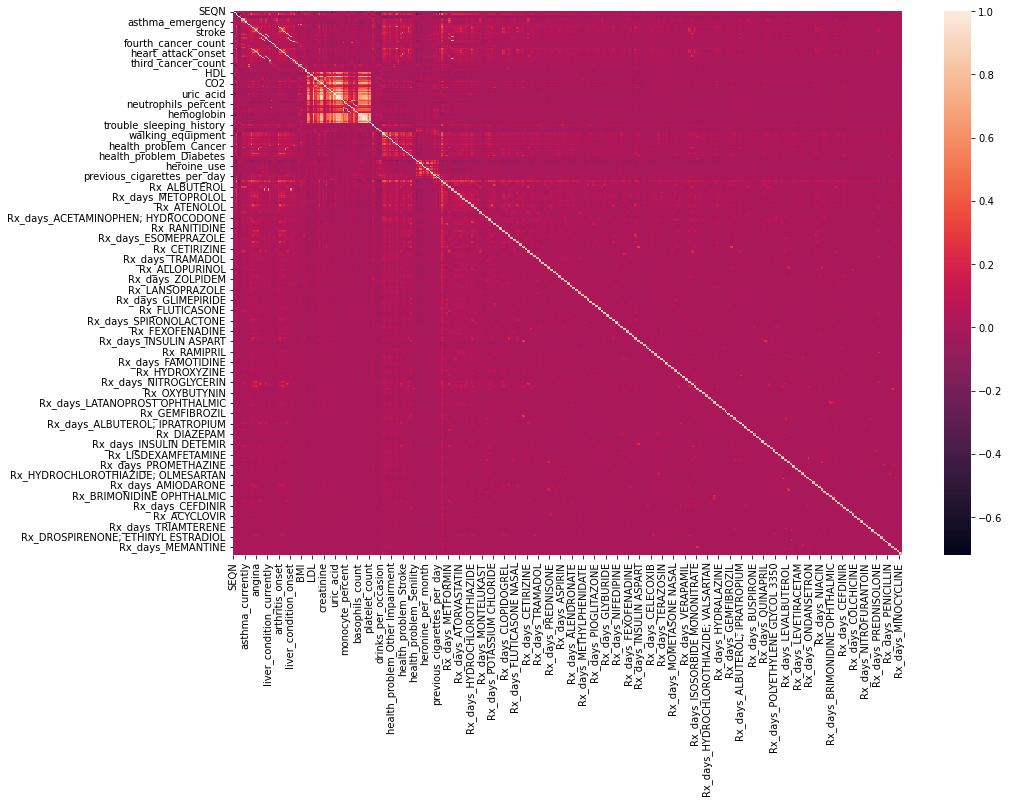

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df_data_1.corr())
plt.show()

## Plotting Bargraph and Boxen plot

In [13]:
#condition for bargraph
def plotting_counts(df, col, target='depression'):
    

    # Sort the column values for plotting
    order_list = list(df[col].unique())
    order_list.sort()

    # Plot the figure
    fig, ax = plt.subplots(figsize=(16,8))
    x, y = col, target
    ax = sns.countplot(x=x, hue=y, data=df, order=order_list)

    # Set labels and title
    plt.title(f'{col.title()} By Count {target.title()}', 
              fontdict={'fontsize': 30})
    plt.xlabel(f'{col.title()}', fontdict={'fontsize': 20})
    plt.ylabel(f'{target.title()} Count', fontdict={'fontsize': 20})
    plt.xticks(rotation=75)
    return fig, ax

In [14]:
def plot_num_cols(df, col, target='depression'):

    # Generating the figure
    g = sns.catplot(x=target, y=col, data=df, kind='boxen', 
                    height=7, aspect=2)

    # Setting the title
    plt.suptitle(f'{col.title()} and {target.title()}', fontsize=30, y=1.05)

## Demographics

In [15]:
# Creating separate lists for the category and number columns
demographic_cat_cols = ['gender','race','citizenship', 'education_level', 
                 'marital_status', 'pregnant', 'birth_place', 'veteran', 
                 'household_size', 'household_income']
demographic_num_cols = ['age']

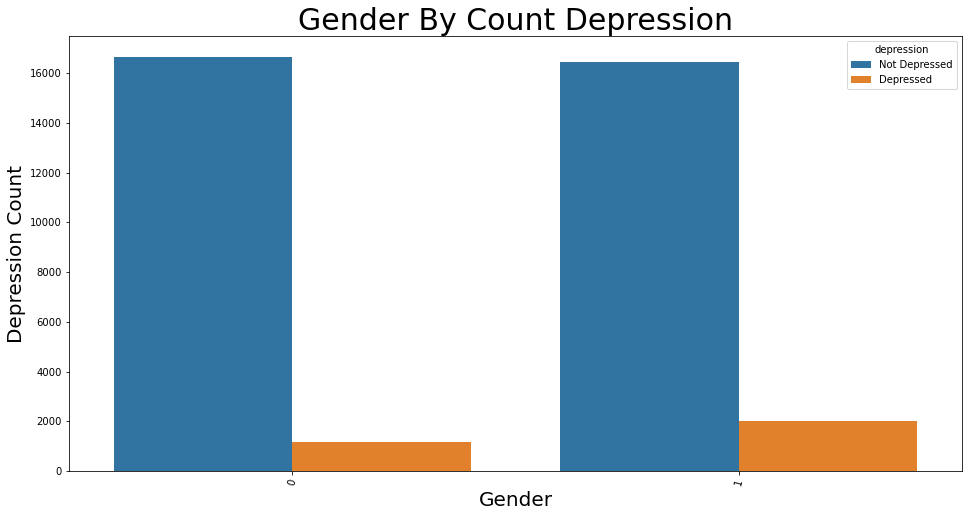

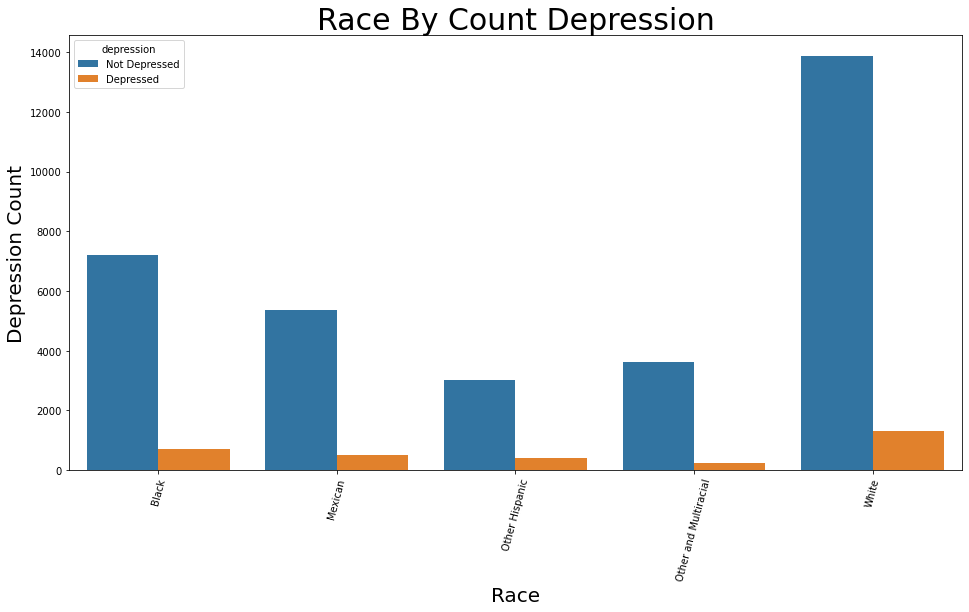

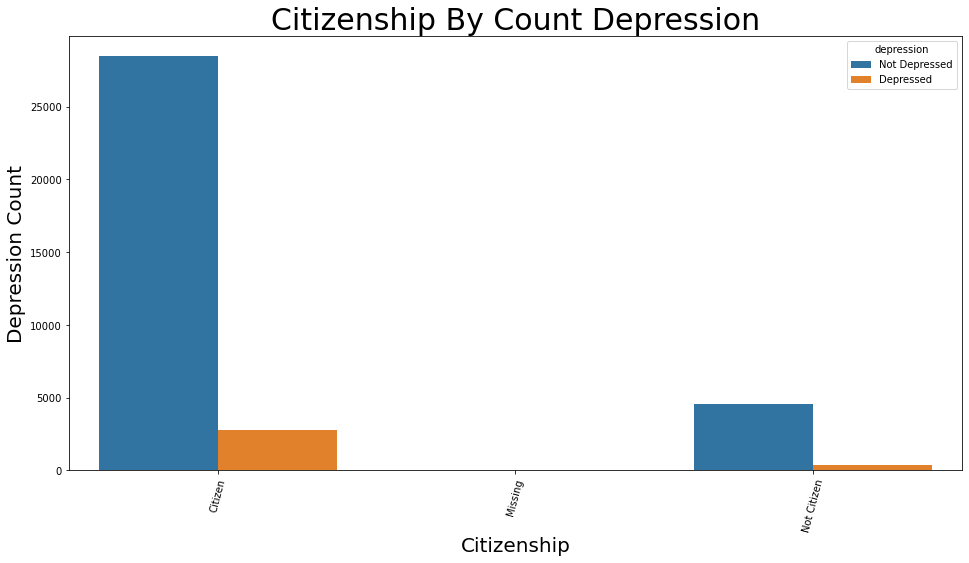

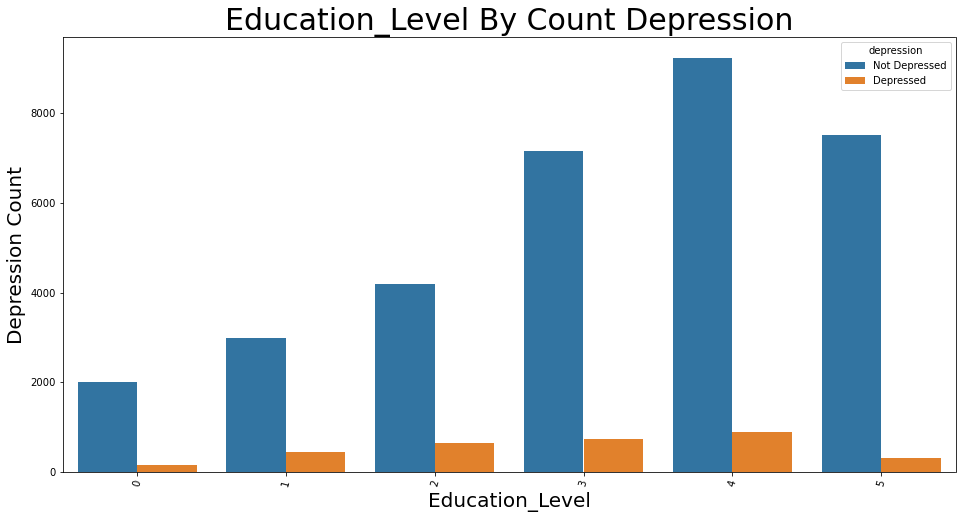

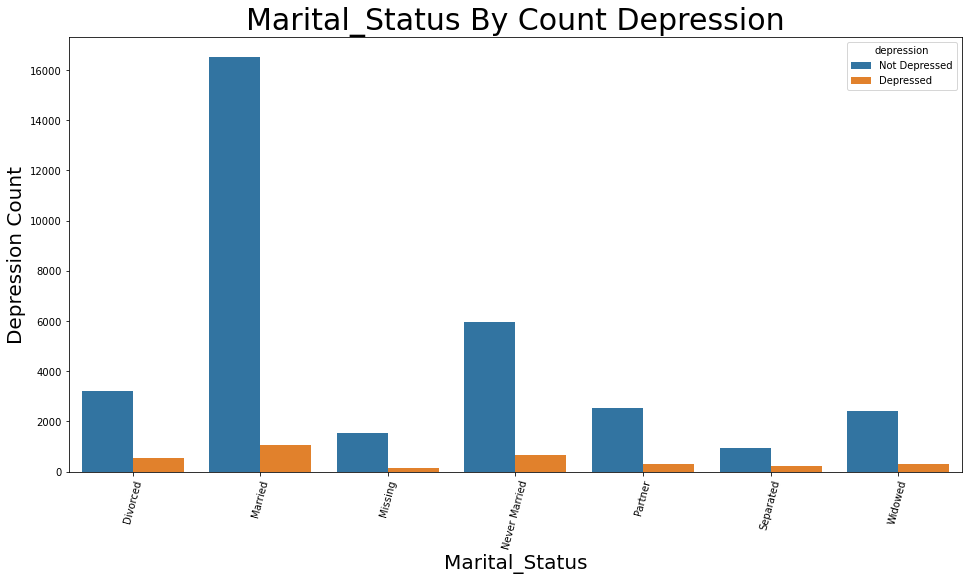

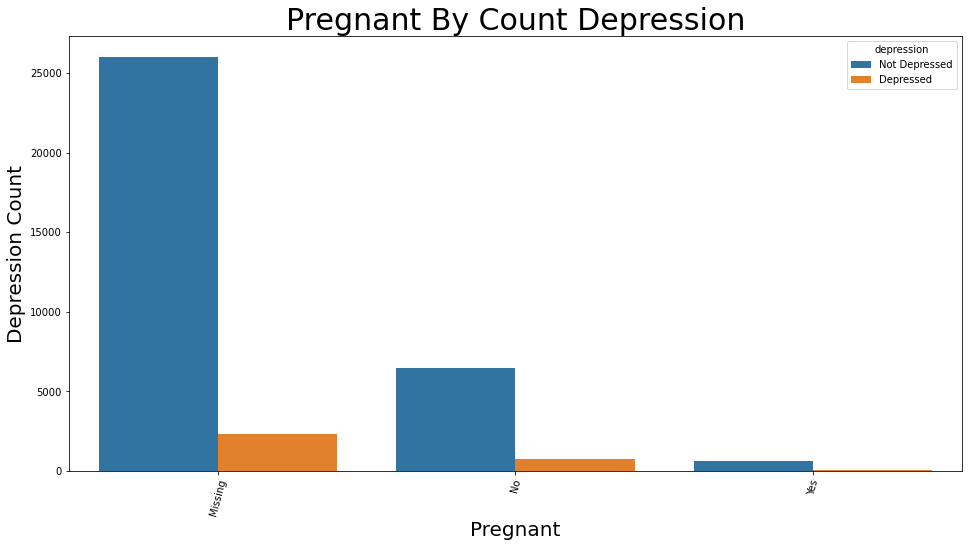

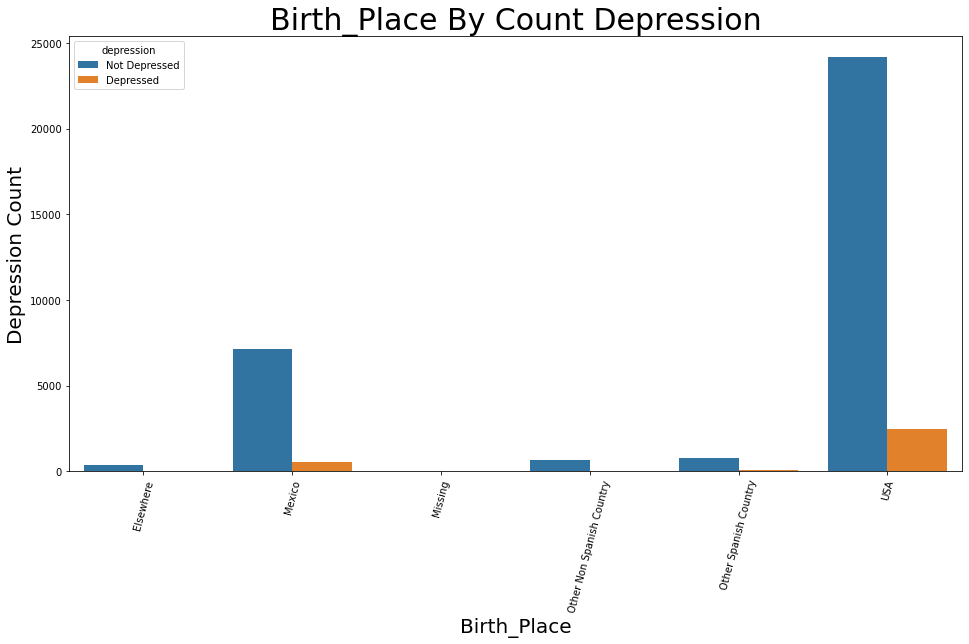

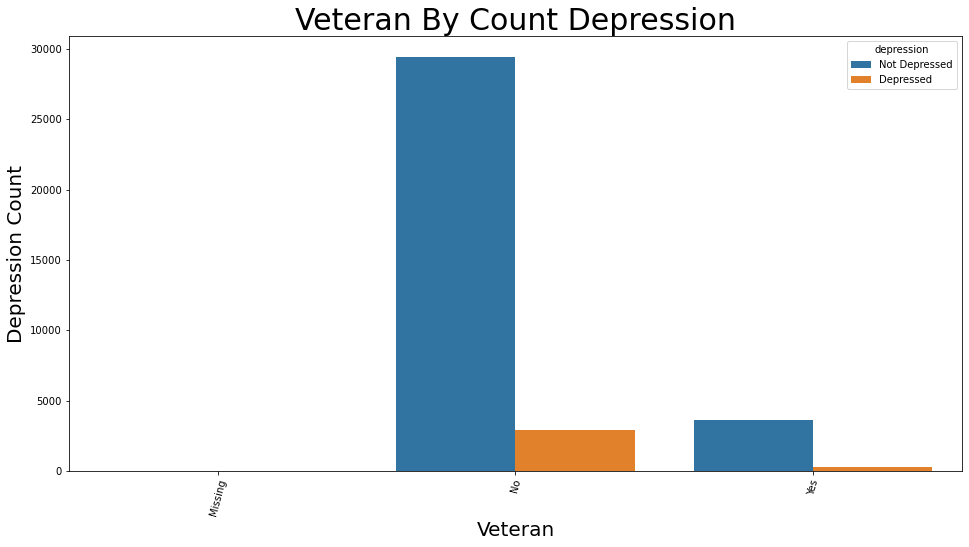

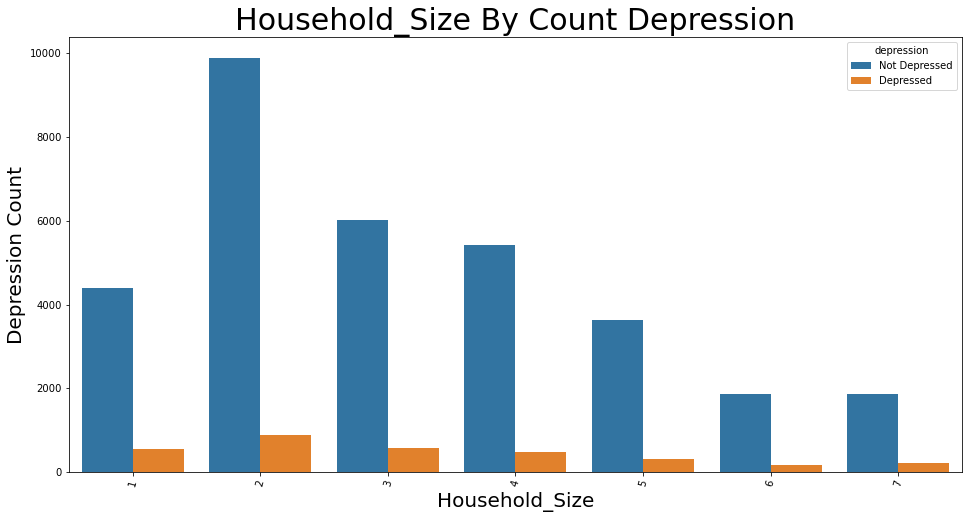

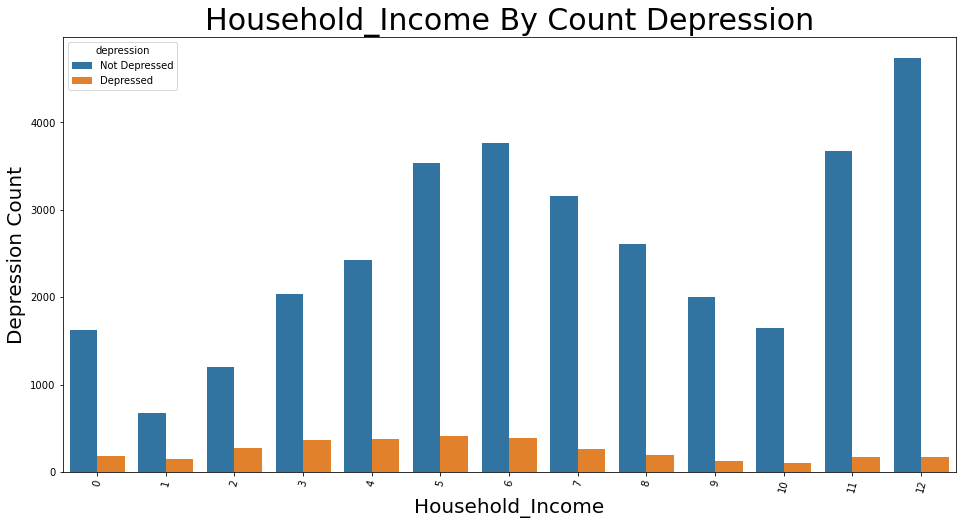

In [16]:
# Plotting the columns
for col in demographic_cat_cols:
    plotting_counts(df_data_1, col)

## Occupation

In [17]:
# Listing the columns #'full_time_work', 'out_of_work'
occupation_cat_cols = ['full_time_work', 'work_type', 'out_of_work']

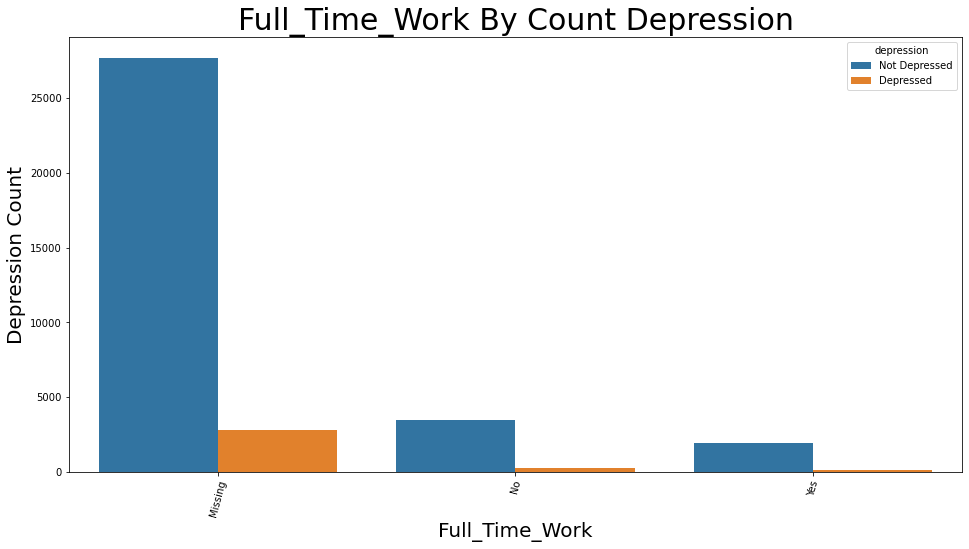

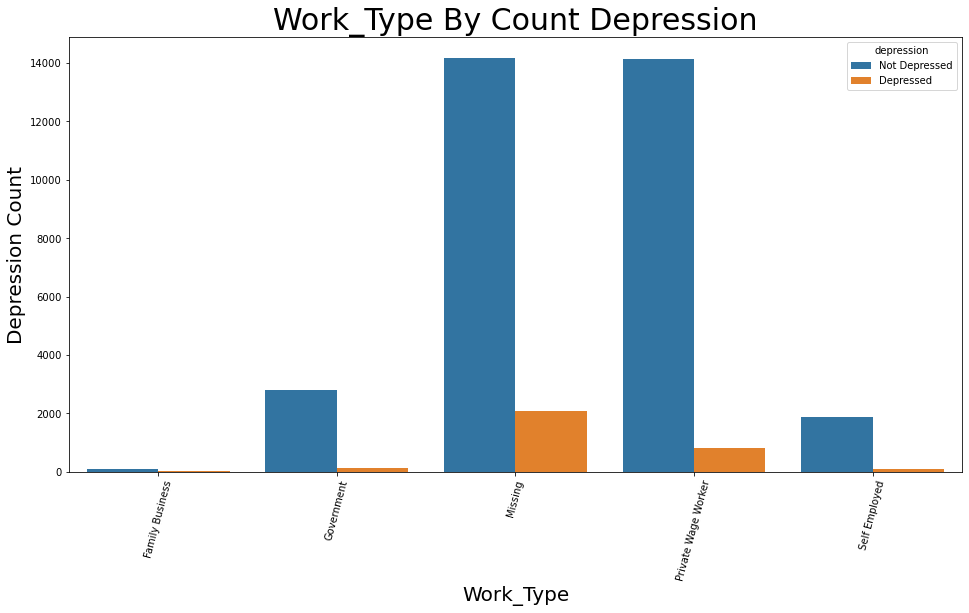

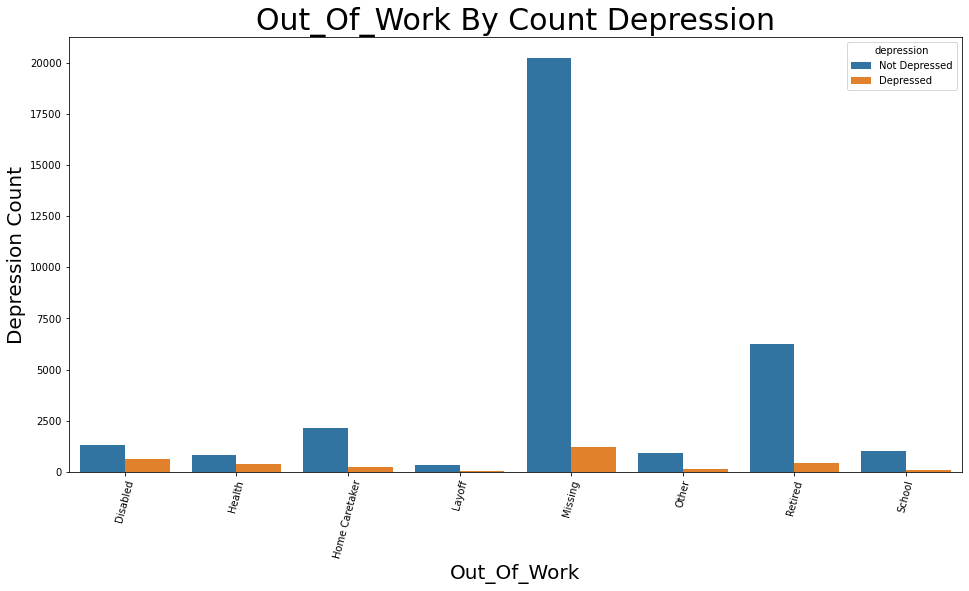

In [18]:
# Plotting the categorical columns
for col in occupation_cat_cols:
    plotting_counts(df_data_1, col)

## Body measures

In [21]:
# Listing the columns
body_num_cols = ['weight', 'height', 'BMI']

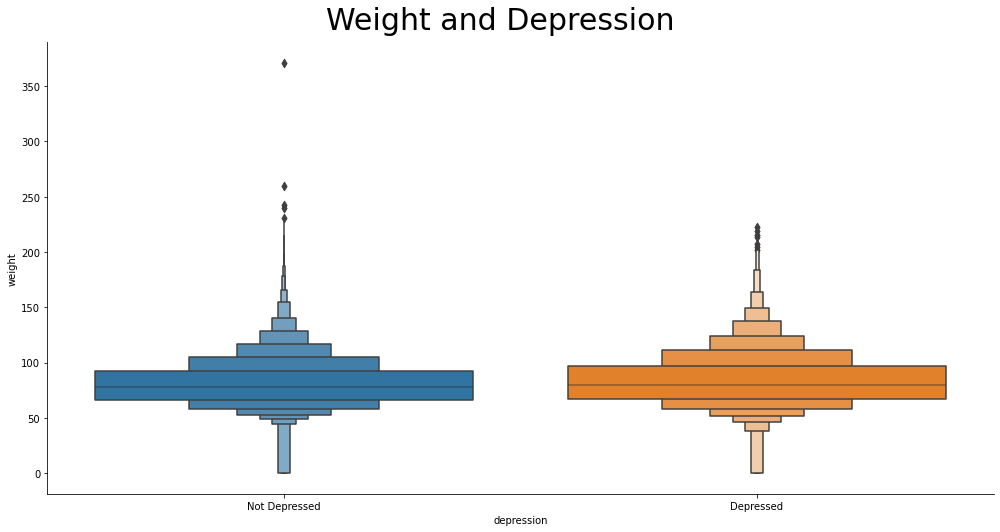

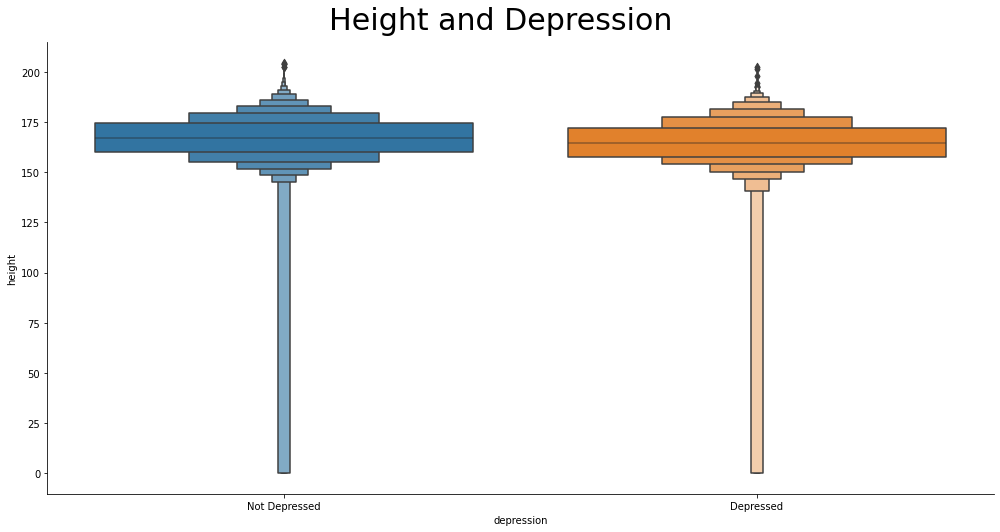

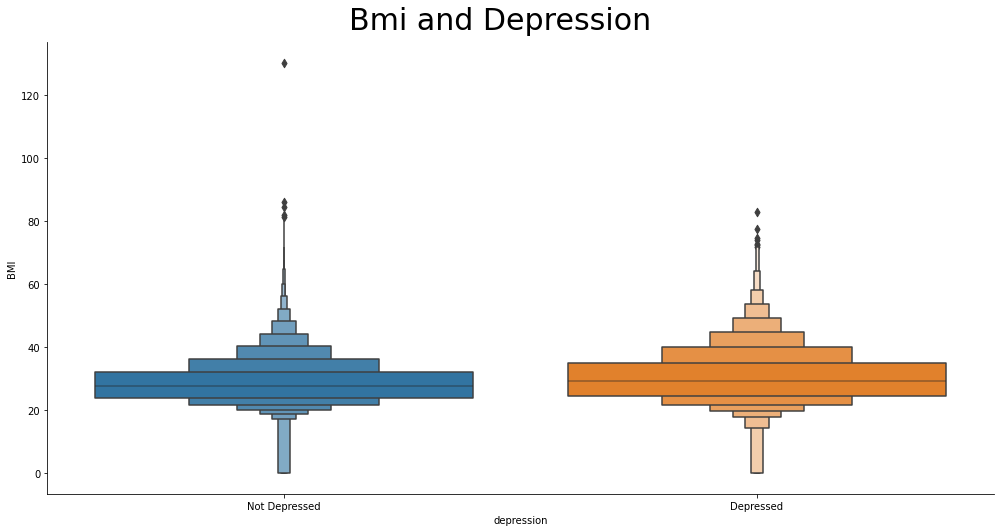

In [22]:
# Plotting the columns
for col in body_num_cols:
    plot_num_cols(df_data_1, col)

## Sleeping Disorder

(<Figure size 1152x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Trouble_Sleeping_History By Count Depression'}, xlabel='Trouble_Sleeping_History', ylabel='Depression Count'>)

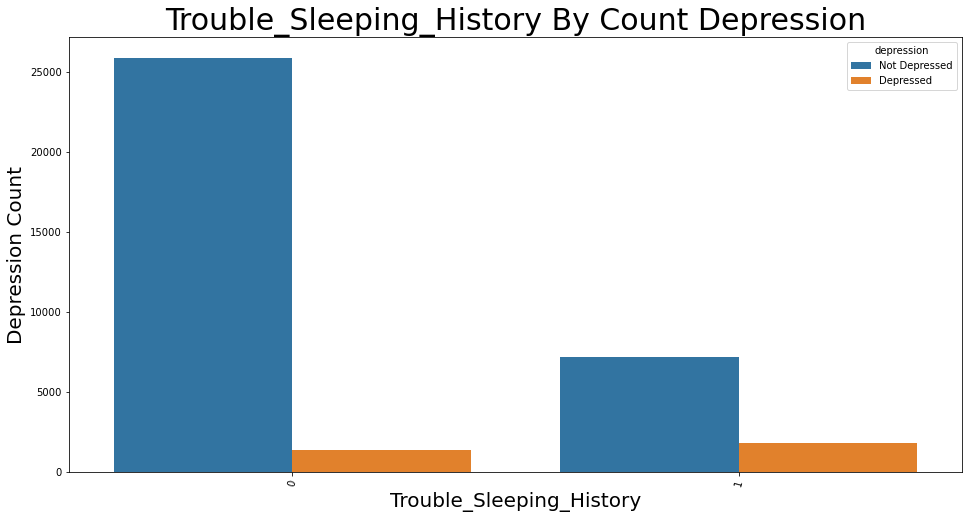

In [23]:
# Plotting the column
plotting_counts(df_data_1, 'trouble_sleeping_history')

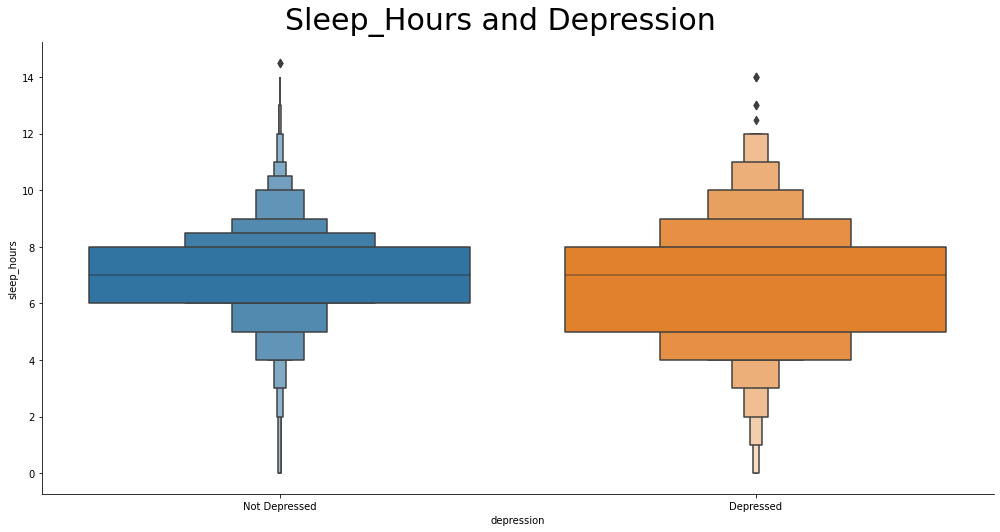

In [24]:
# Plotting the column
plot_num_cols(df_data_1, 'sleep_hours')

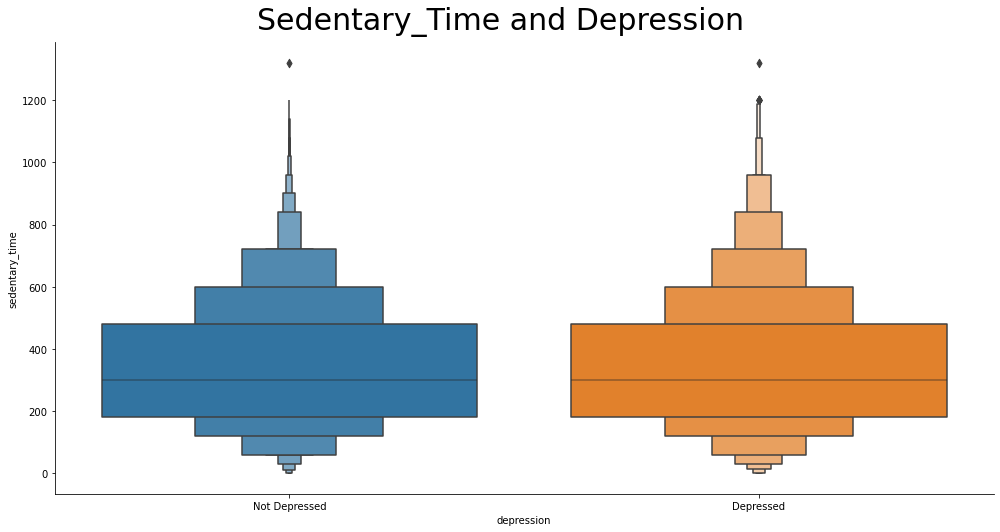

In [25]:
# Plotting the column
plot_num_cols(df_data_1, 'sedentary_time')

## Physical Activity

In [26]:
# Creating list for the category columns
activity_catcols = ['vigorous_recreation', 'moderate_recreation', 
                    'vigorous_work', 'moderate_work']

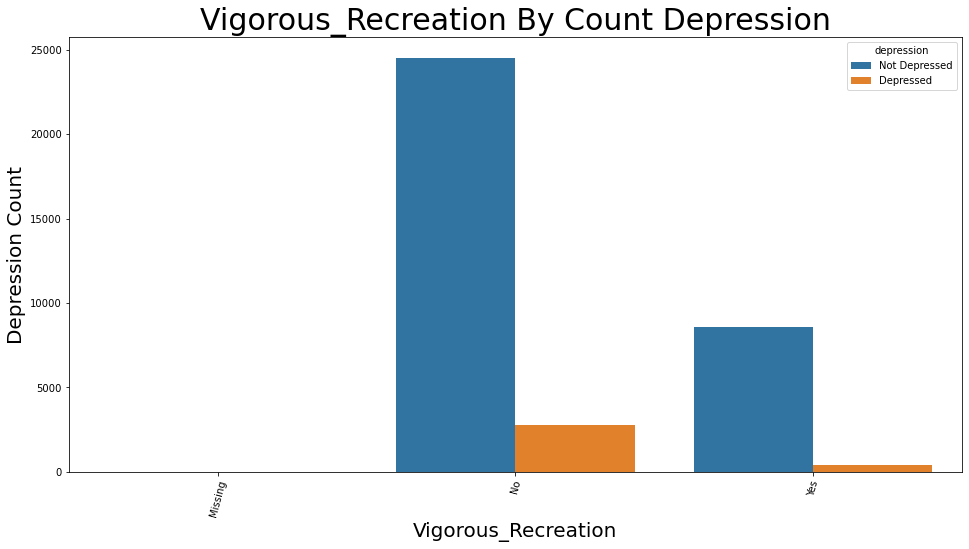

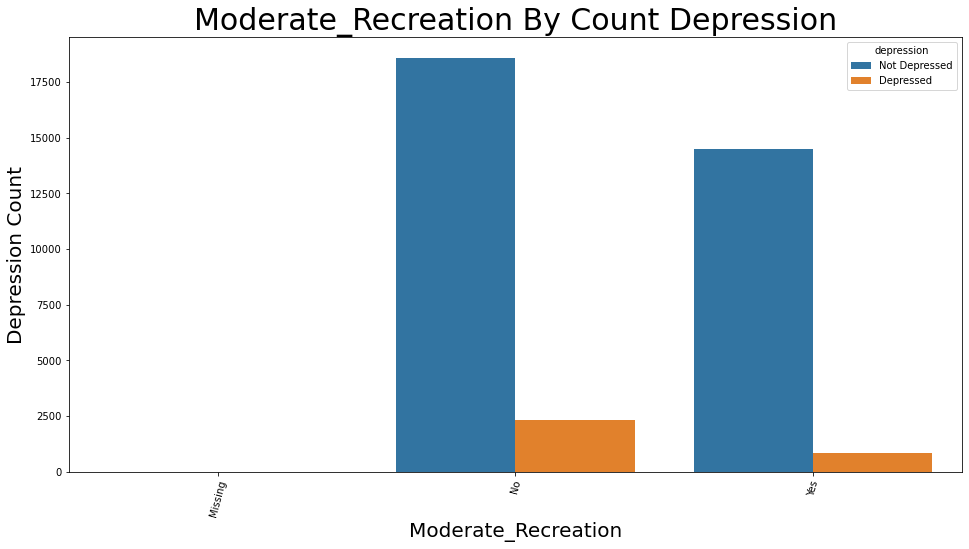

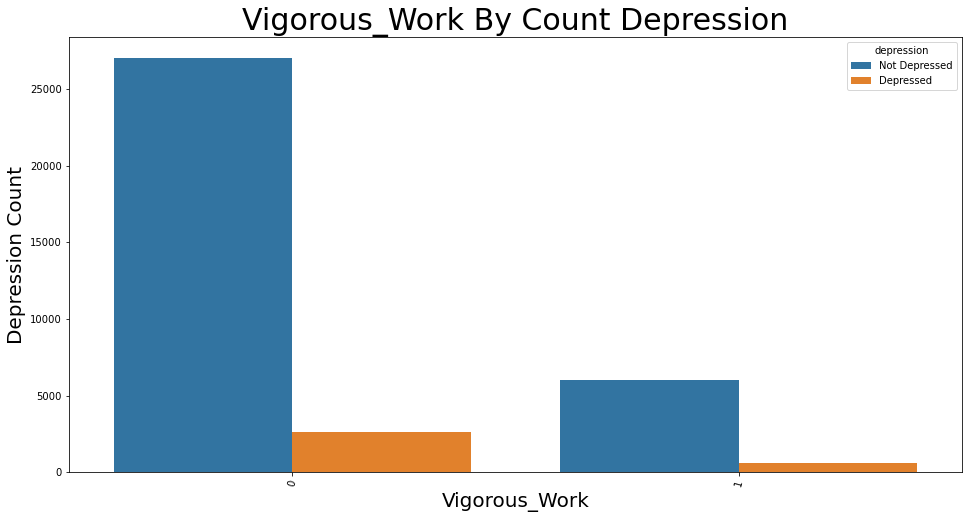

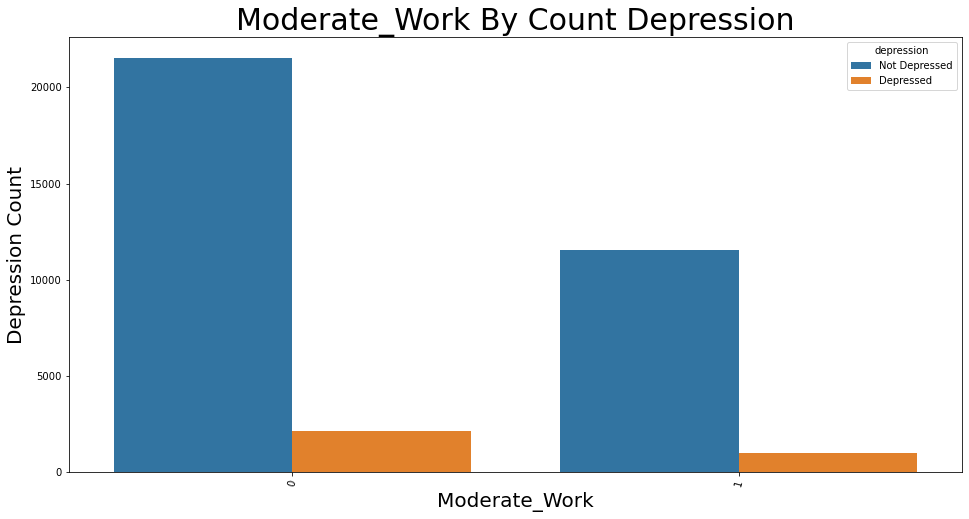

In [27]:
# Plotting the columns
for col in activity_catcols:
    plotting_counts(df_data_1, col)

## Blood Pressure

In [28]:
# Listing the columns
blood_num_cols = ['irregular_pulse', 'systolic', 'diastolic']

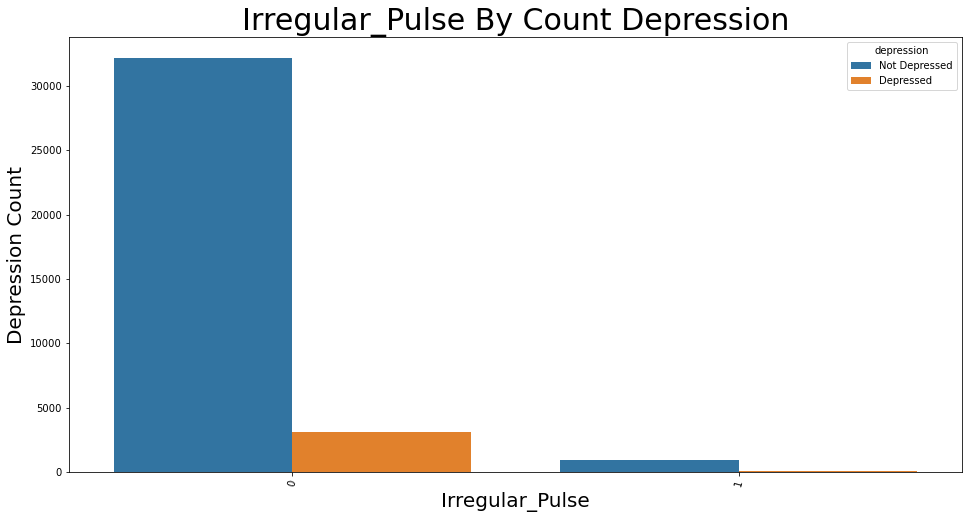

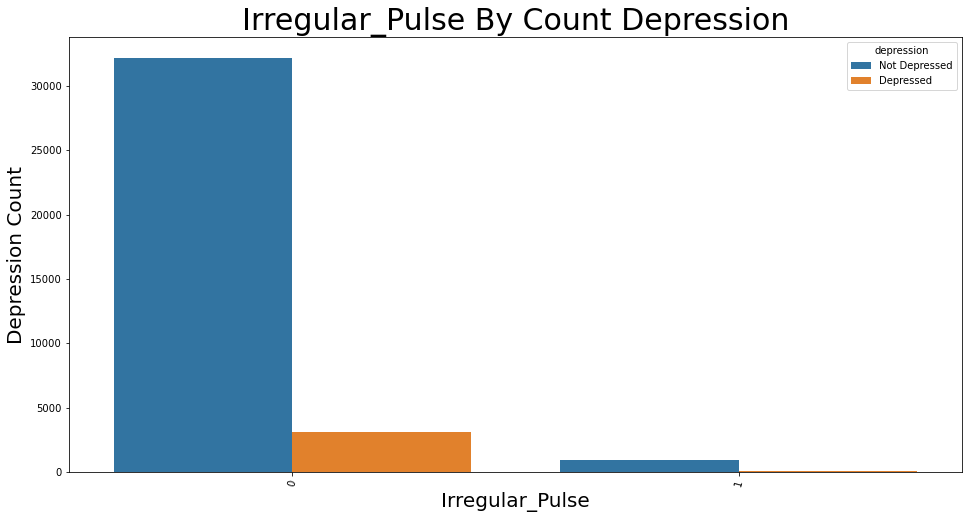

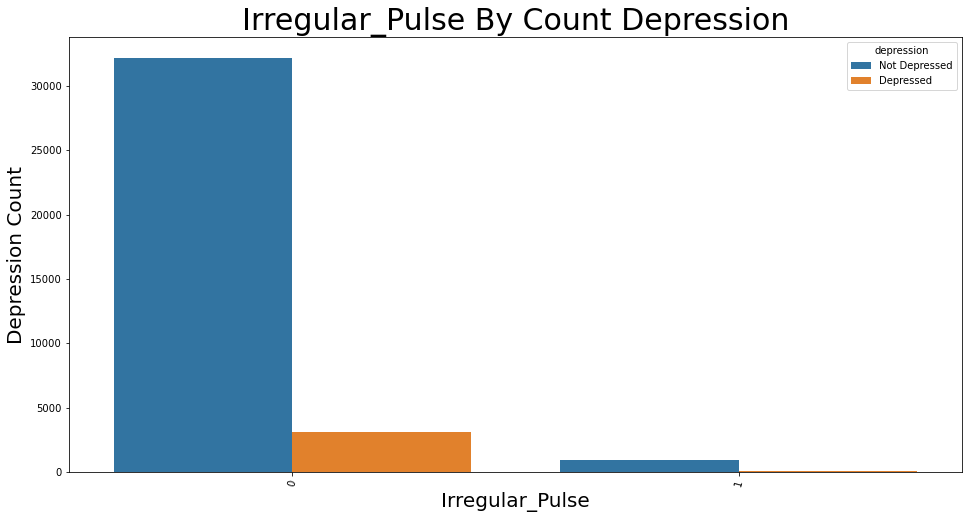

In [29]:
# Plotting the columns
for col in blood_num_cols:
    plotting_counts(df_data_1, 'irregular_pulse')

## Blood Count

In [32]:
# Listing the columns
count_num_cols = ['white_BCC', 'lymphocyte_percent', 'monocyte_percent',
       'neutrophils_percent', 'eosinophils_percent', 'basophils_percent',
       'lymphocyte_count', 'monocyte_count', 'neutrophils_count',
       'eosinophils_count', 'basophils_count', 'RBC_count', 'hemoglobin',
       'hematocrit', 'MCV', 'MCH', 'MCHC', 'RDW', 'platelet_count', 'MPV']

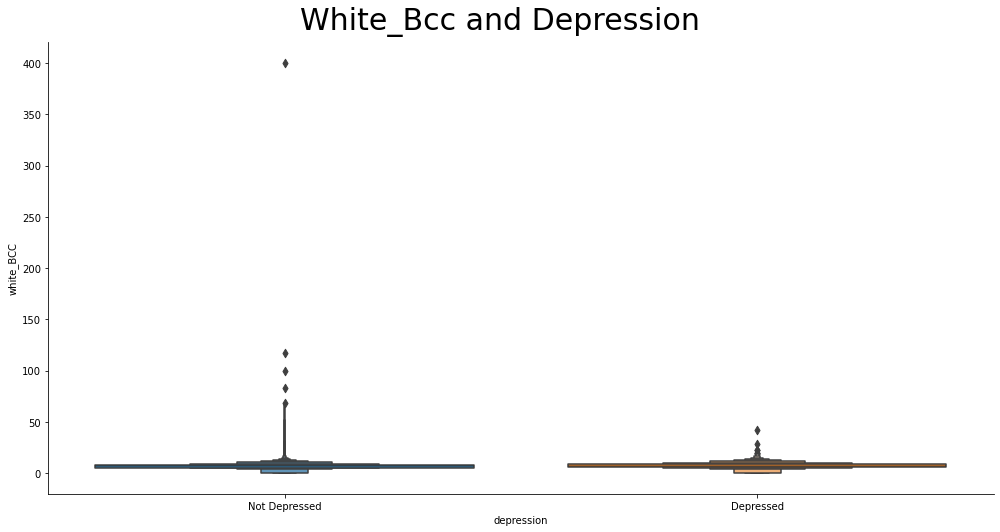

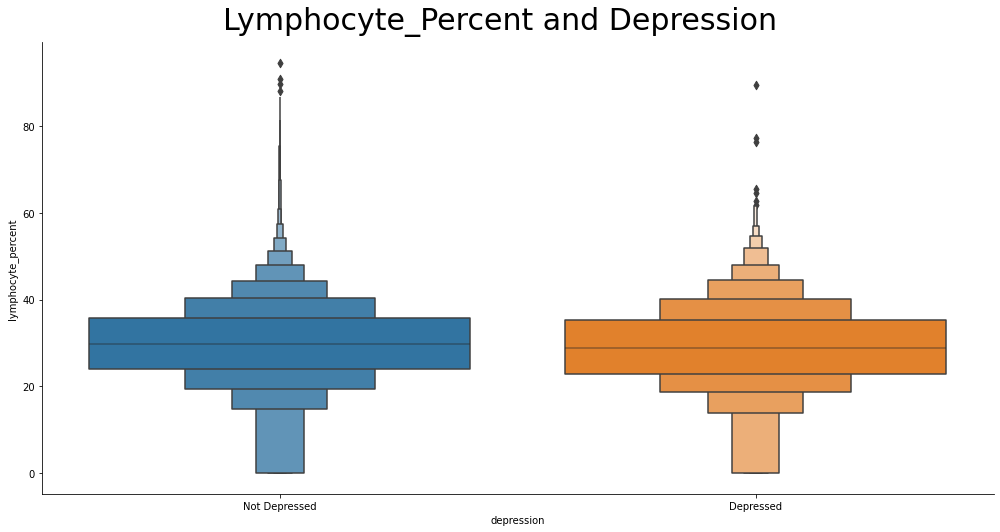

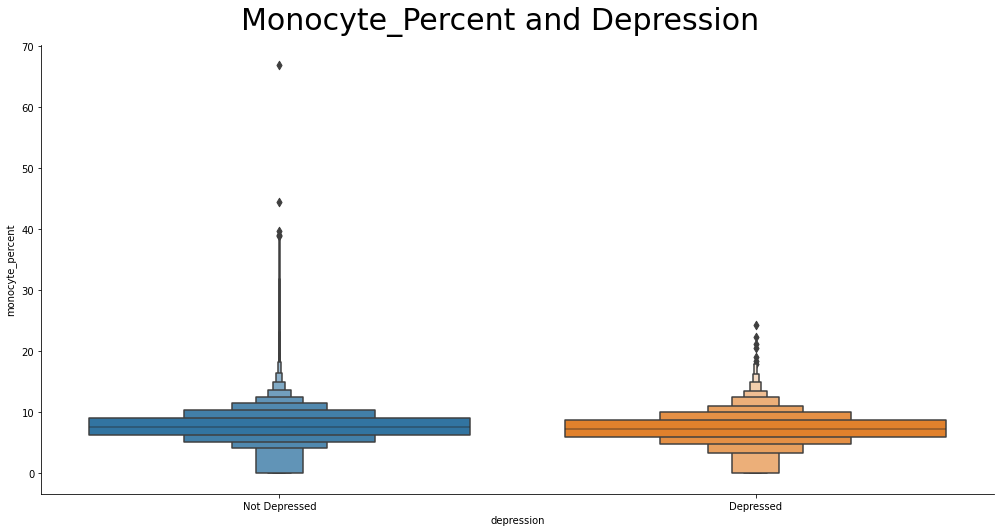

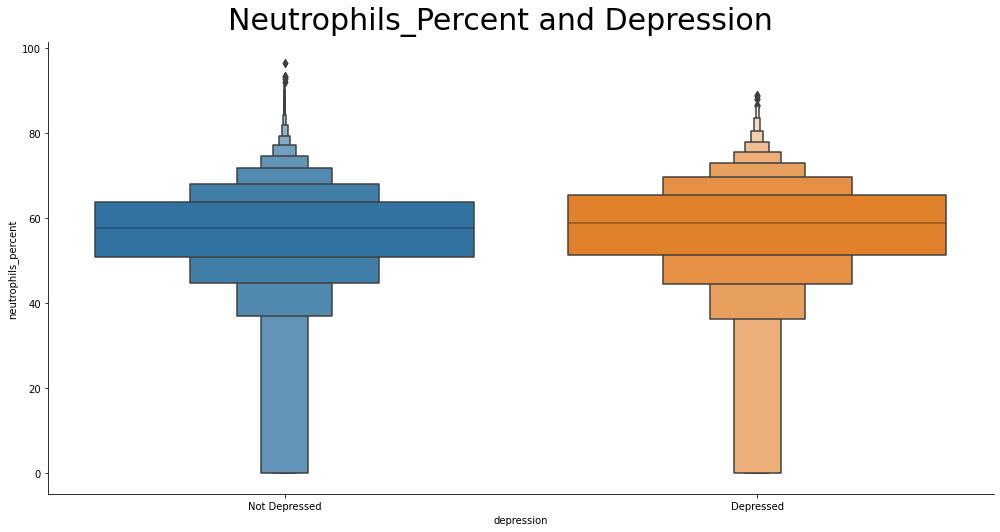

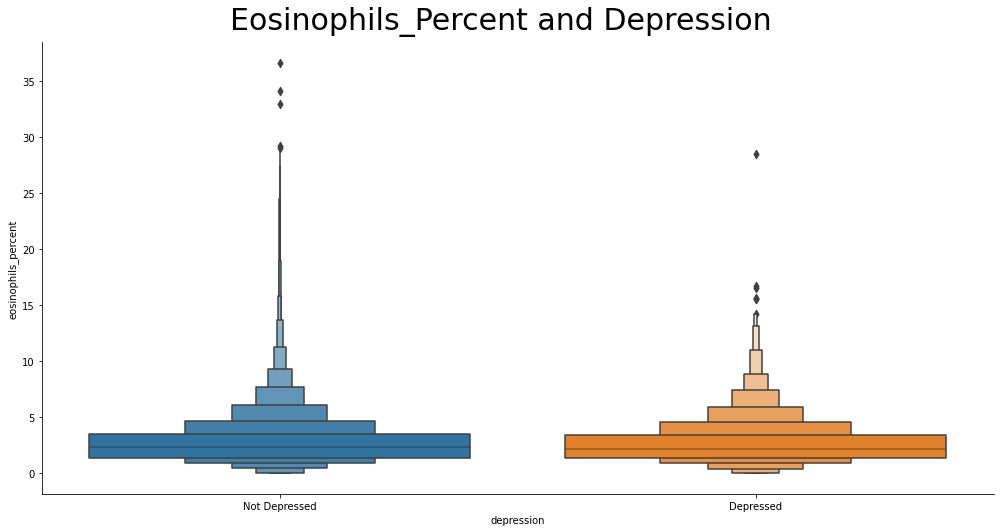

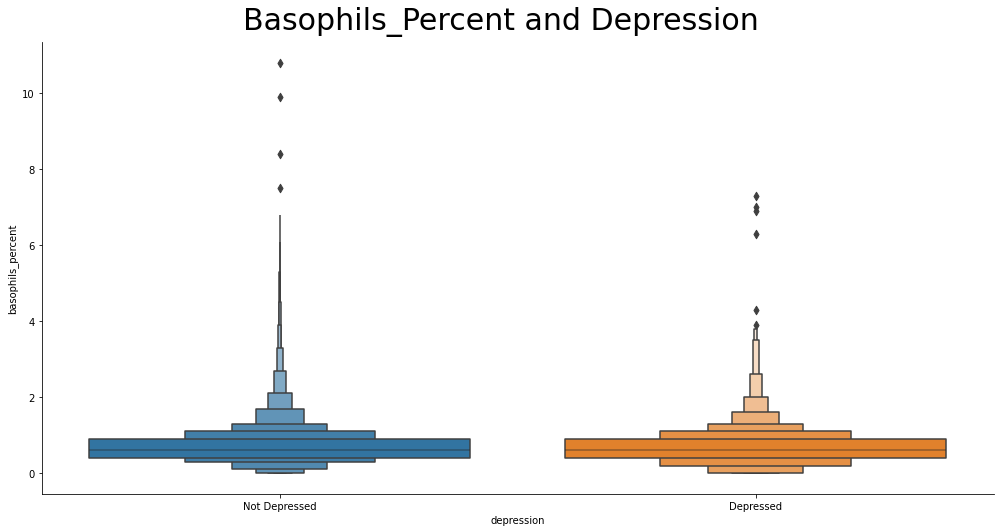

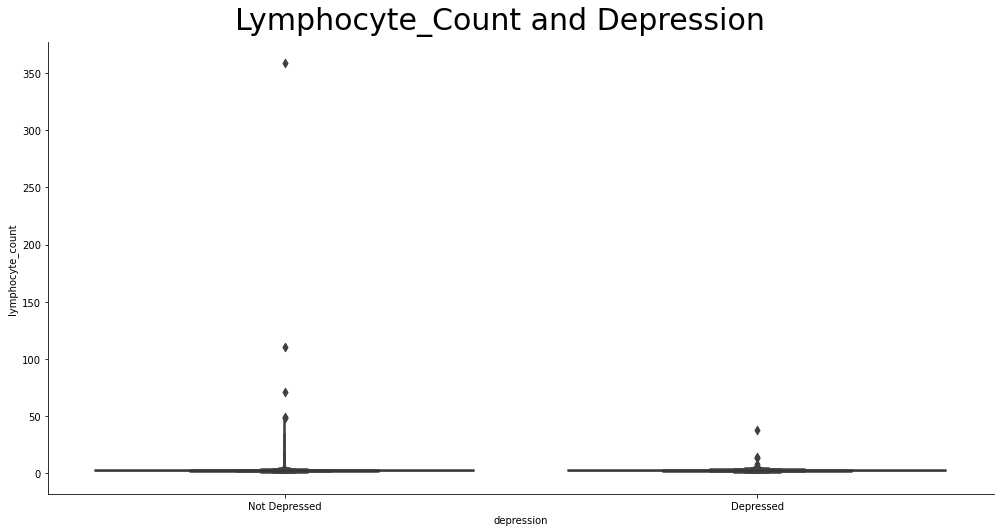

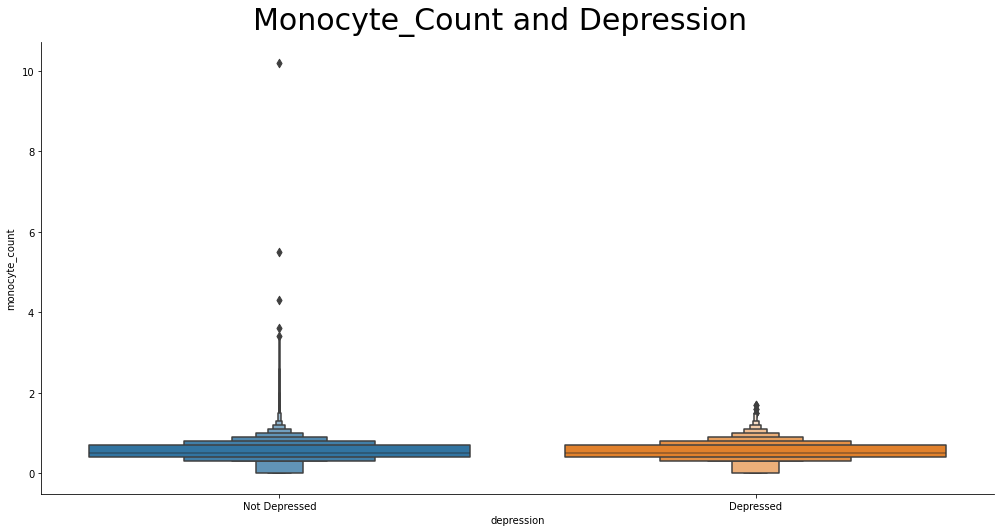

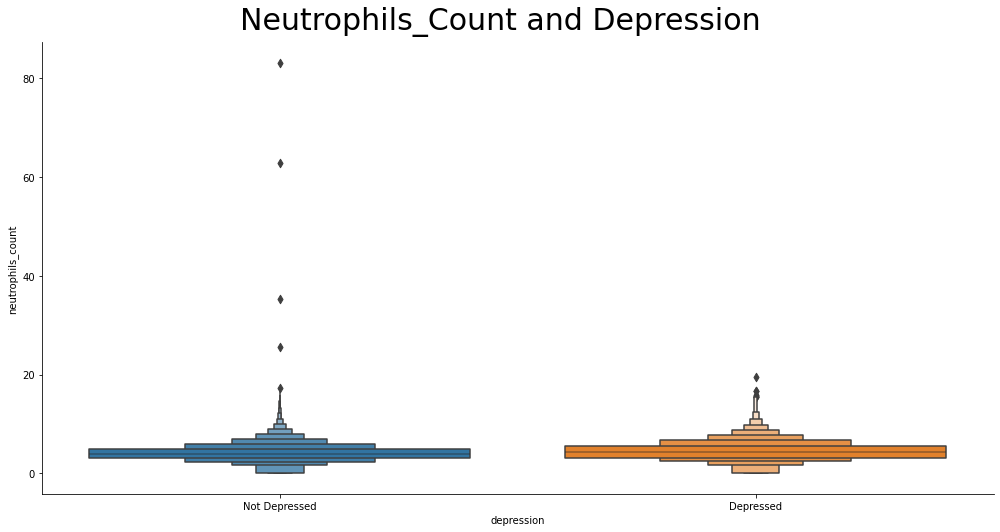

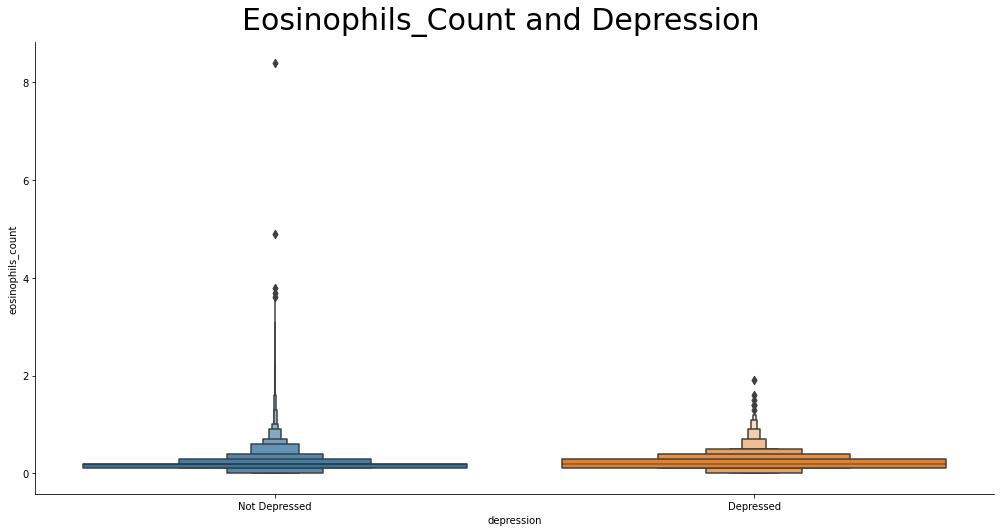

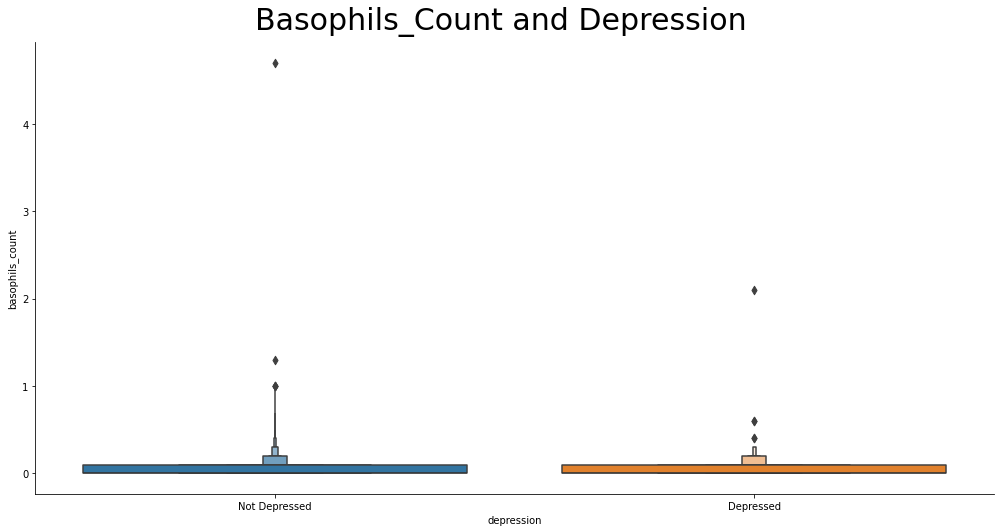

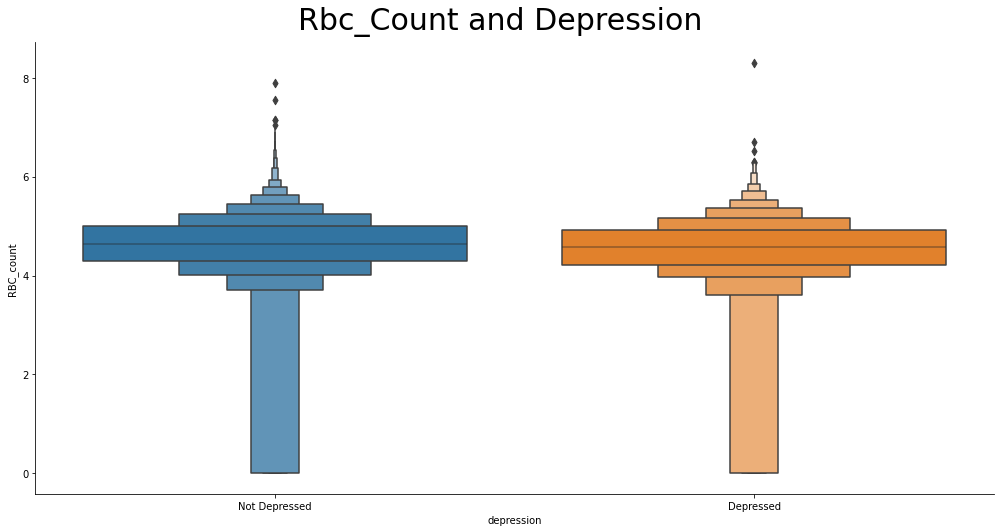

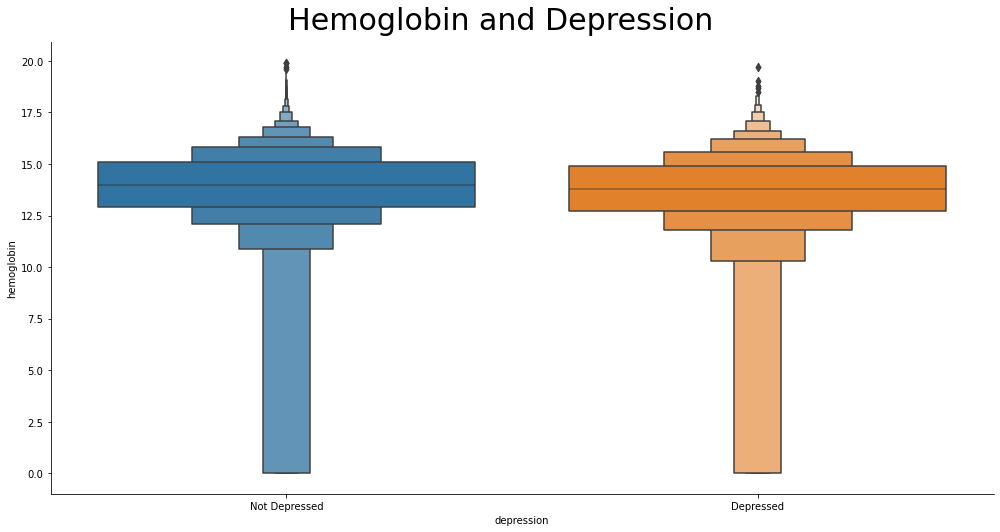

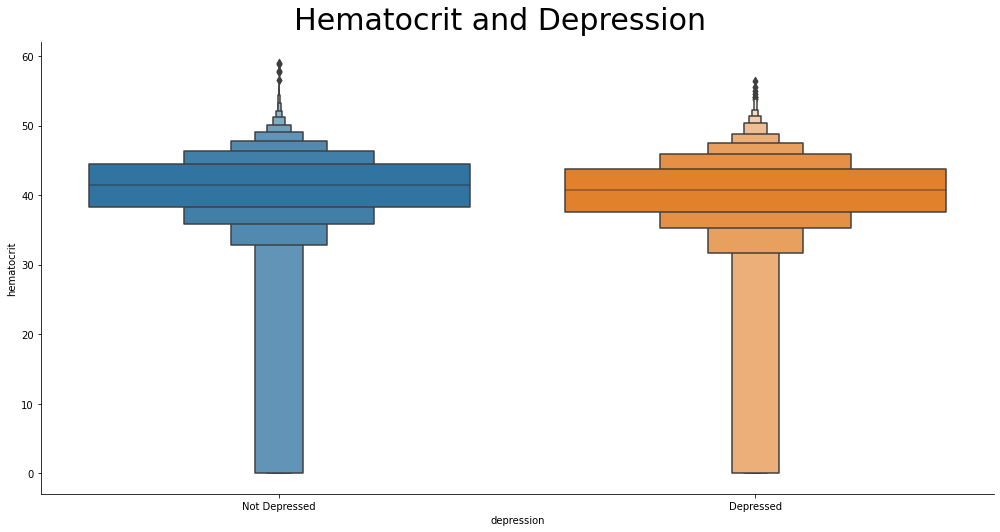

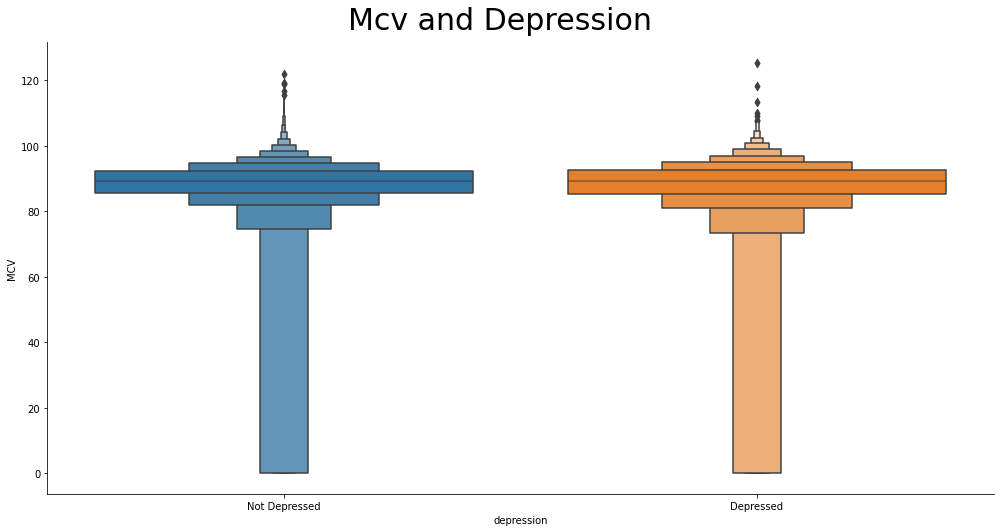

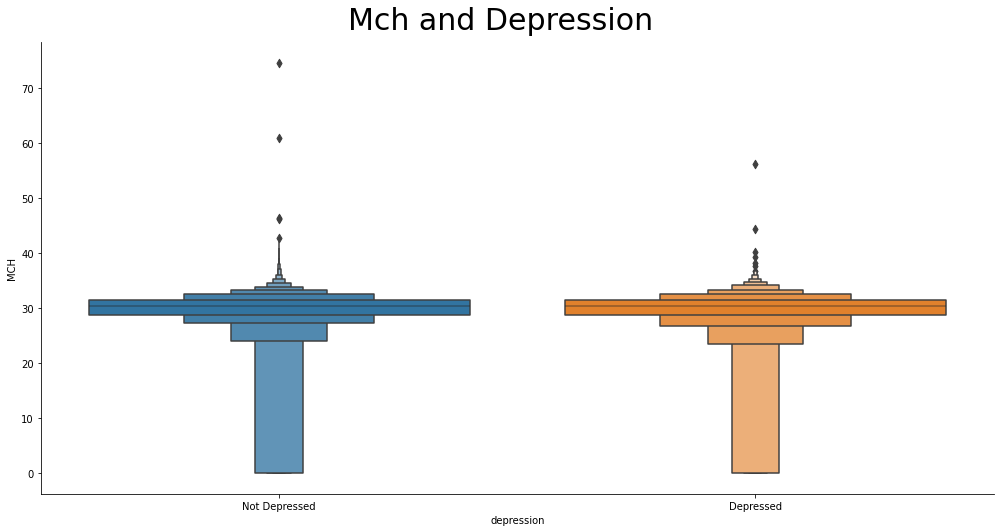

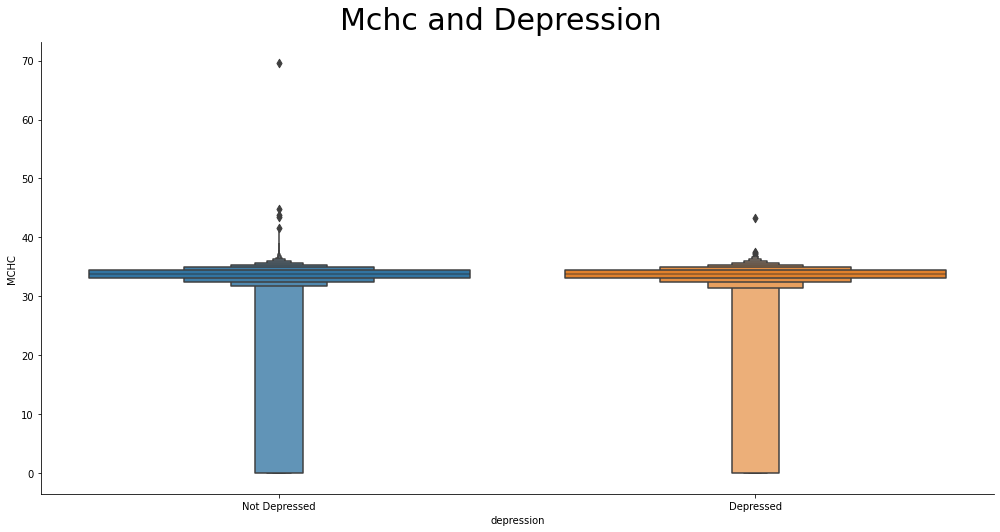

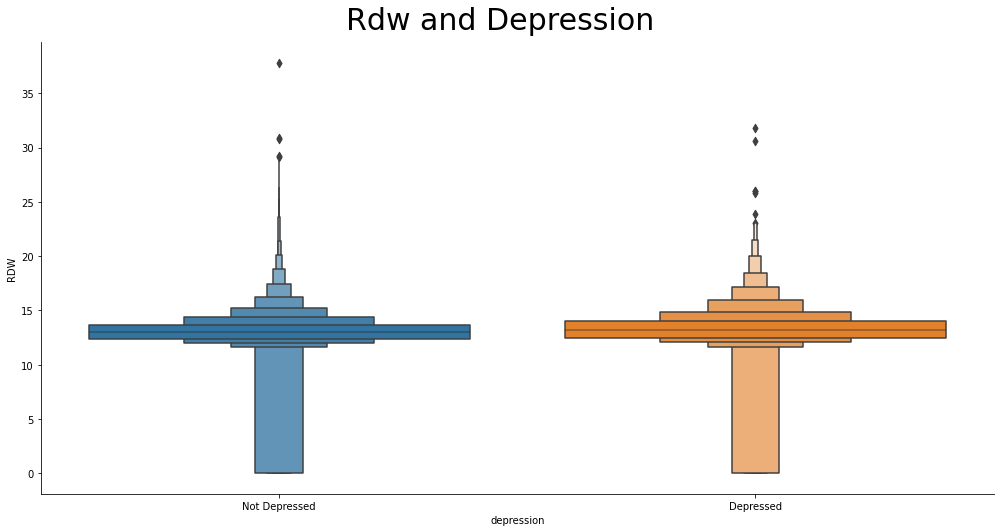

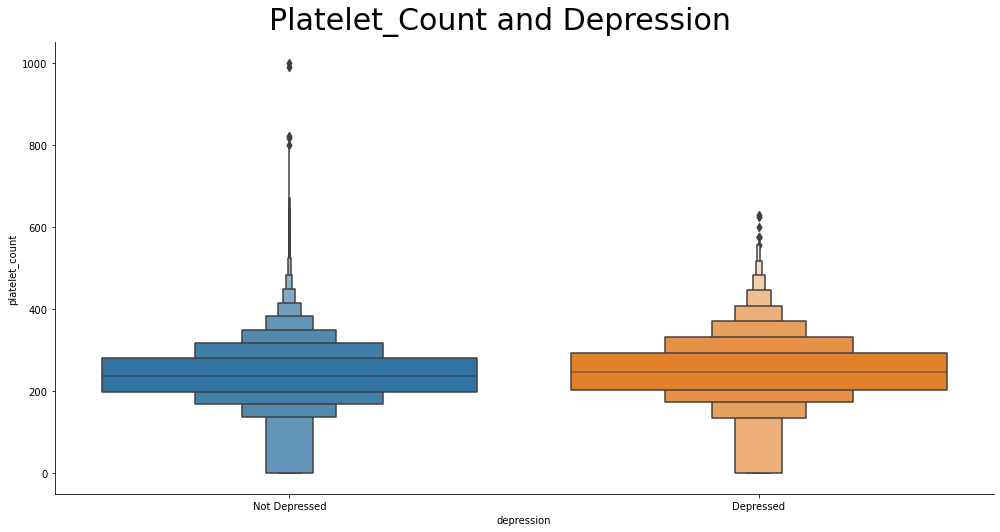

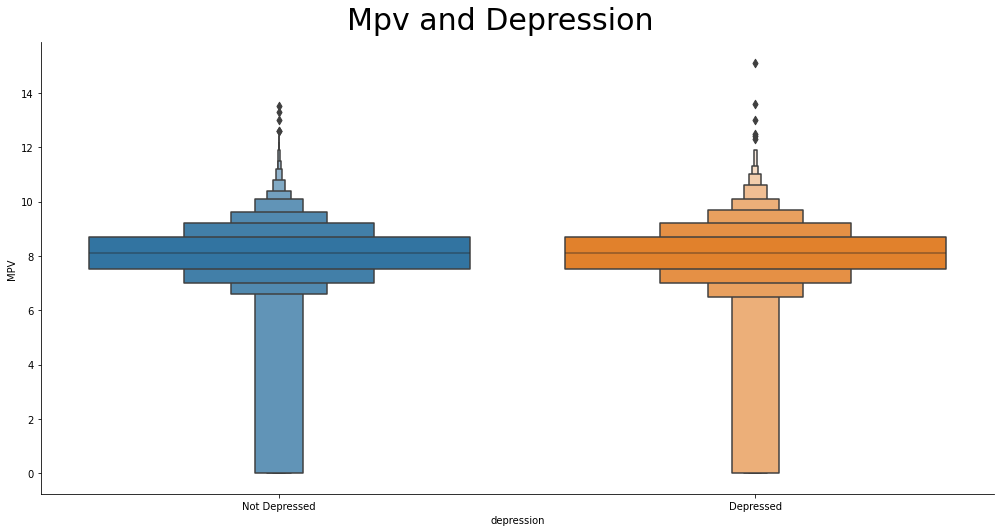

In [33]:
for col in count_num_cols:
    plot_num_cols(df_data_1, col)

## Biochemistry profiles

In [34]:
biochem_num_cols = ['albumin', 'ALT', 'AST', 'ALP', 'BUN', 'calcium', 'CO2', 
                    'creatinine', 'GGT', 'glucose', 'iron', 'LHD', 
                    'phosphorus', 'bilirubin', 'total_protein', 'uric_acid', 
                    'sodium', 'potassium', 'chloride', 'osmolality', 'globulin']

C:\Users\princ\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


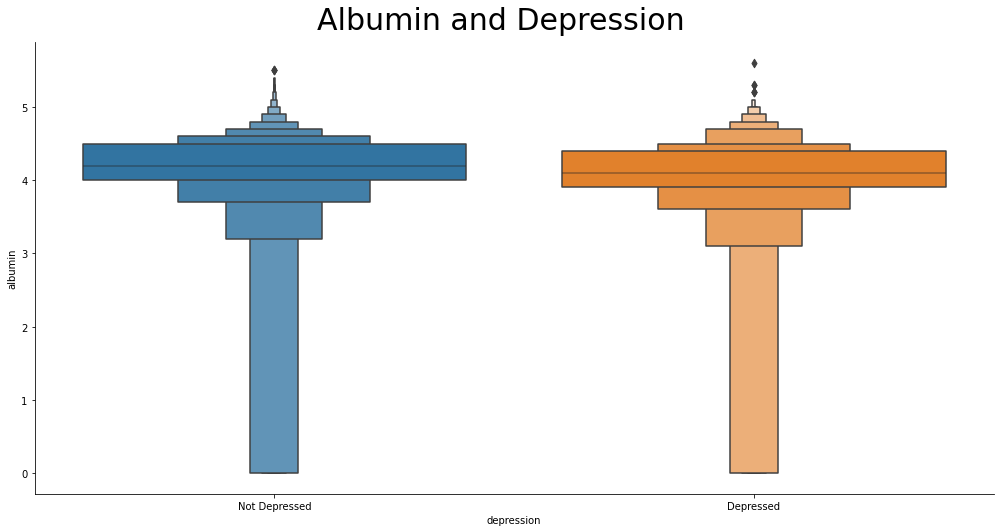

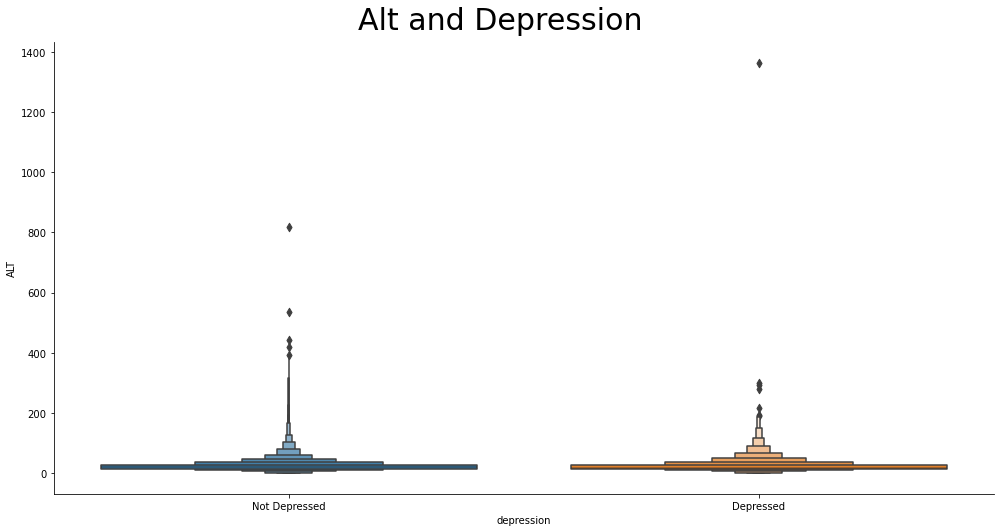

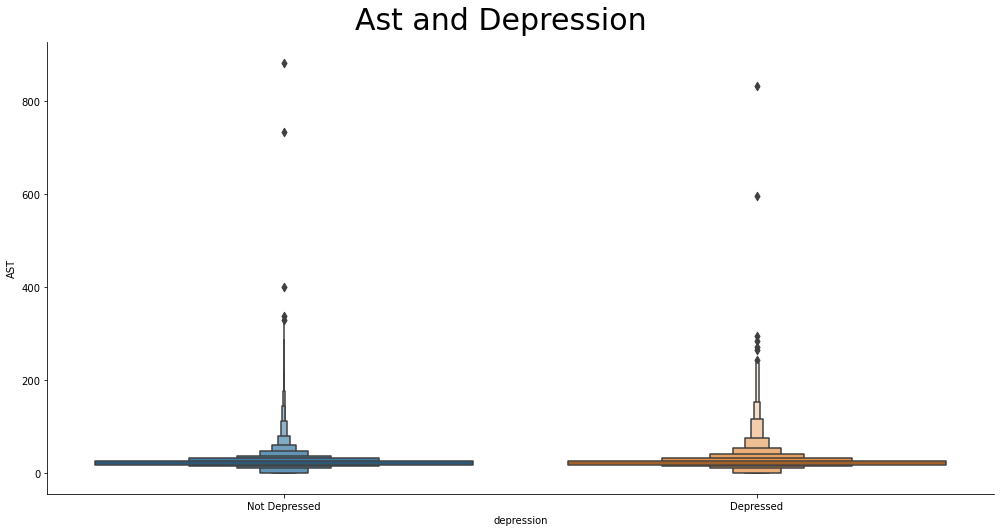

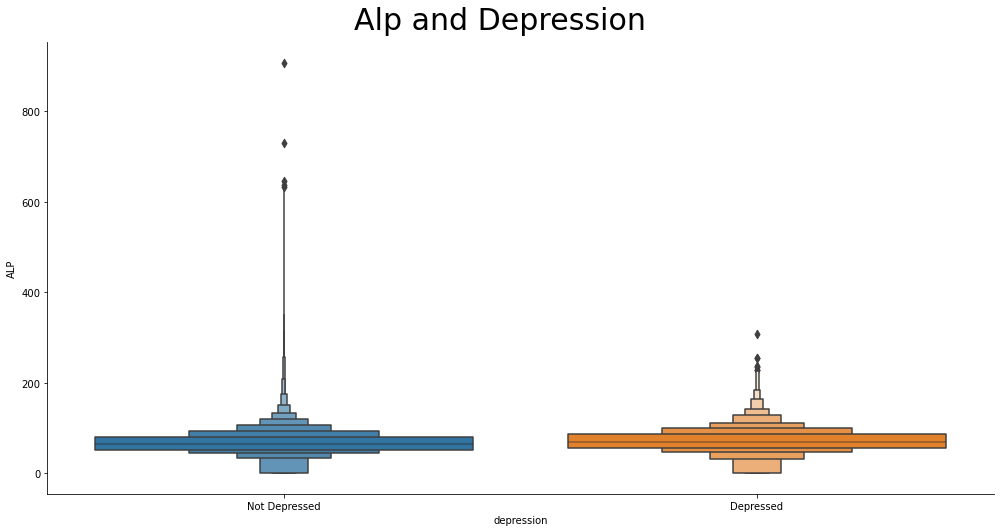

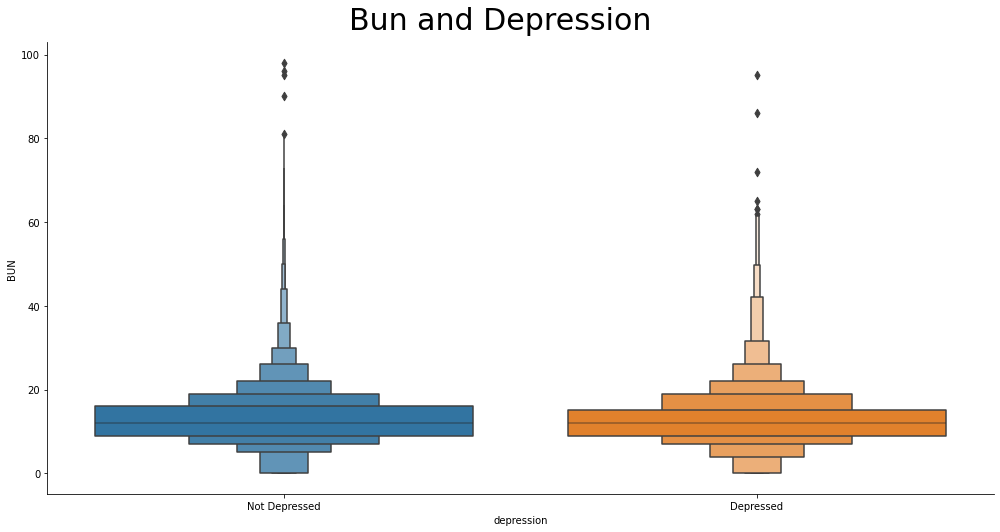

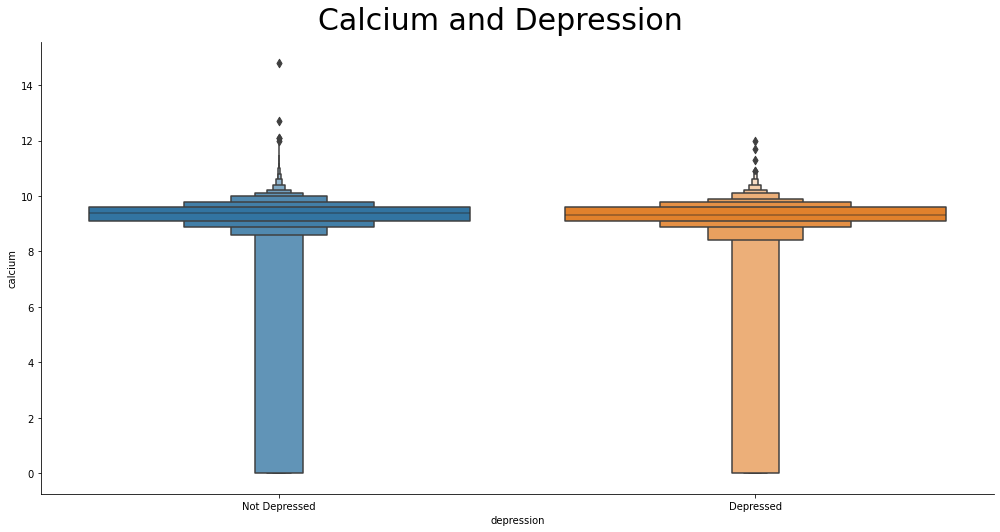

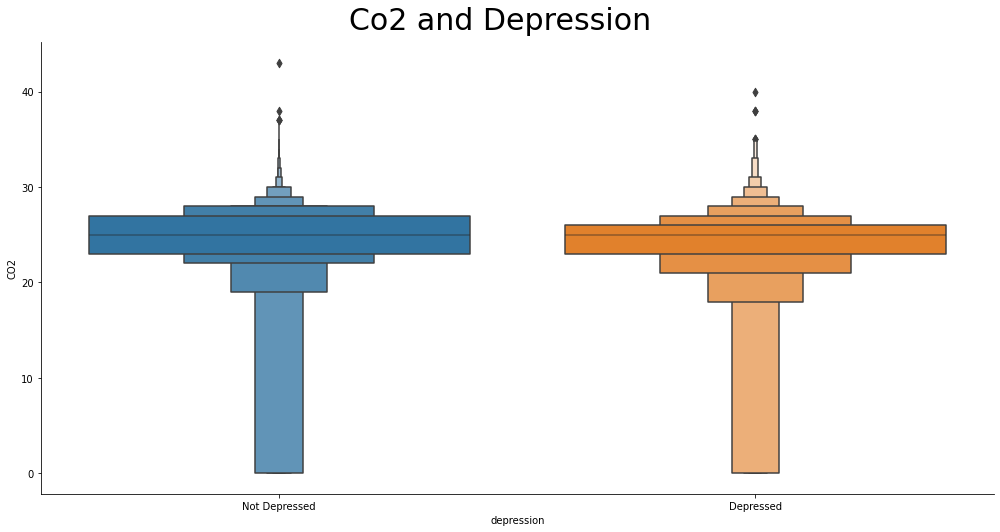

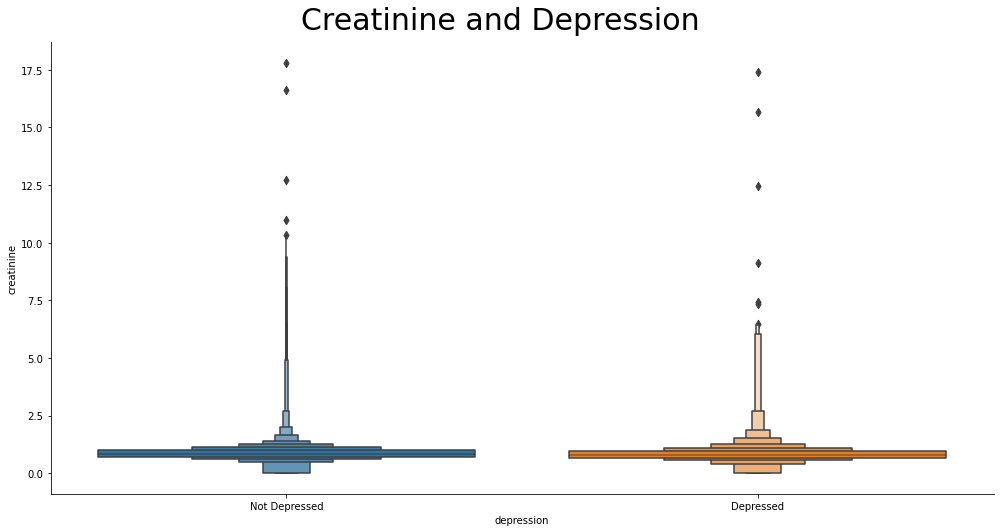

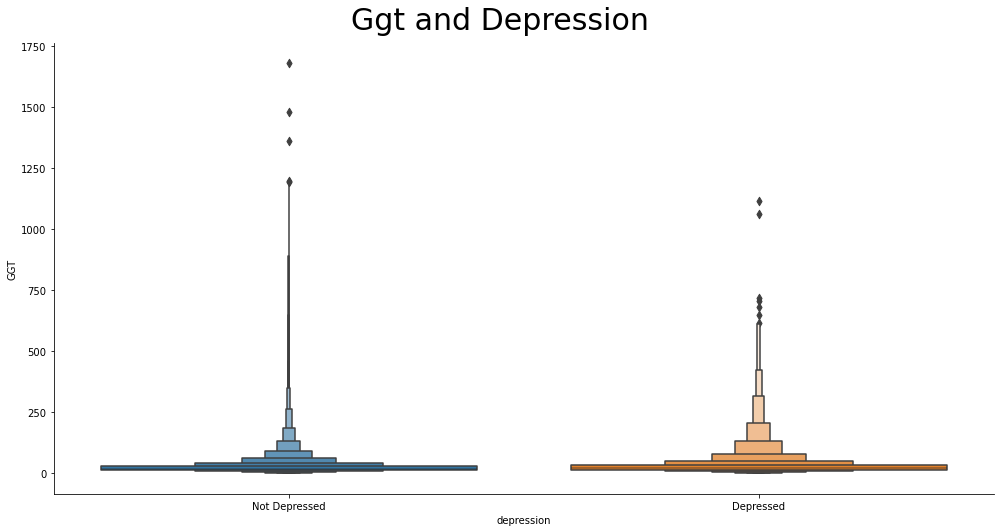

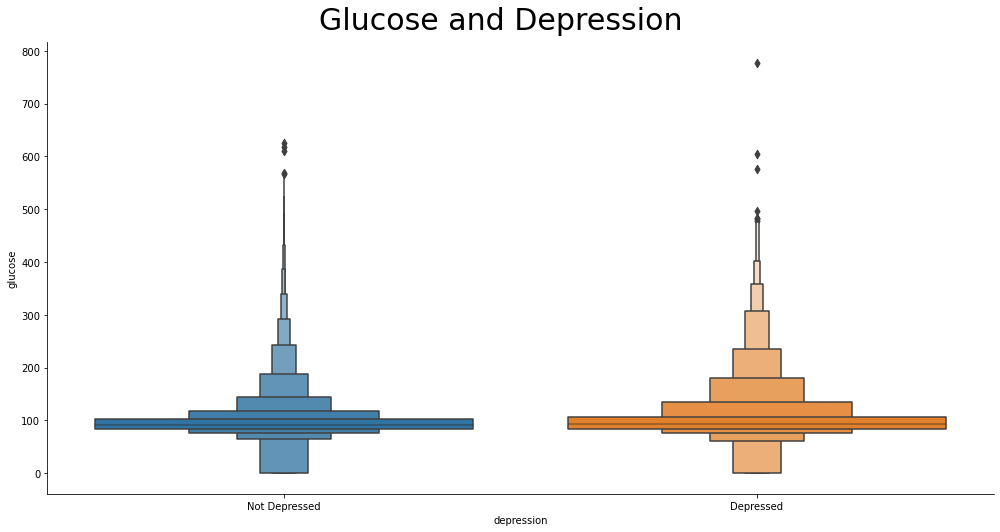

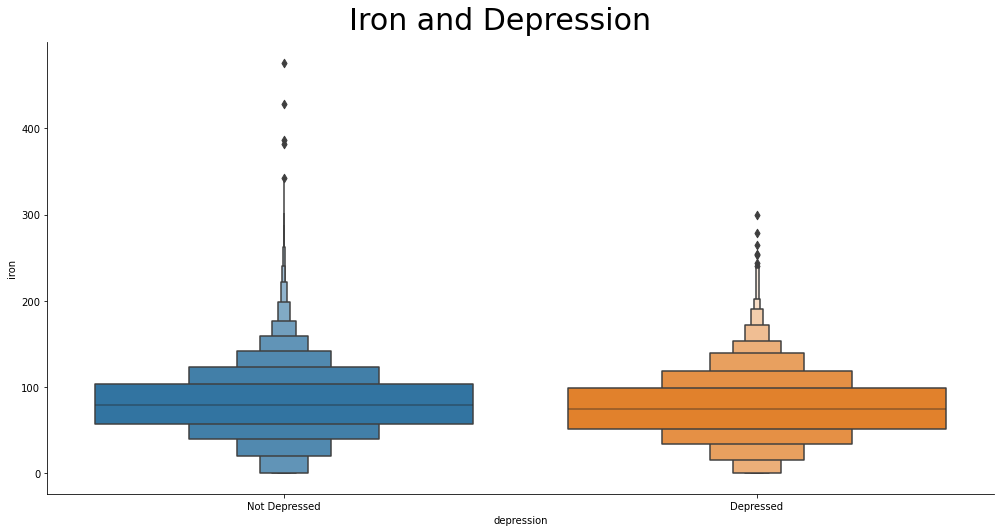

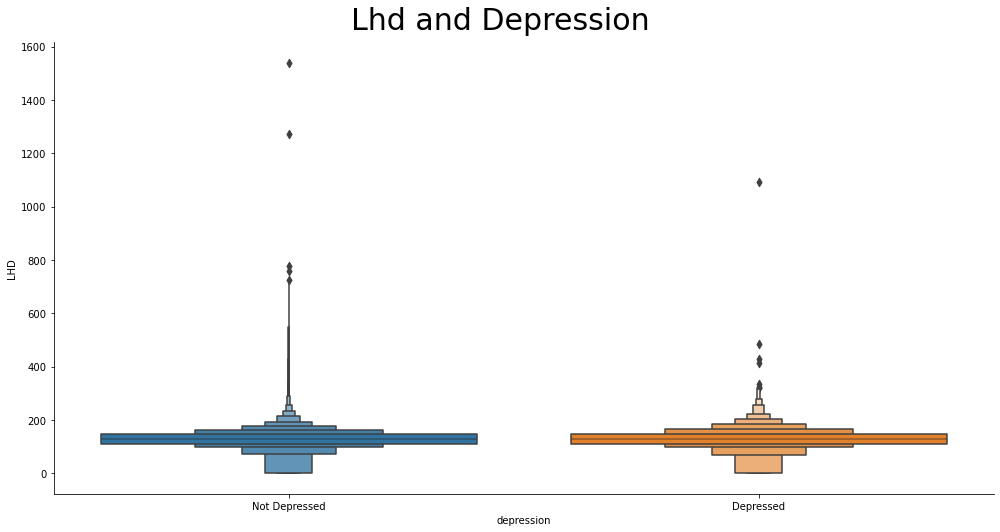

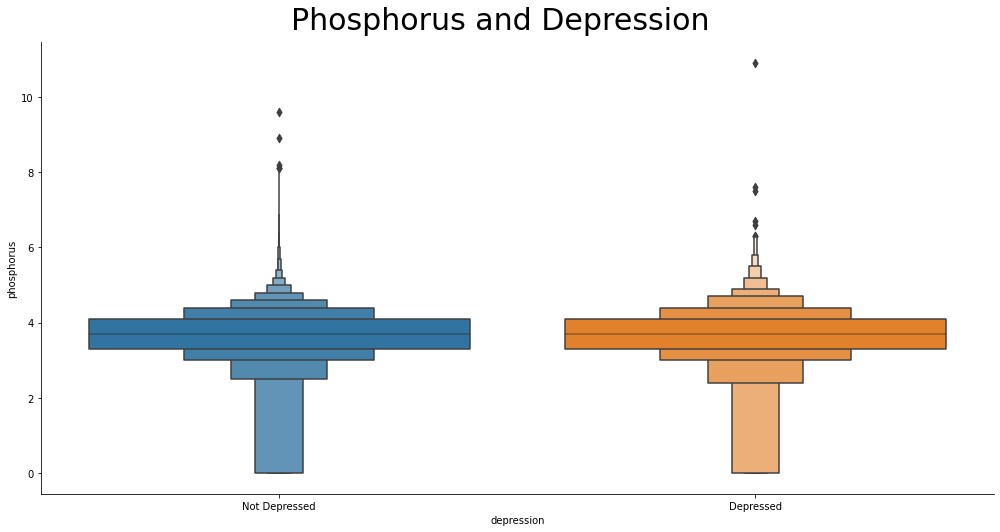

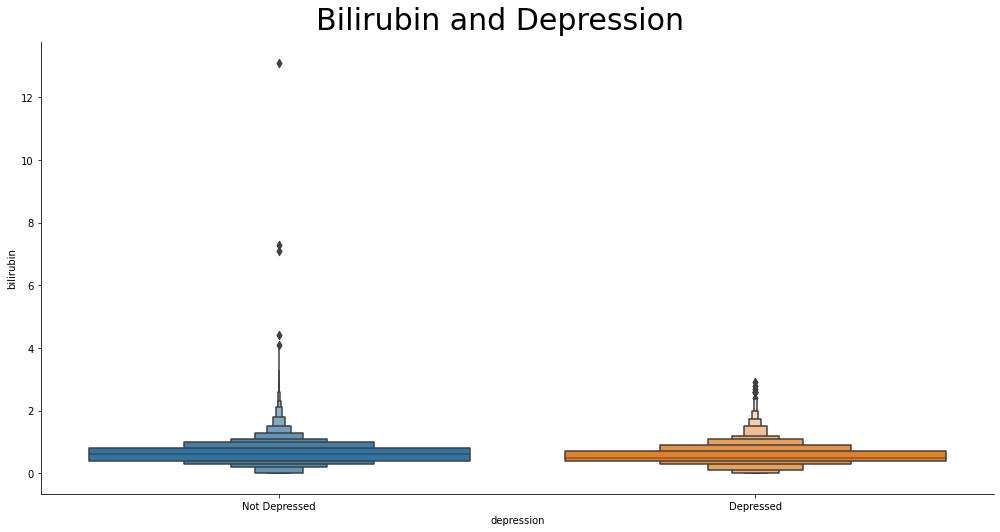

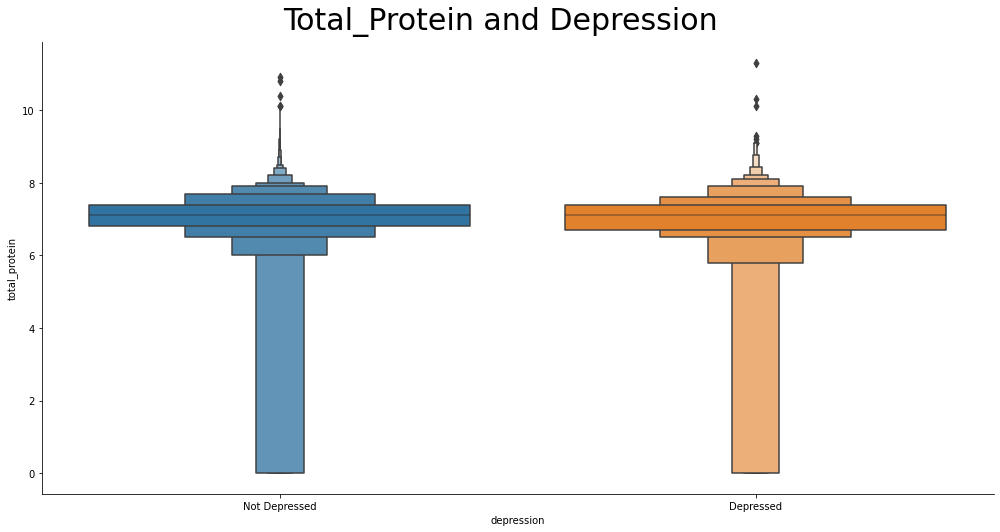

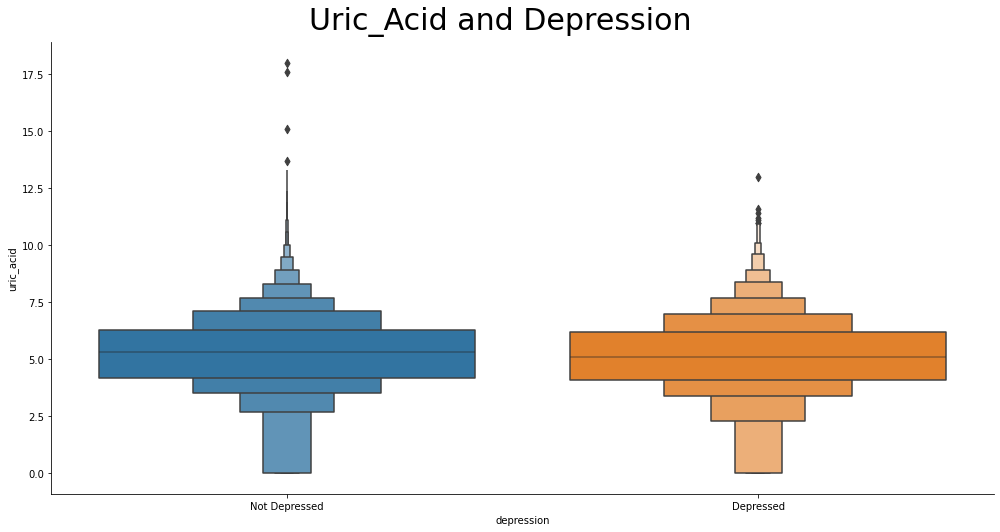

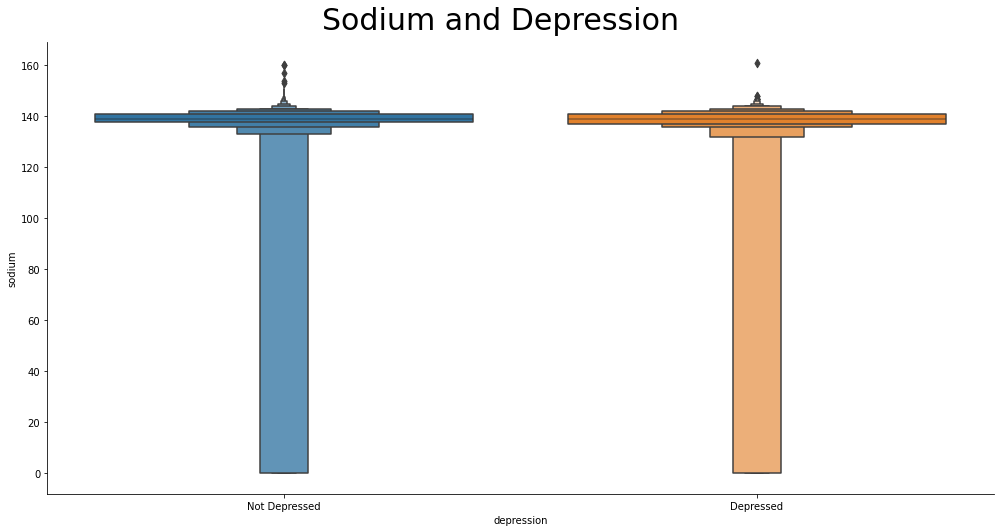

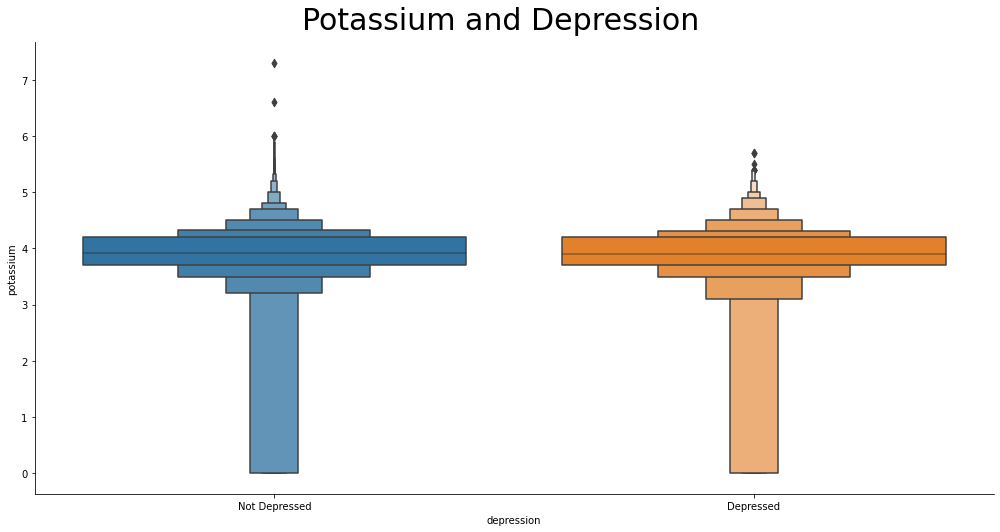

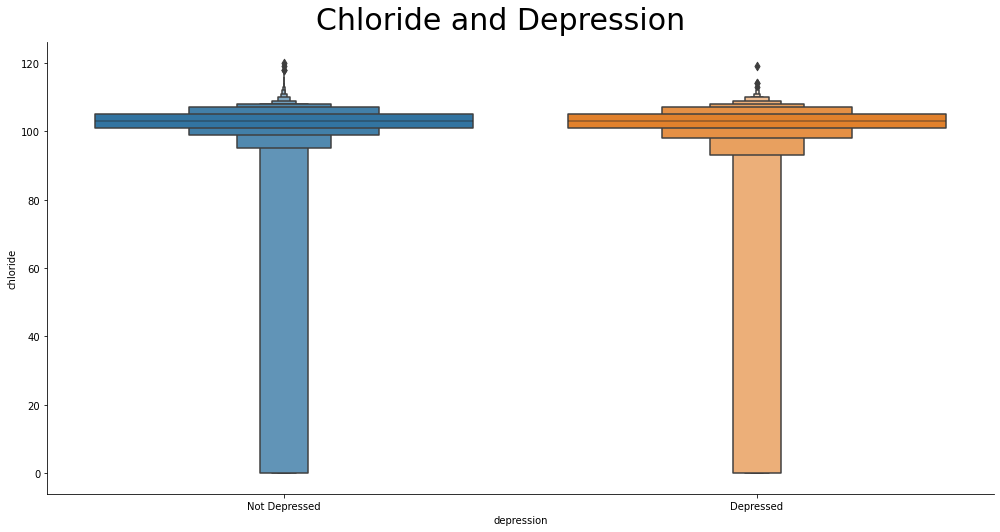

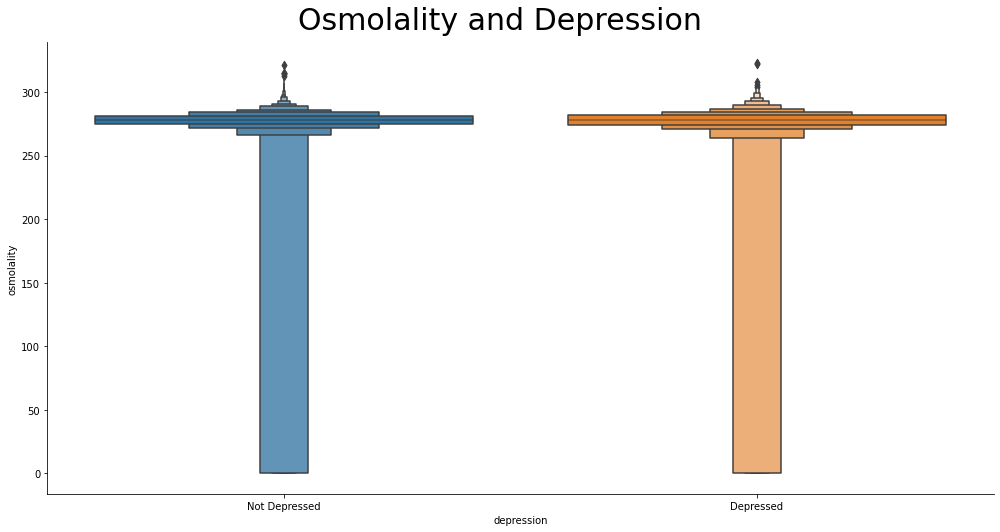

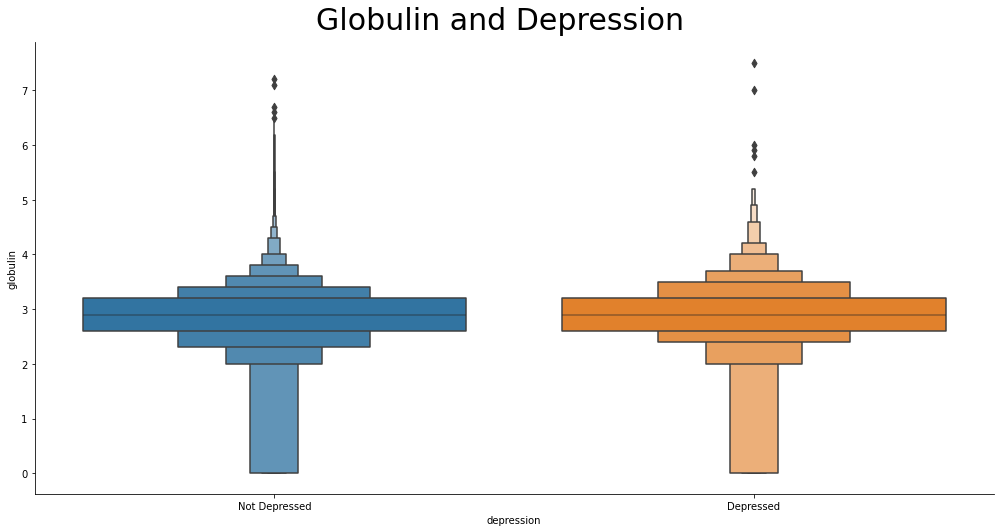

In [35]:
for col in biochem_num_cols:
    plot_num_cols(df_data_1, col)

## Cholesterol

In [36]:
# Listing the columns
chol_num_cols = ['total_cholesterol', 'HDL', 'triglyceride', 'LDL']

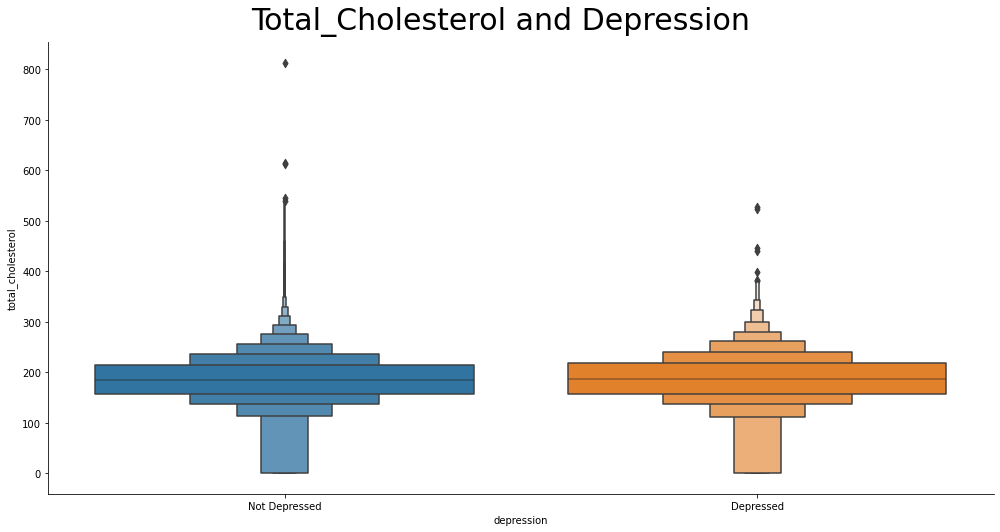

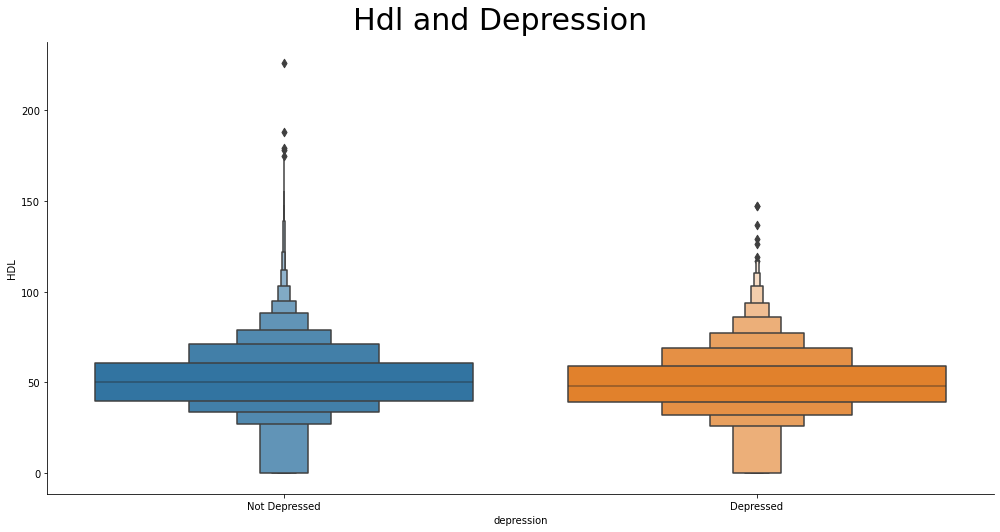

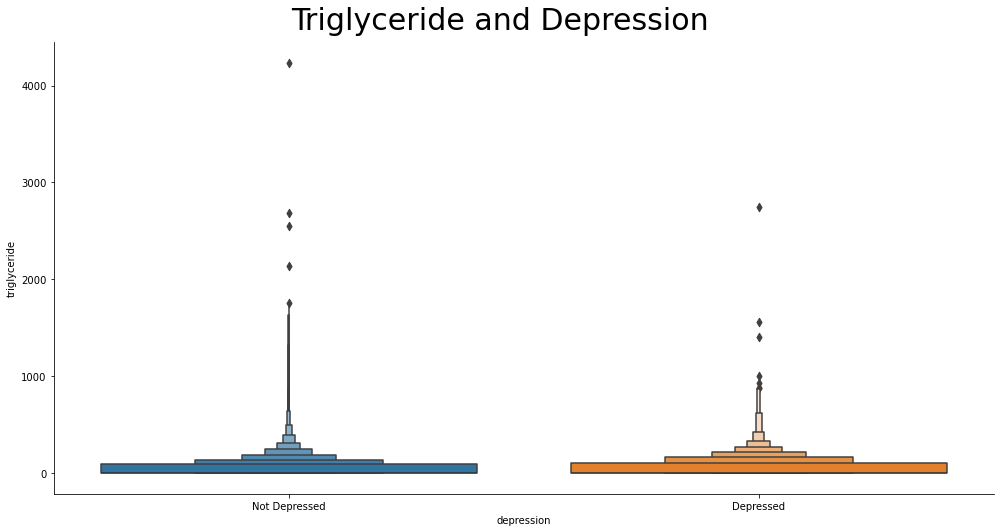

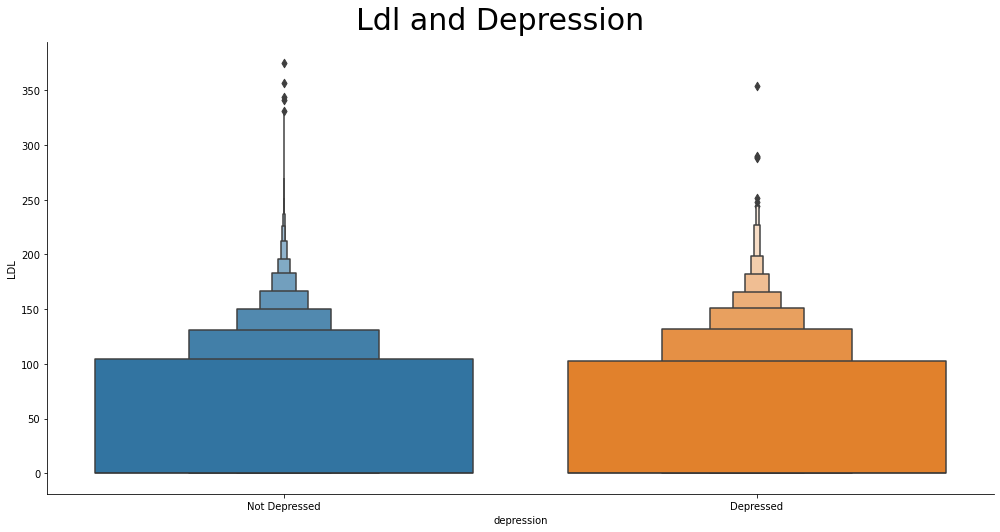

In [37]:
for col in chol_num_cols:
    plot_num_cols(df_data_1, col)

## Medical Condition

In [38]:
# Creating separate lists for the category and number columns
medcond_cat_cols = ['asthma', 'asthma_currently', 'asthma_emergency',
       'anemia', 'ever_overweight', 'blood_transfusion', 'arthritis',
       'heart_failure', 'heart_disease', 'angina', 'heart_attack', 'stroke',
       'emphysema', 'bronchitis', 'liver_condition', 'thyroid_problem',
       'bronchitis_currently', 'liver_condition_currently',
       'thyroid_problem_currently', 'cancer', 'first_cancer_type',
       'second_cancer_type', 'third_cancer_type','fourth_cancer_count',
       'heart_attack_relative', 'asthma_relative', 'diabetes_relative',
       'hay_fever', 'first_cancer_count', 
       'second_cancer_count', 'third_cancer_count']

medcond_num_cols = ['asthma_onset', 'arthritis_onset', 'heart_failure_onset',
       'heart_disease_onset', 'angina_onset', 'heart_attack_onset',
       'stroke_onset', 'emphysema_onset', 'bronchitis_onset',
       'liver_condition_onset', 'thyroid_problem_onset', 'cancer_onset']

C:\Users\princ\AppData\Local\Temp/ipykernel_17232/3128025016.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(16,8))


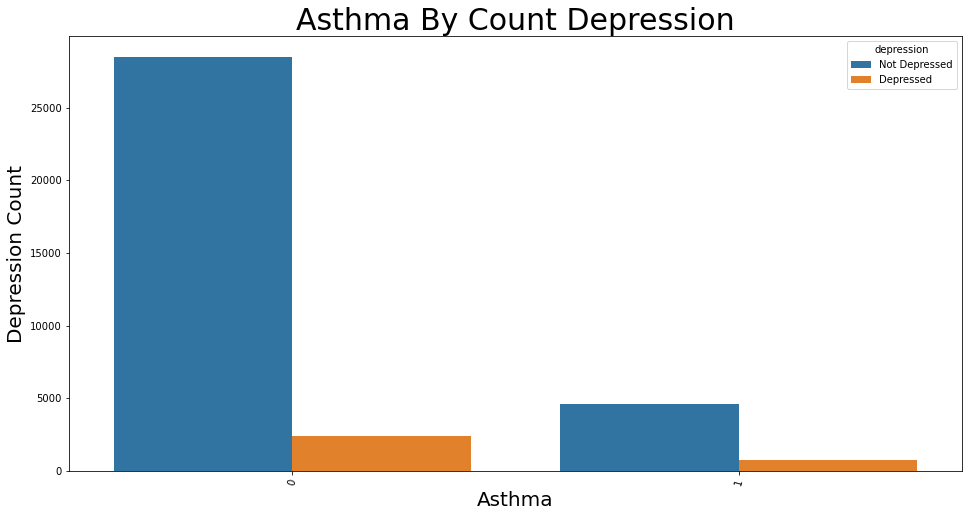

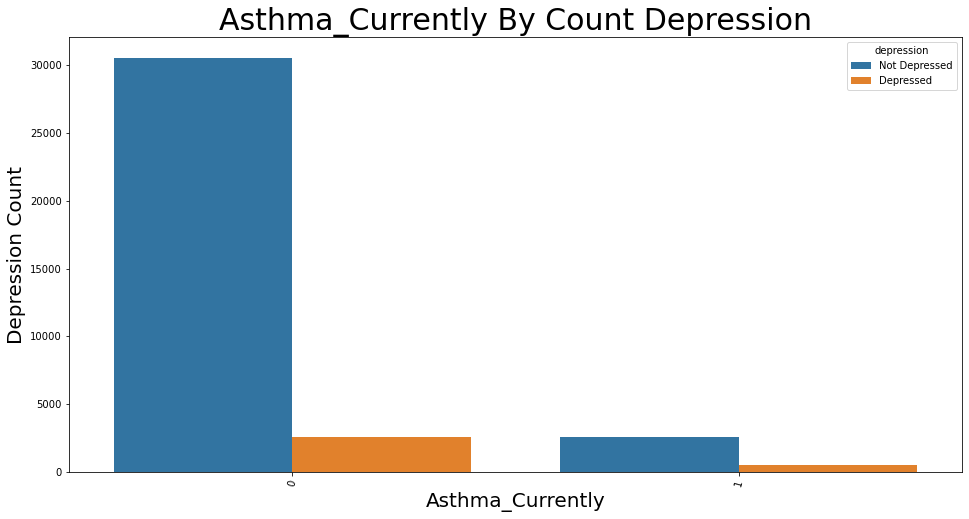

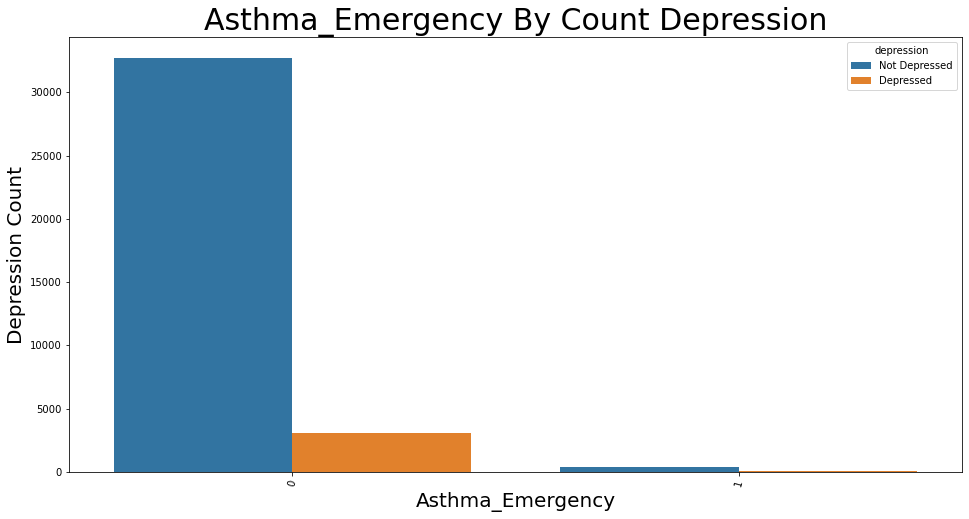

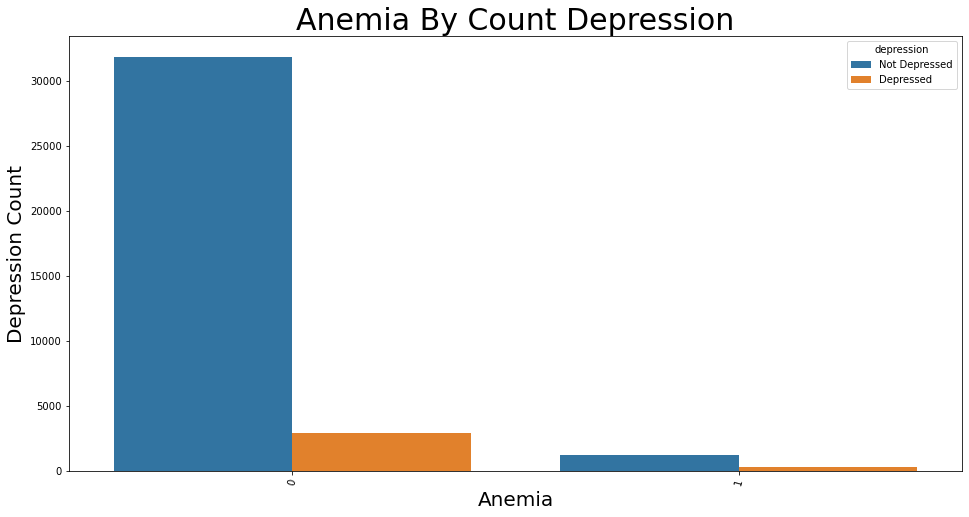

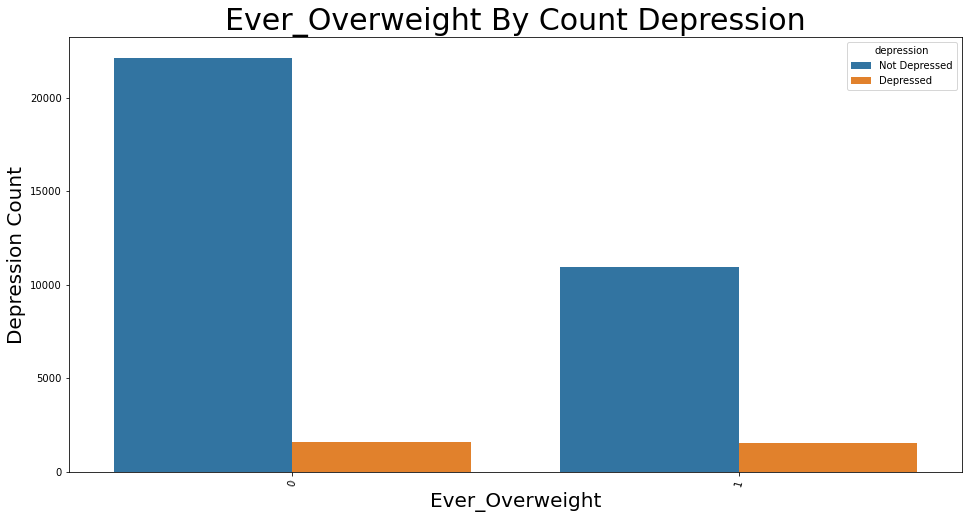

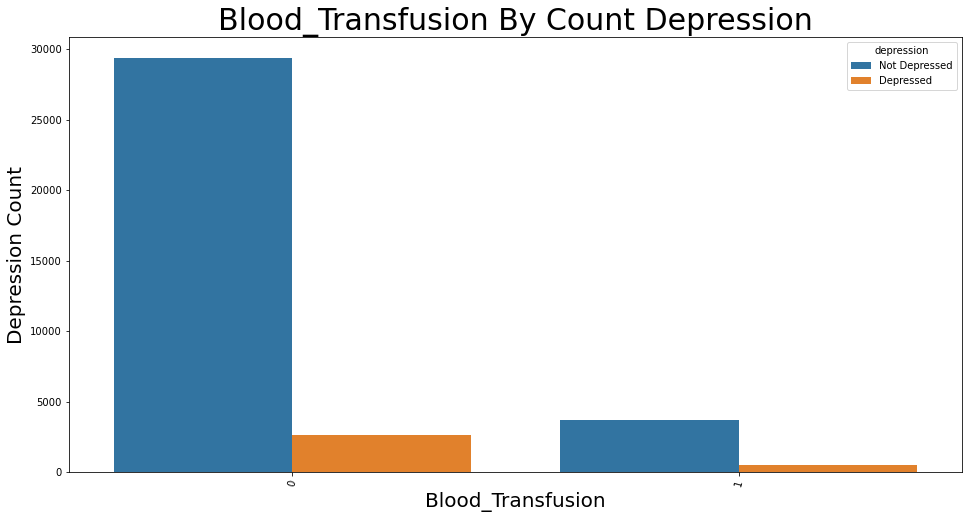

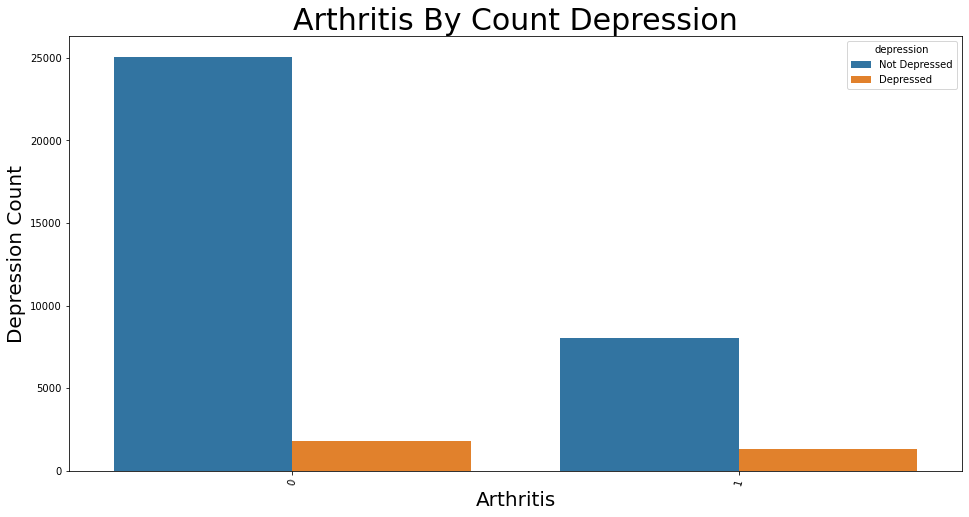

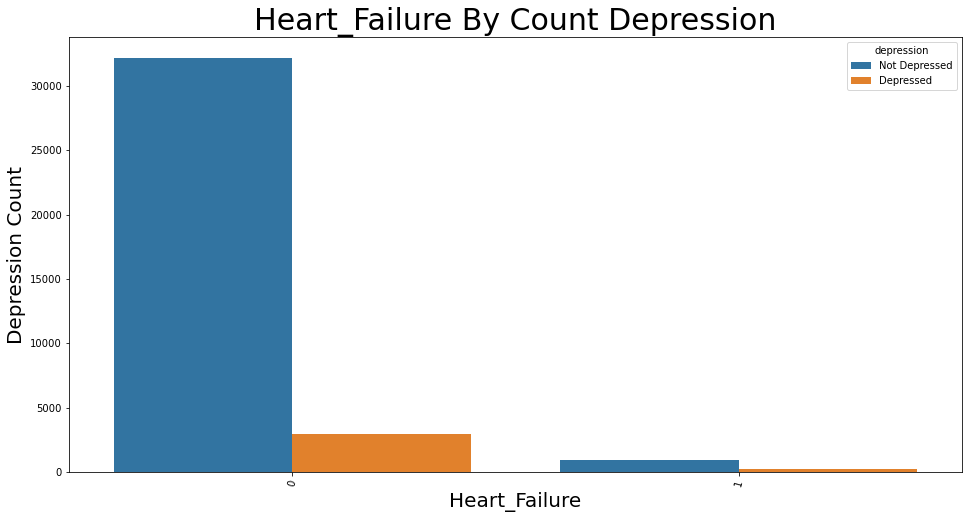

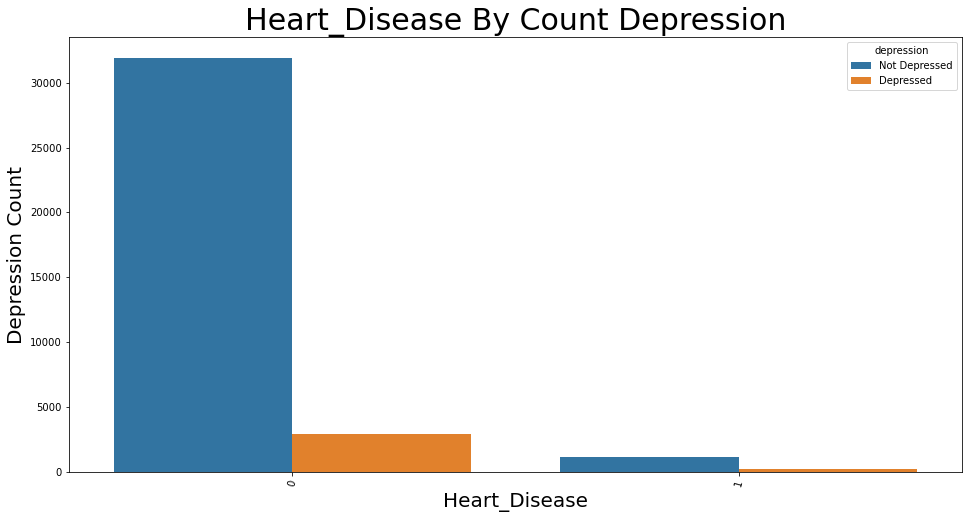

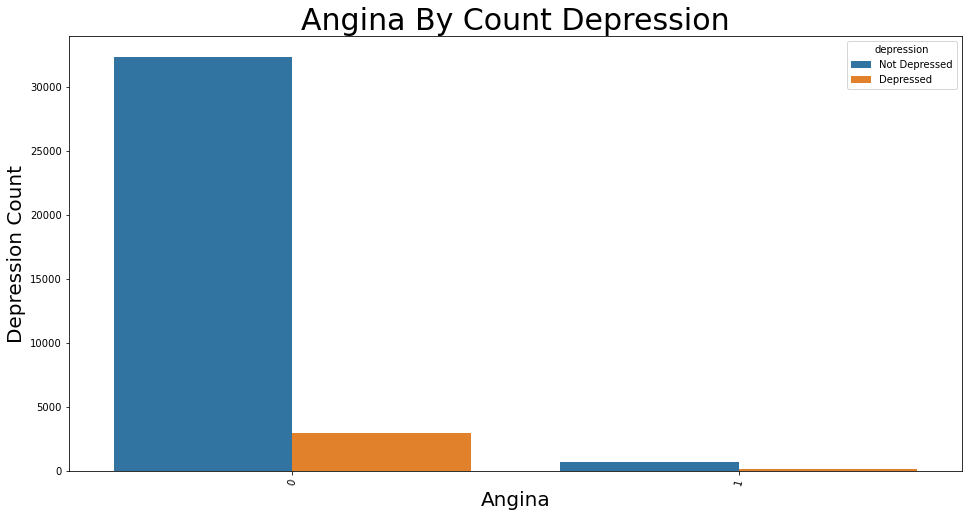

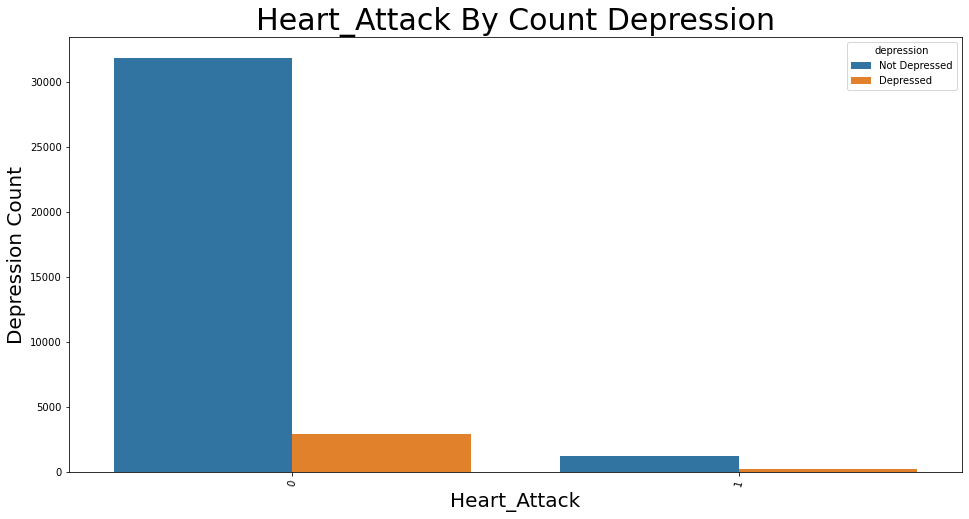

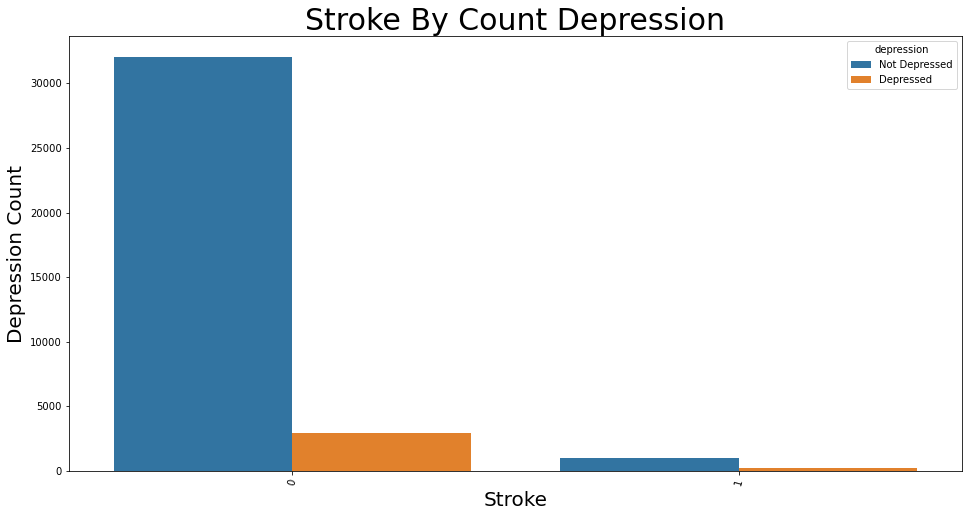

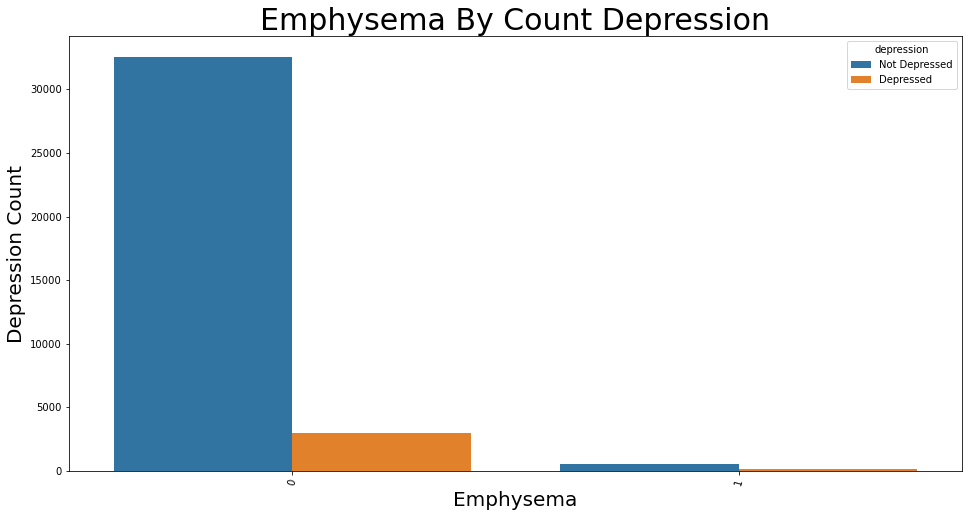

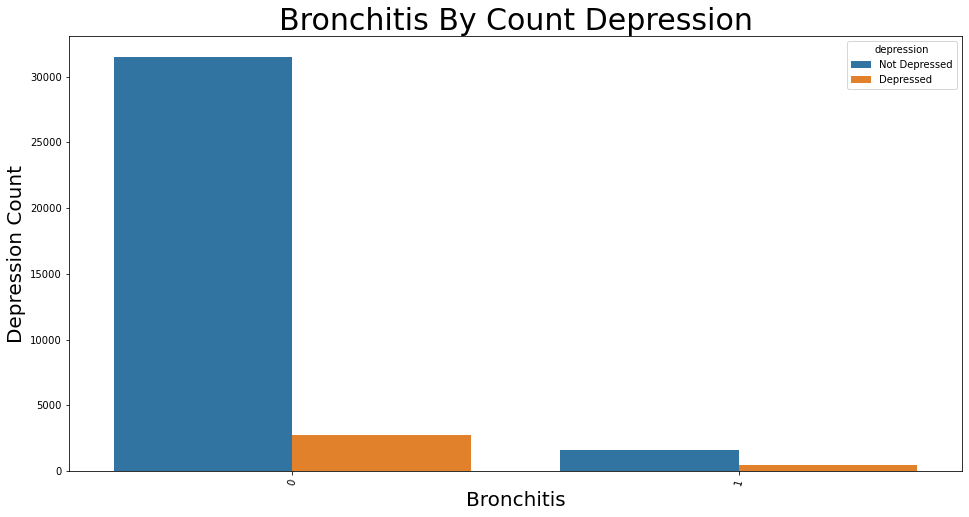

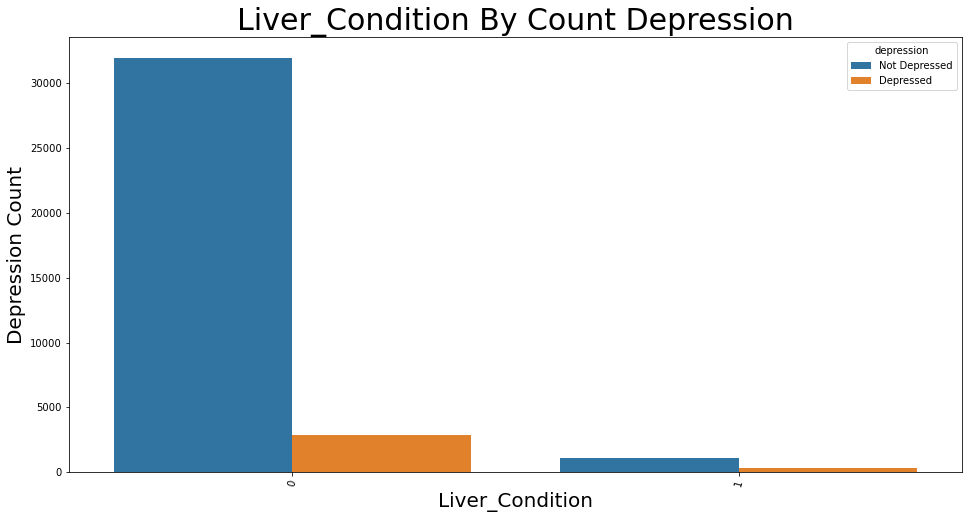

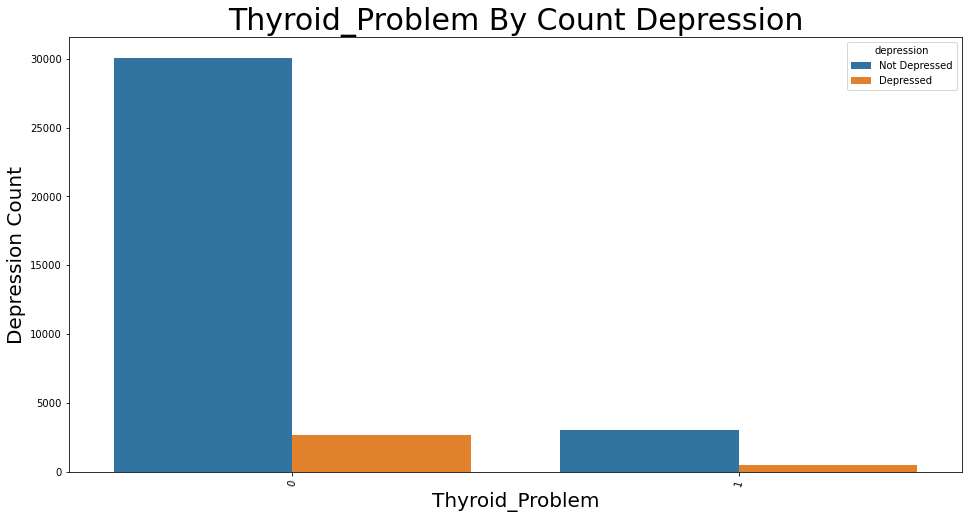

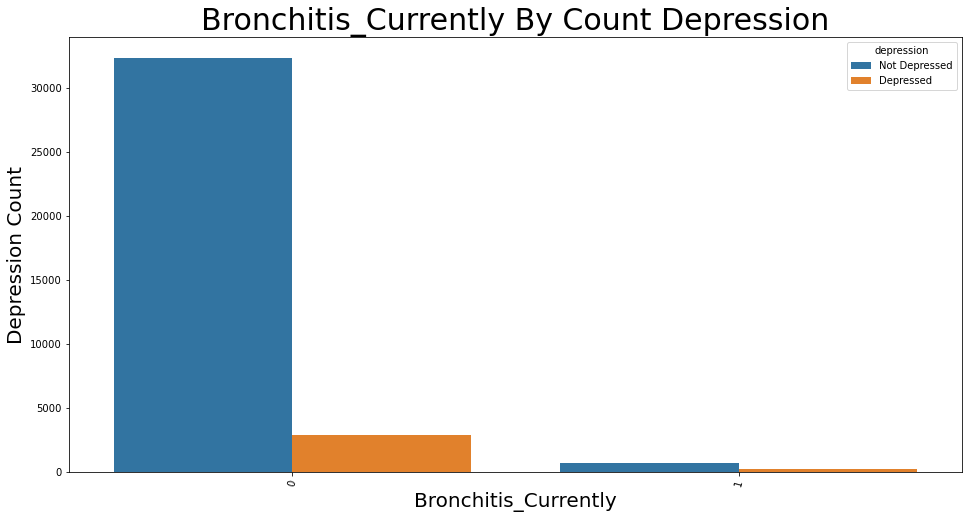

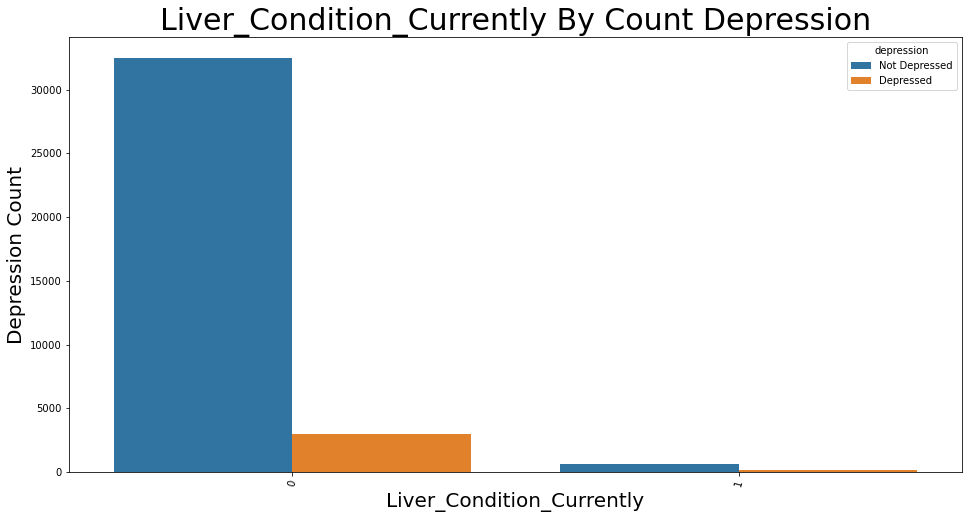

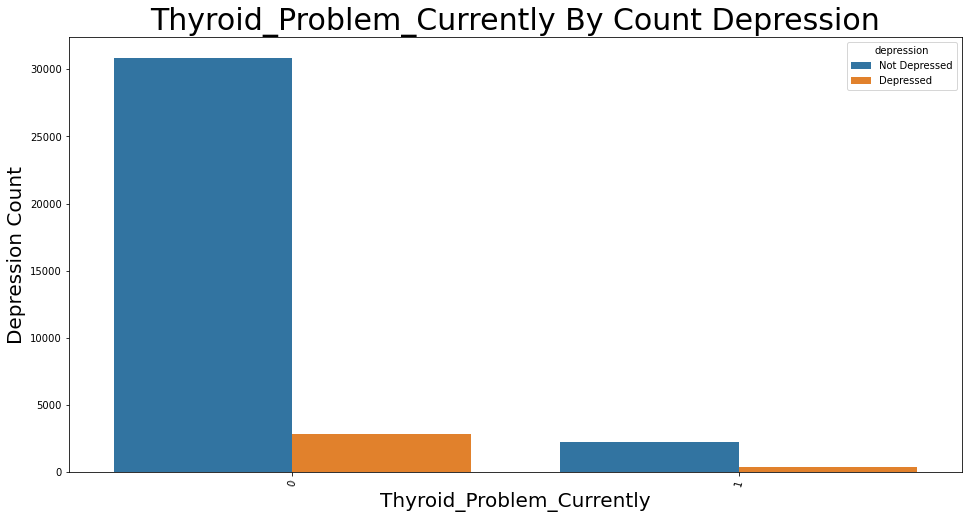

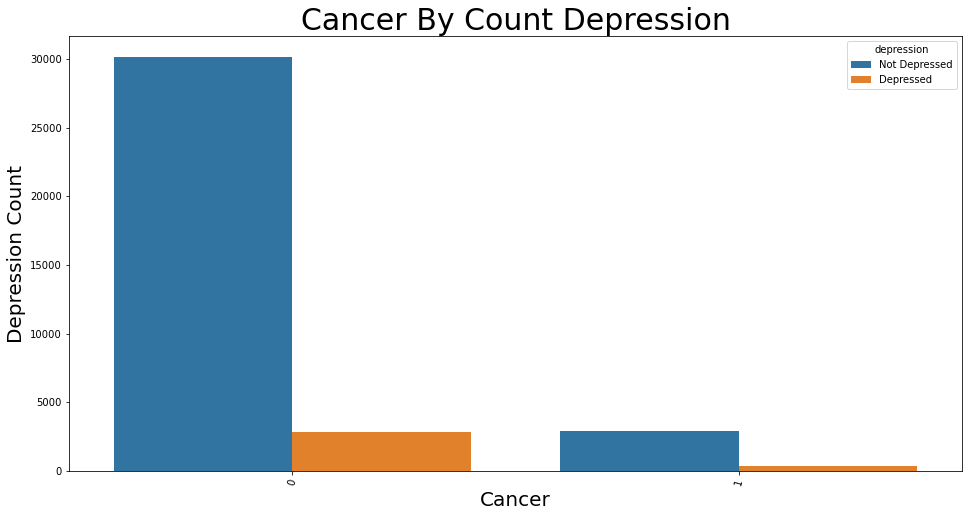

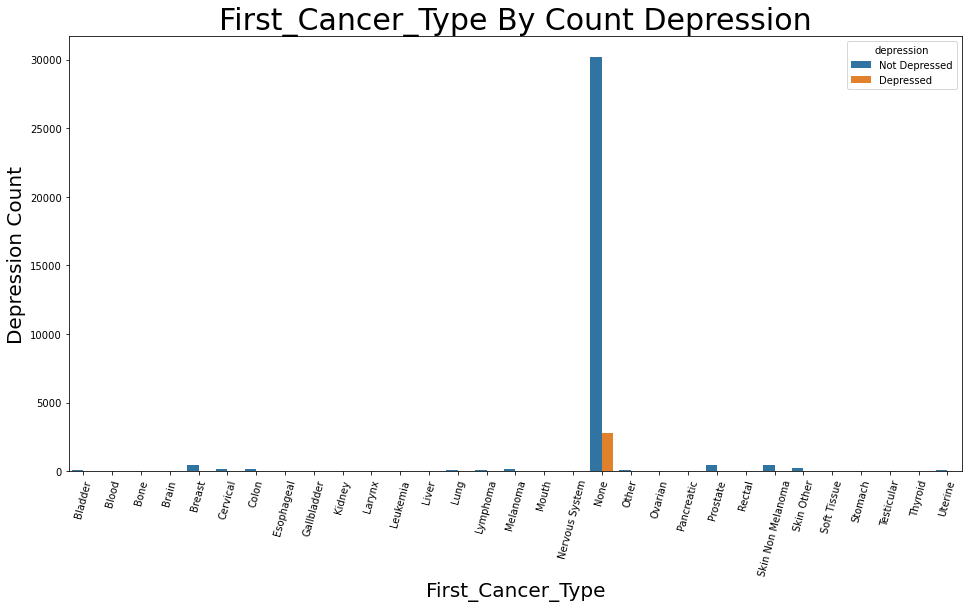

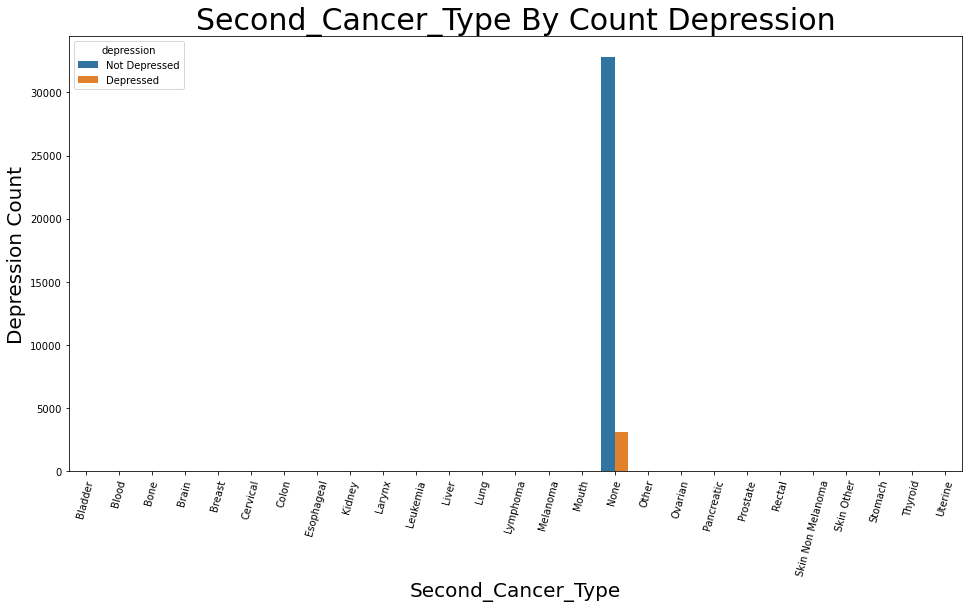

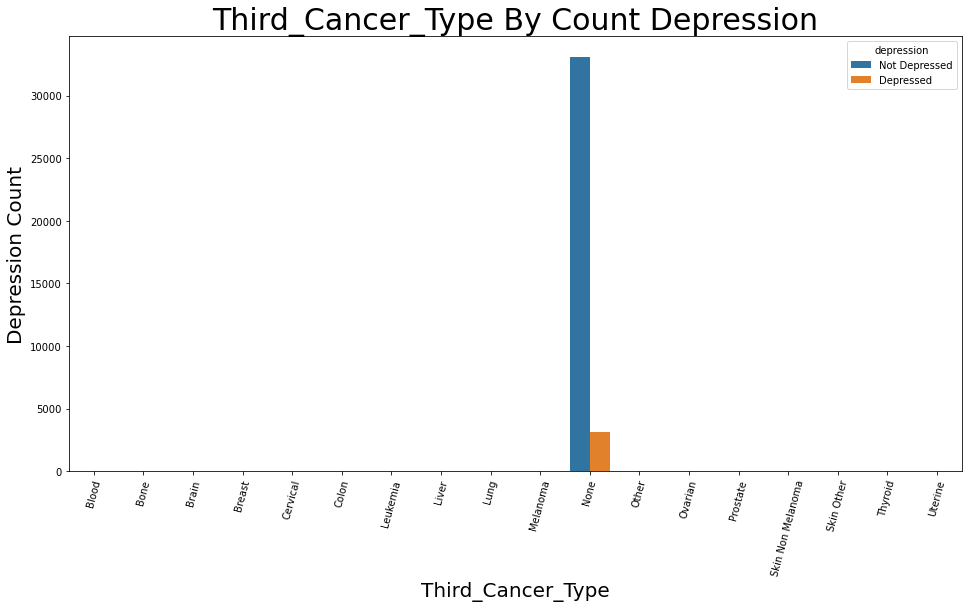

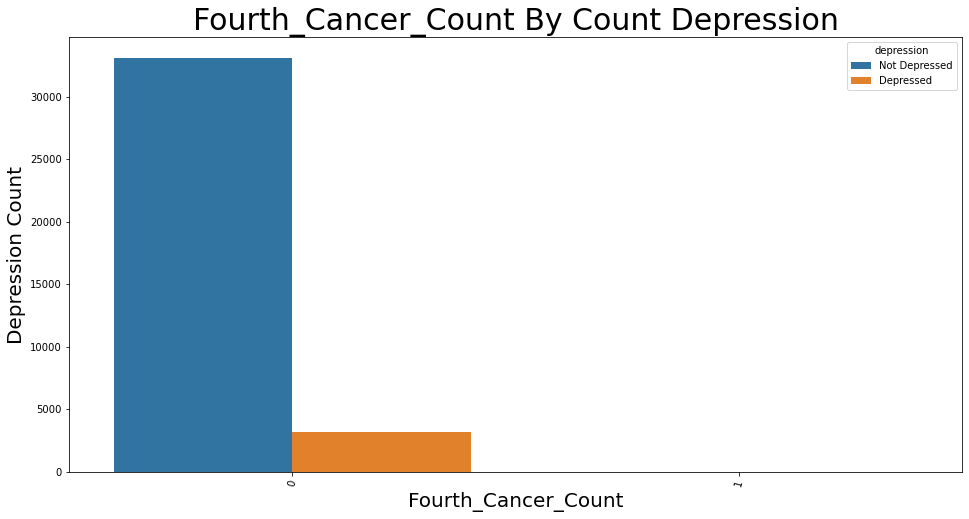

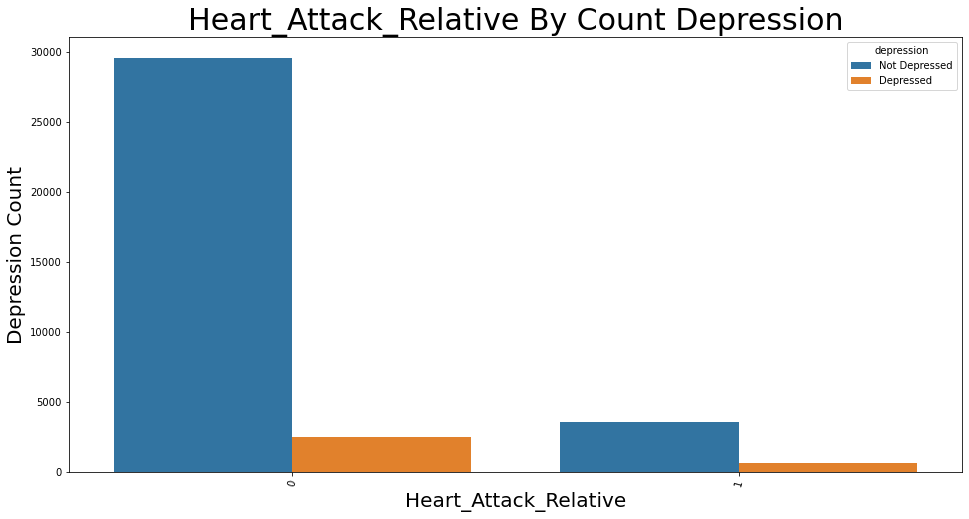

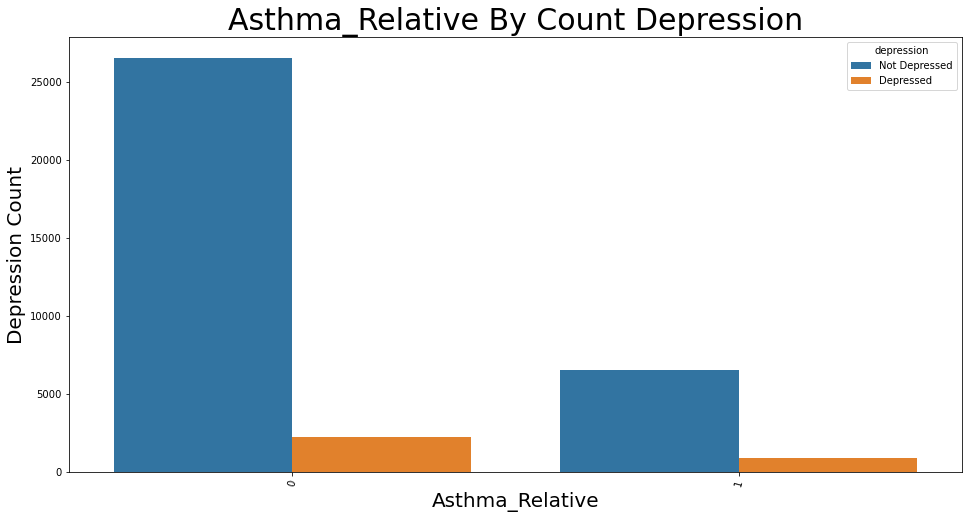

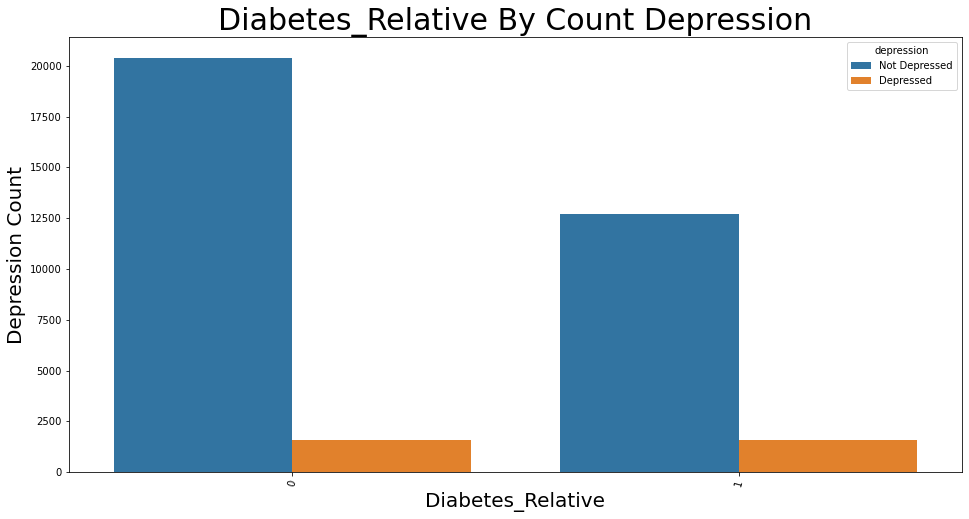

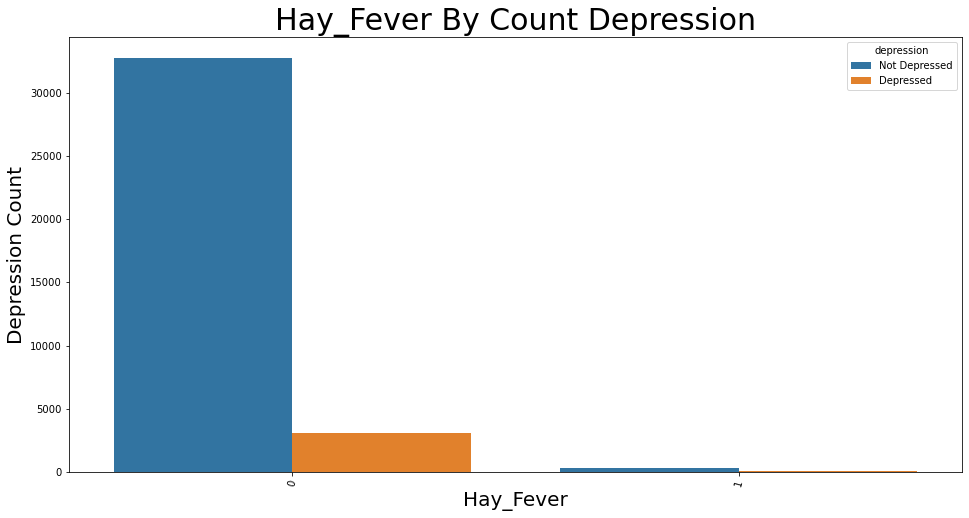

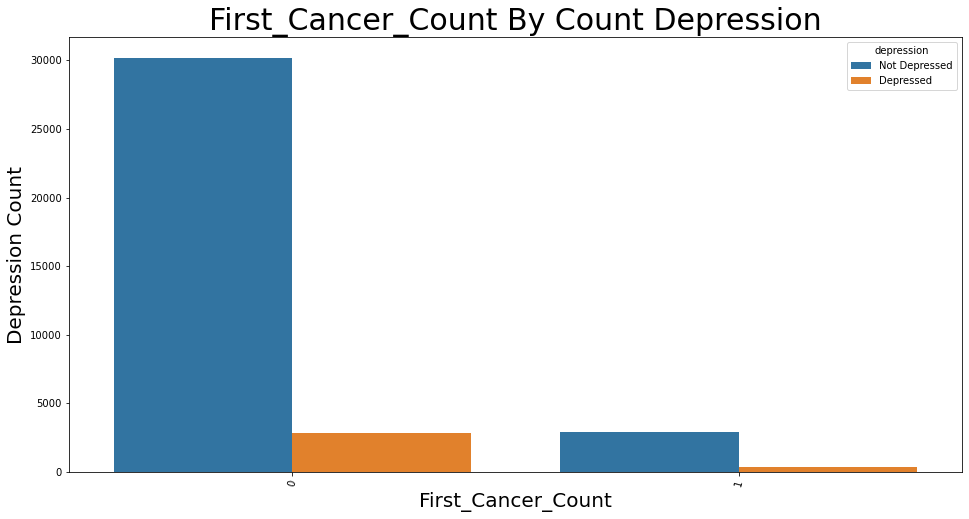

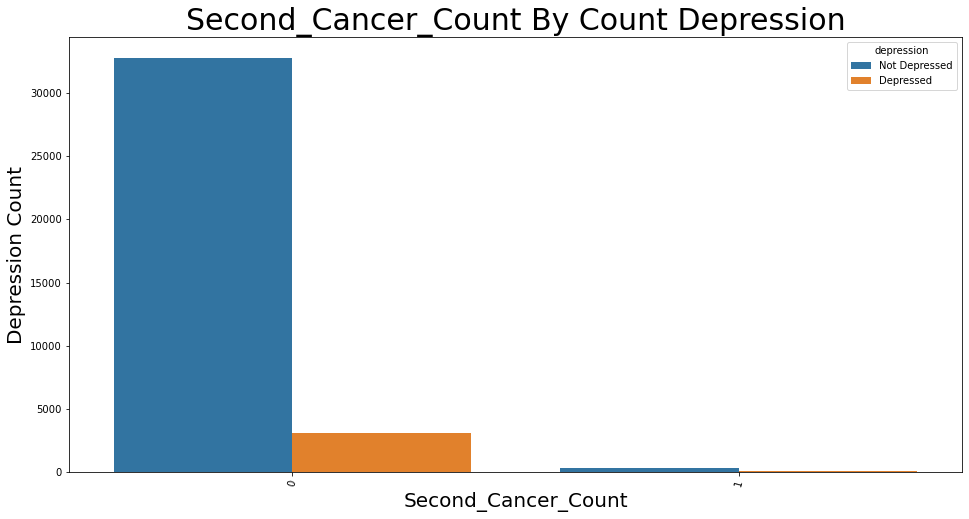

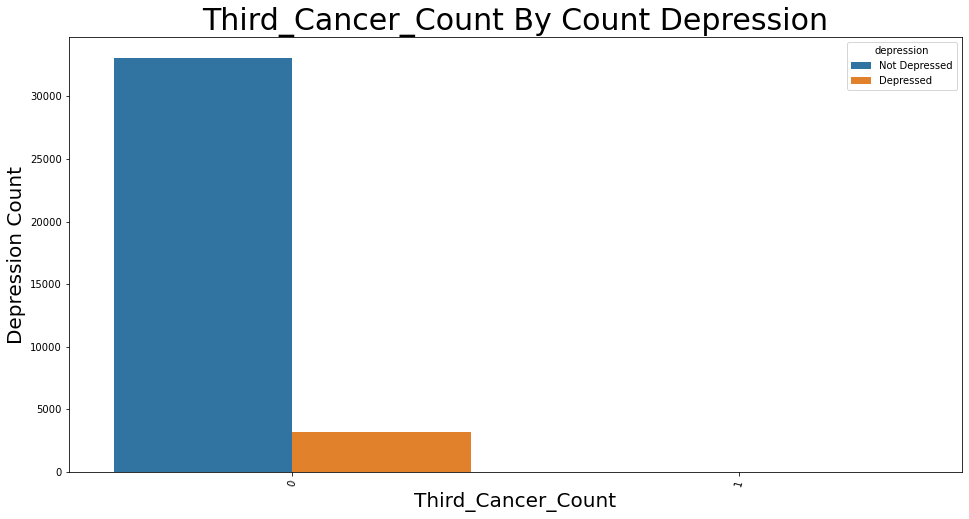

In [39]:
# Plotting the columns
for col in medcond_cat_cols:
    plotting_counts(df_data_1, col)

## Physical Functioning

In [40]:
# Listing the columns
function_cat_cols = ['cant_work', 'limited_work', 'walking_equipment', 
            'memory_problems', 'limitations', 'healthcare_equipment',
            'health_problem_Other Impairment', 'health_problem_Bone or Joint',
            'health_problem_Weight', 'health_problem_Back or Neck',
            'health_problem_Arthritis', 'health_problem_Cancer',
            'health_problem_Other Injury', 'health_problem_Breathing',
            'health_problem_Stroke', 'health_problem_Blood Pressure', 
            'health_problem_Mental Retardation', 'health_problem_Hearing', 
            'health_problem_Heart', 'health_problem_Vision', 
            'health_problem_Diabetes', 'health_problem_Birth Defect', 
            'health_problem_Senility', 'health_problem_Other Developmental']

C:\Users\princ\AppData\Local\Temp/ipykernel_17232/3128025016.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(16,8))


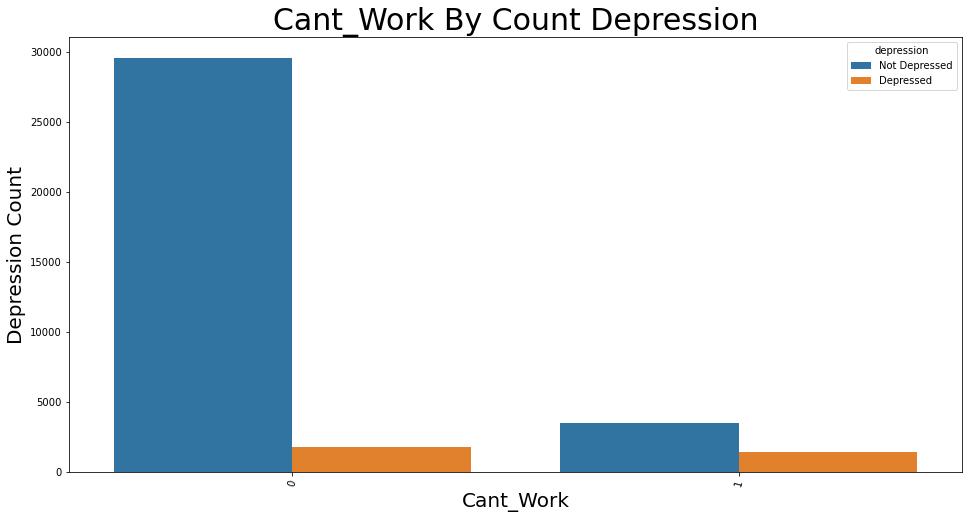

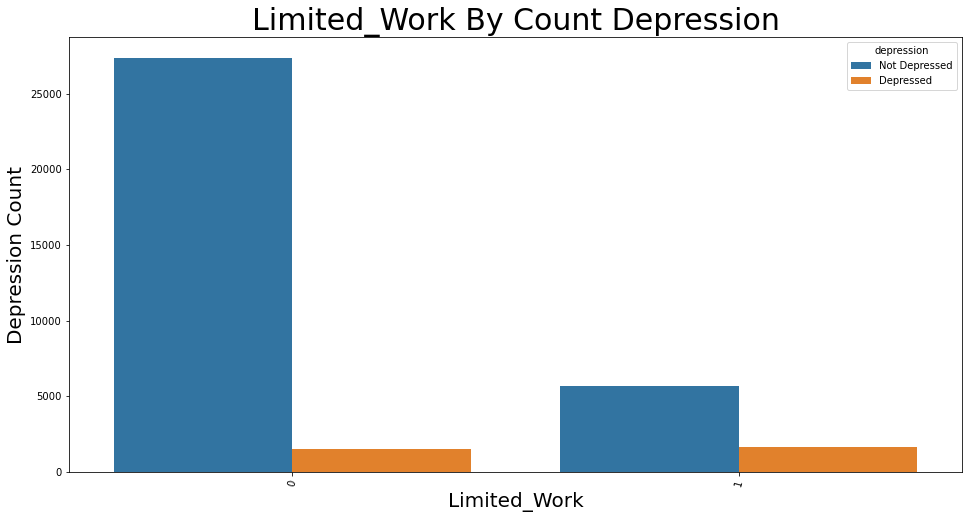

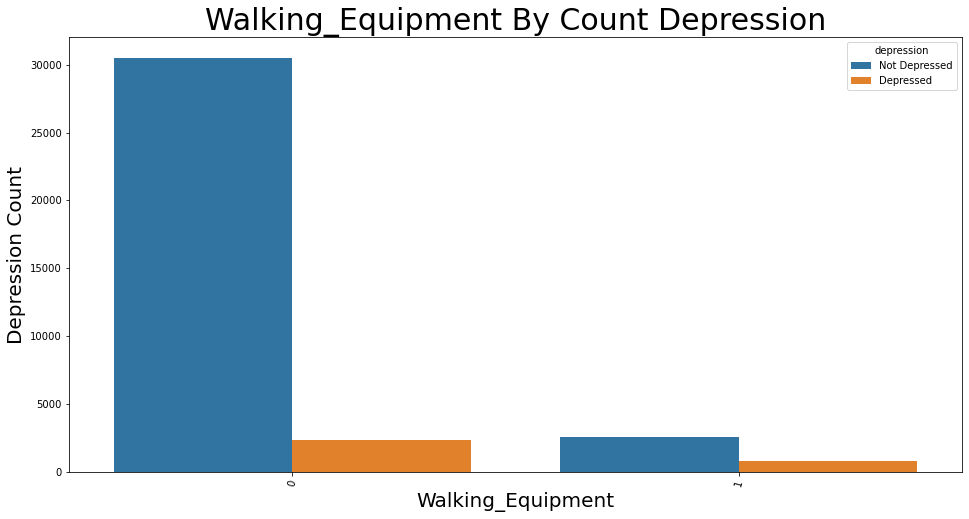

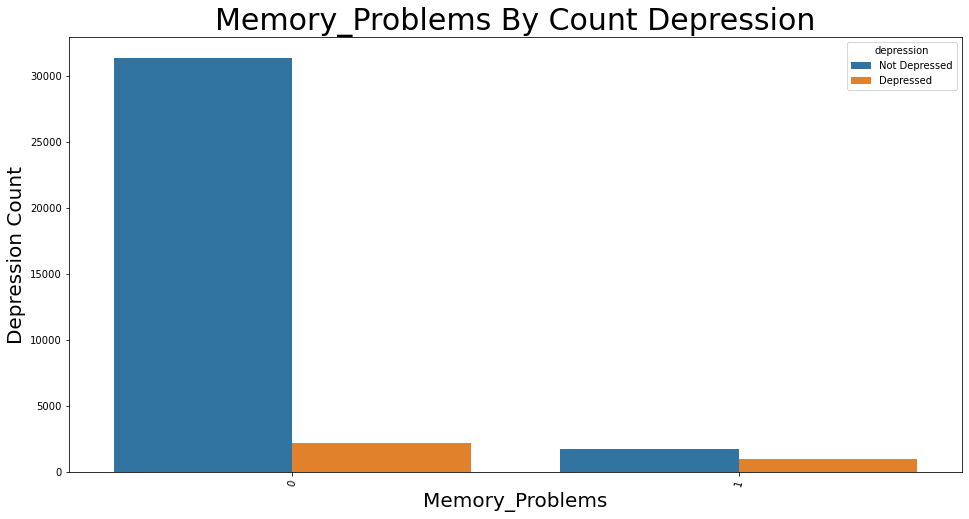

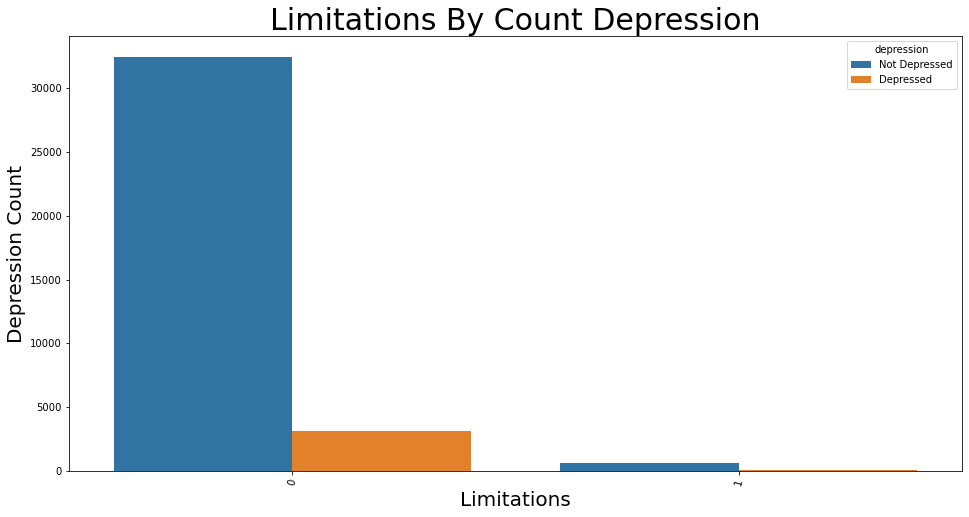

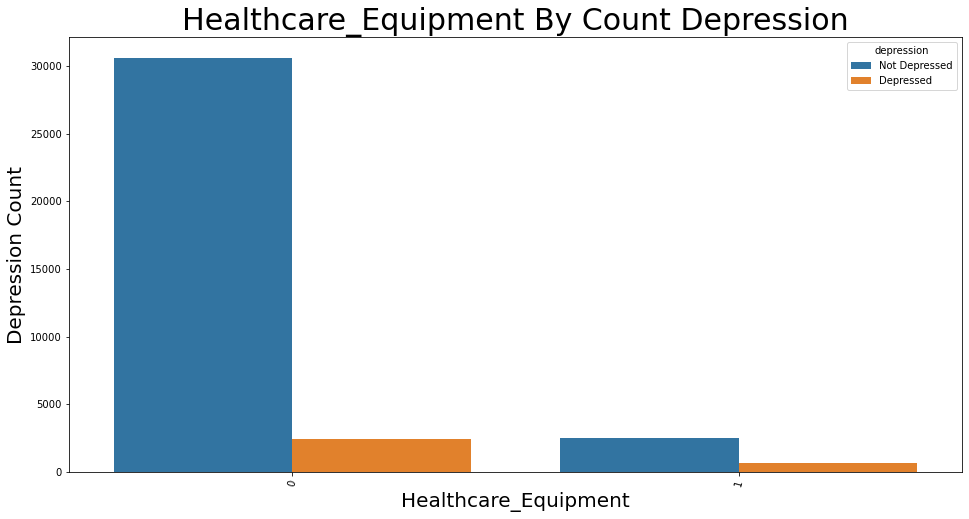

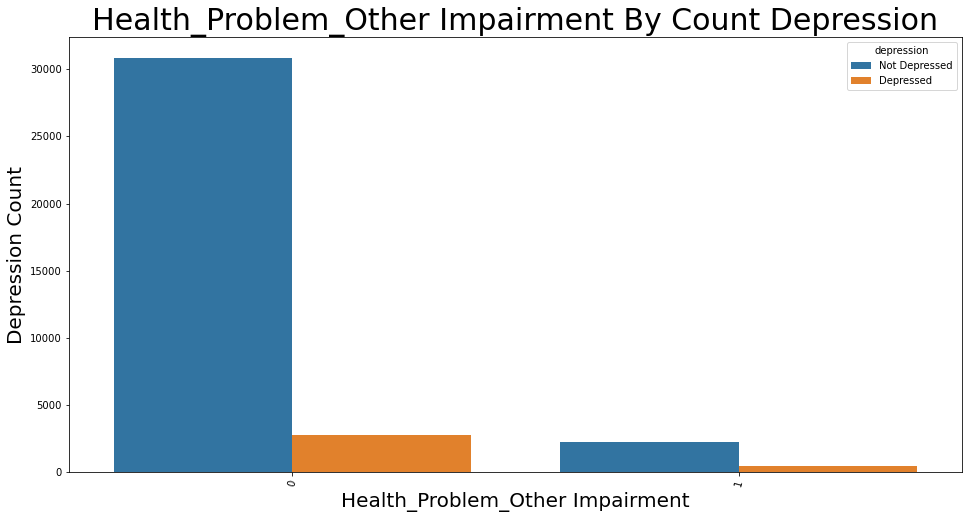

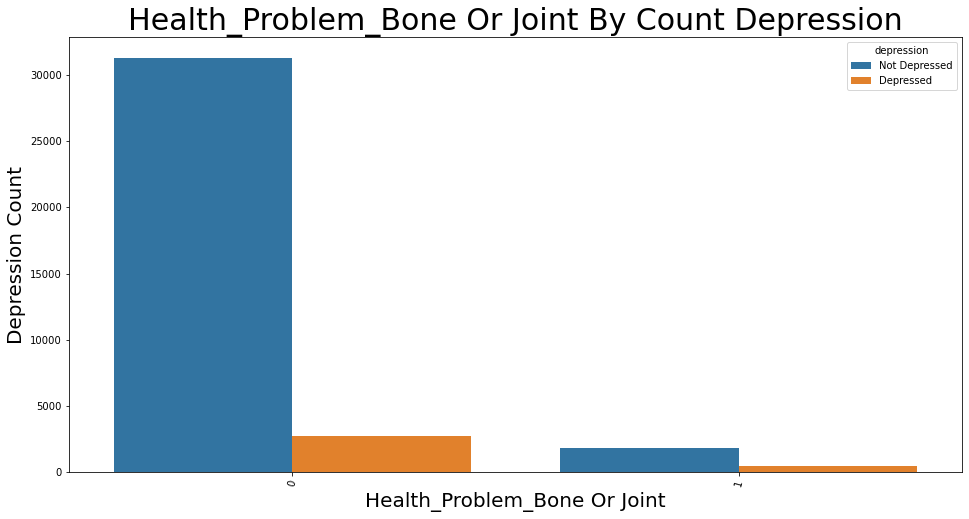

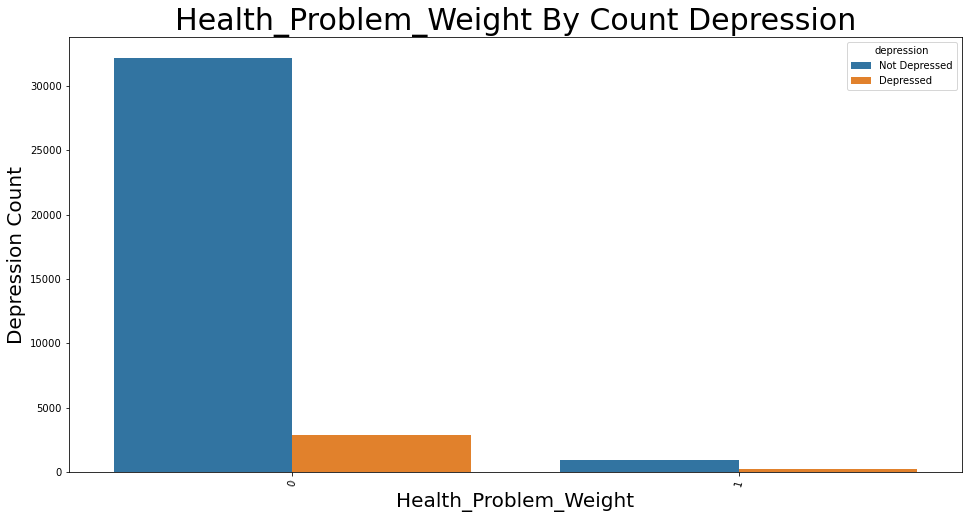

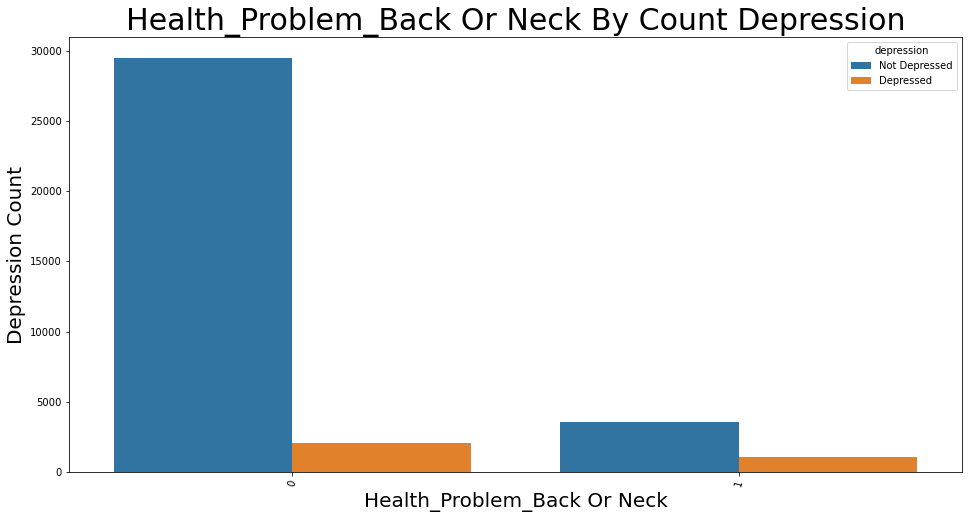

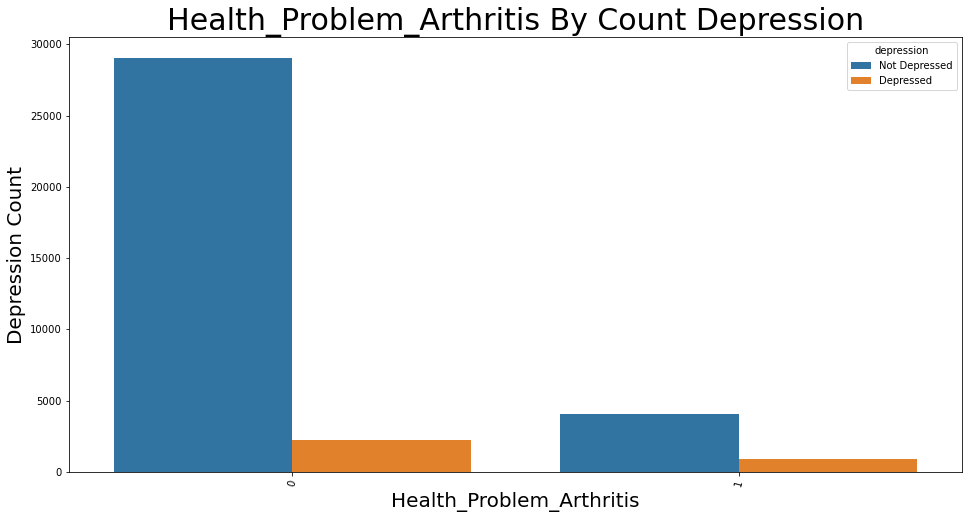

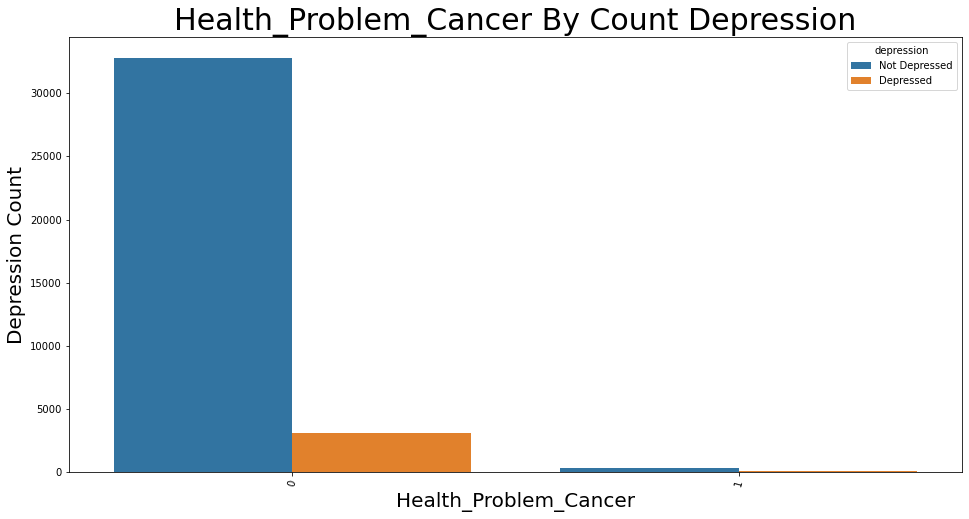

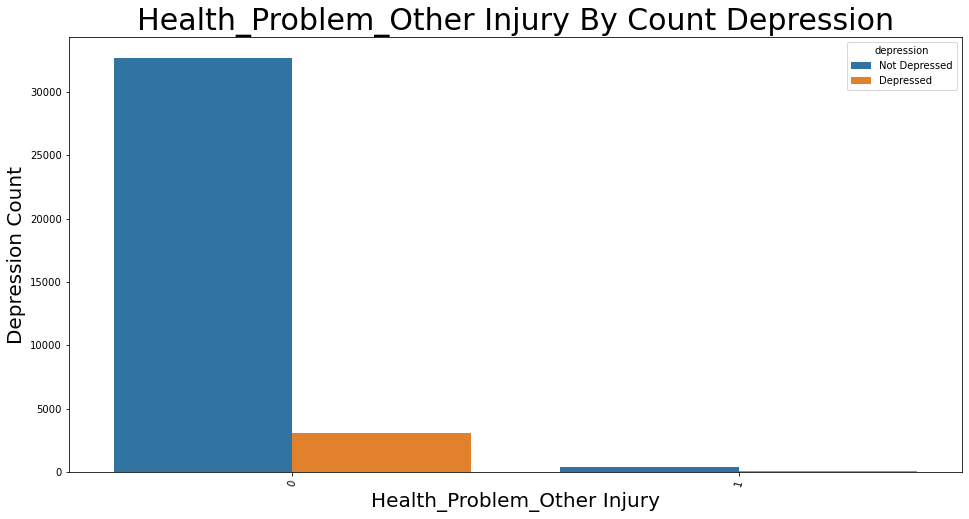

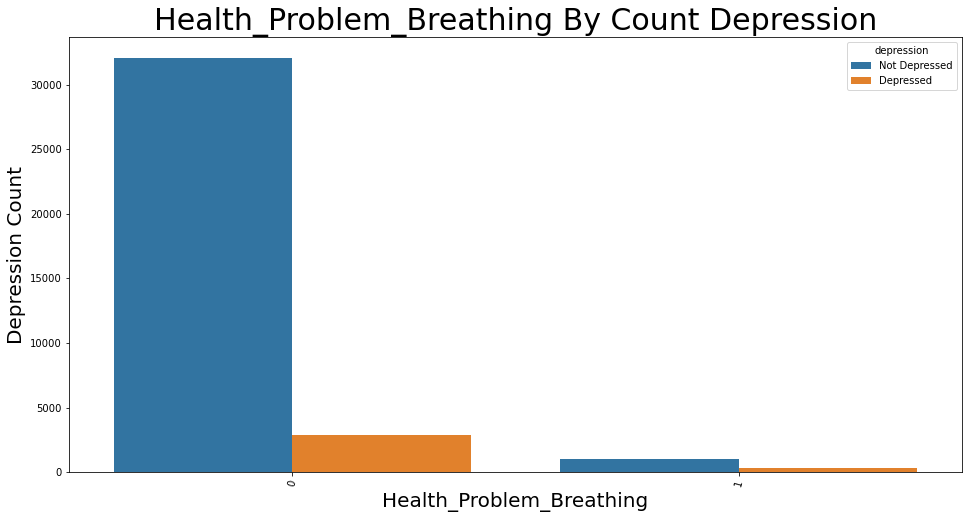

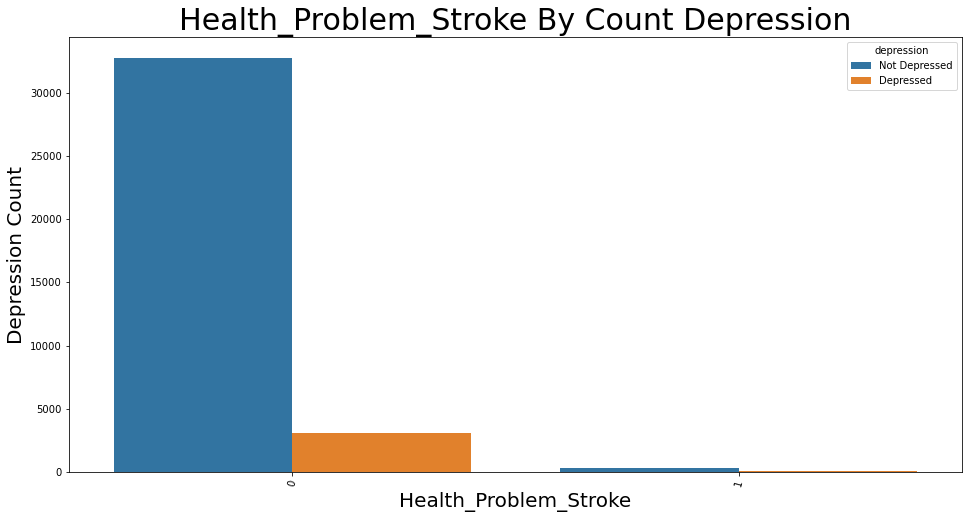

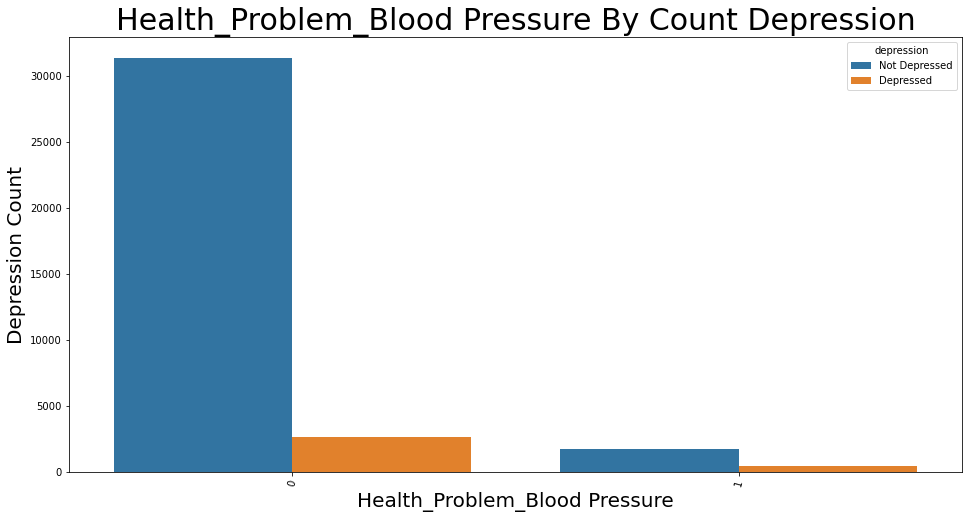

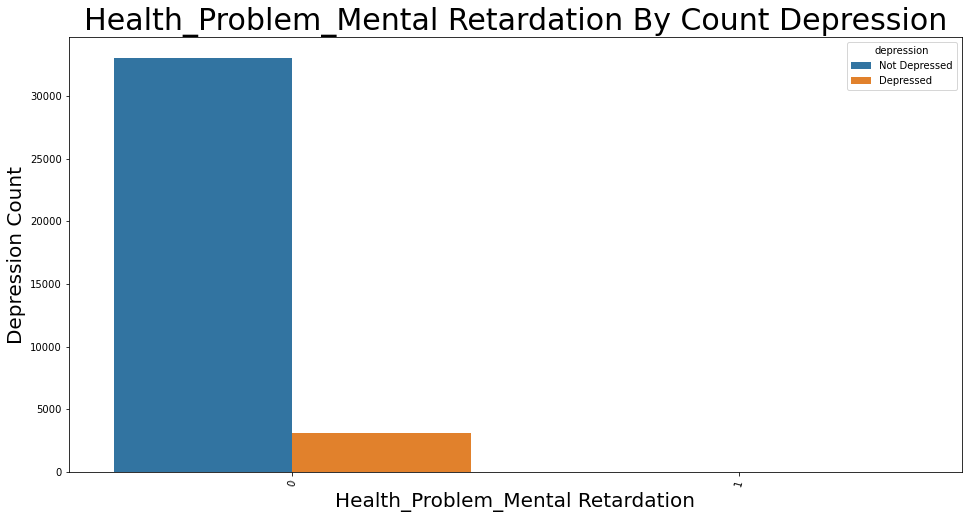

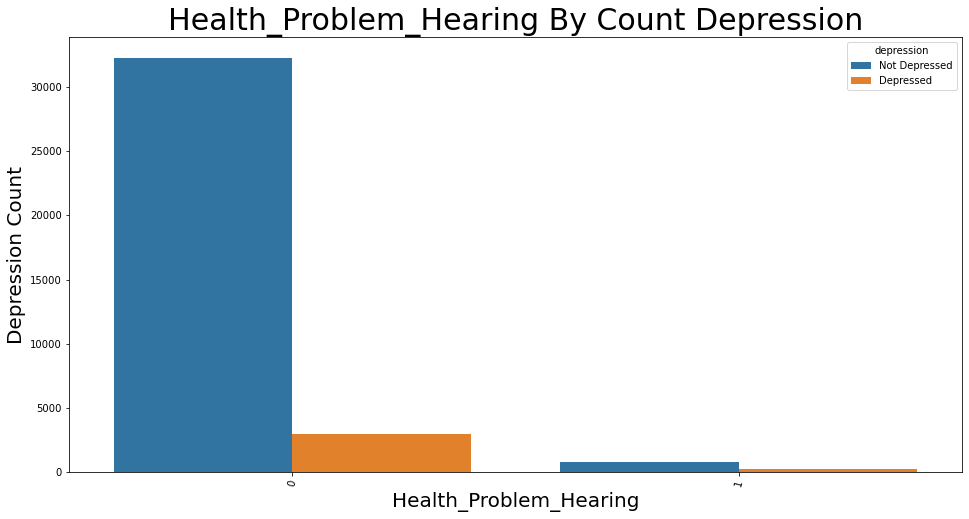

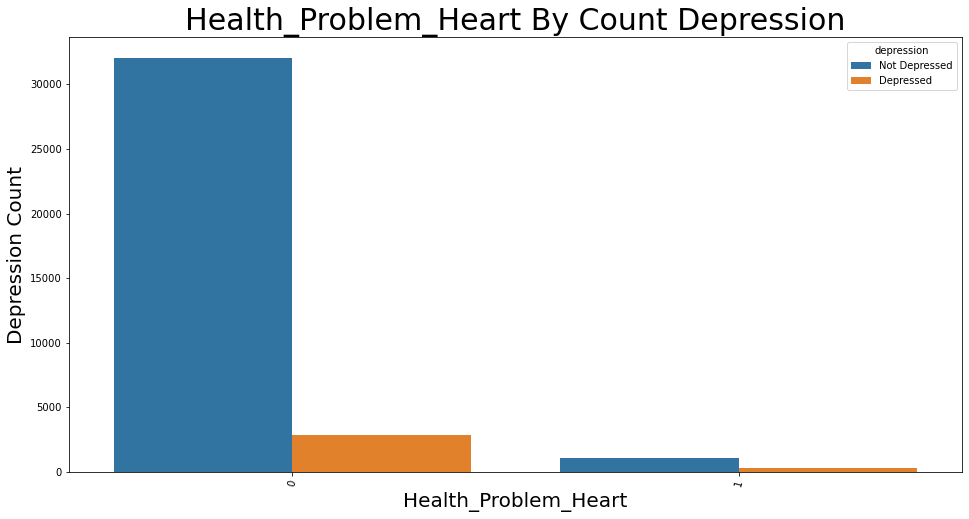

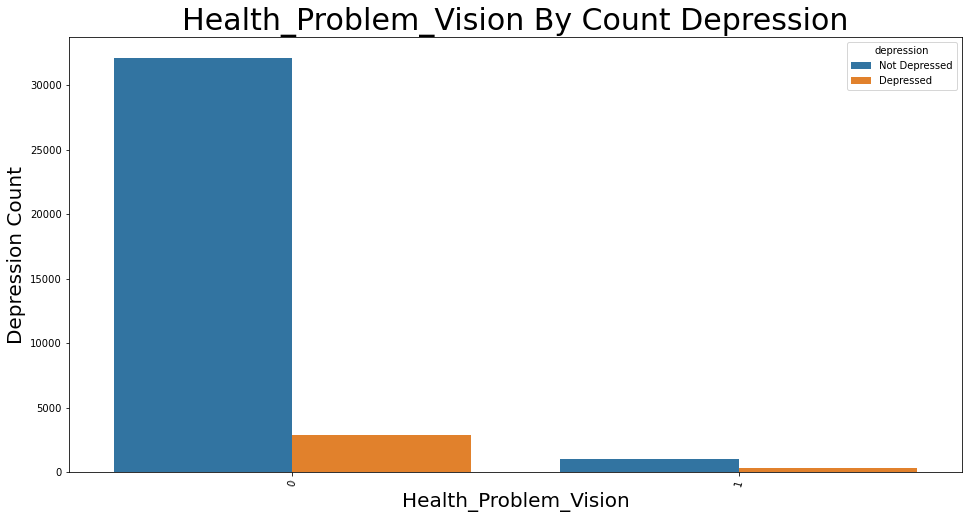

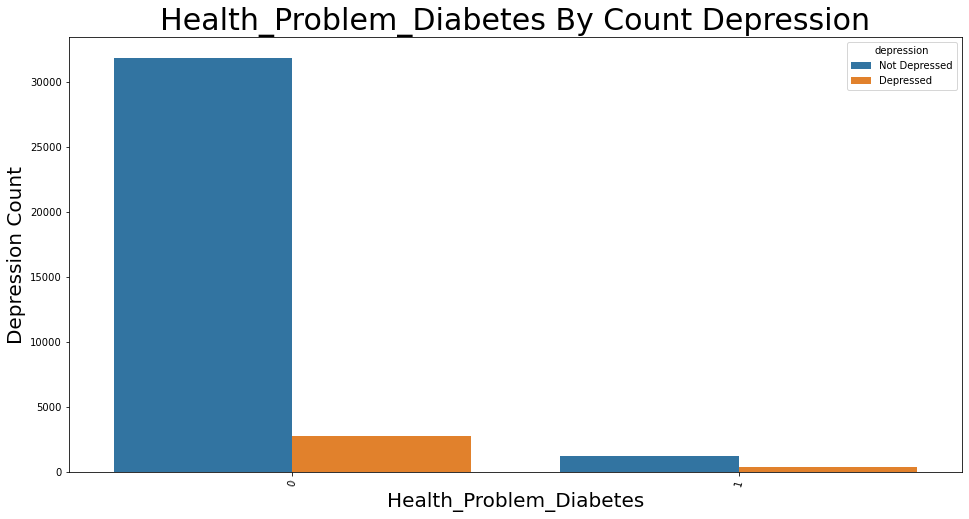

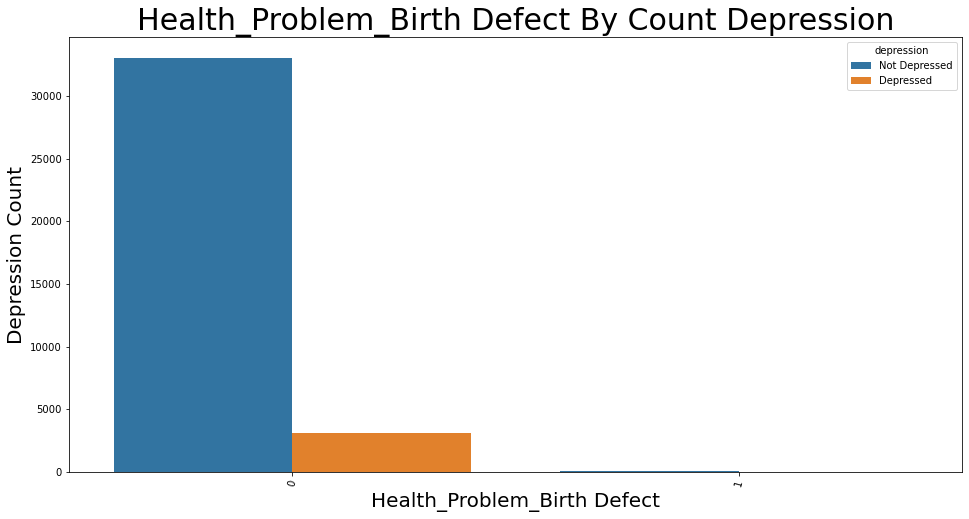

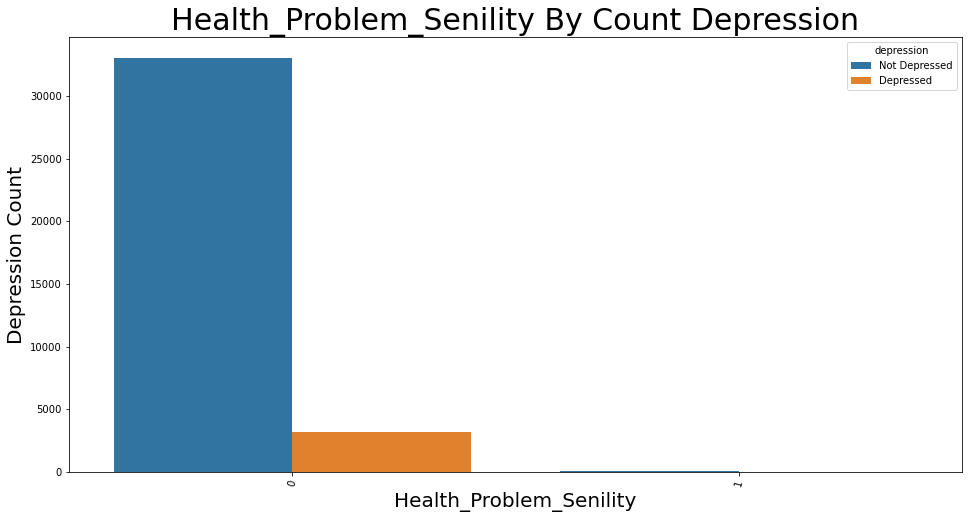

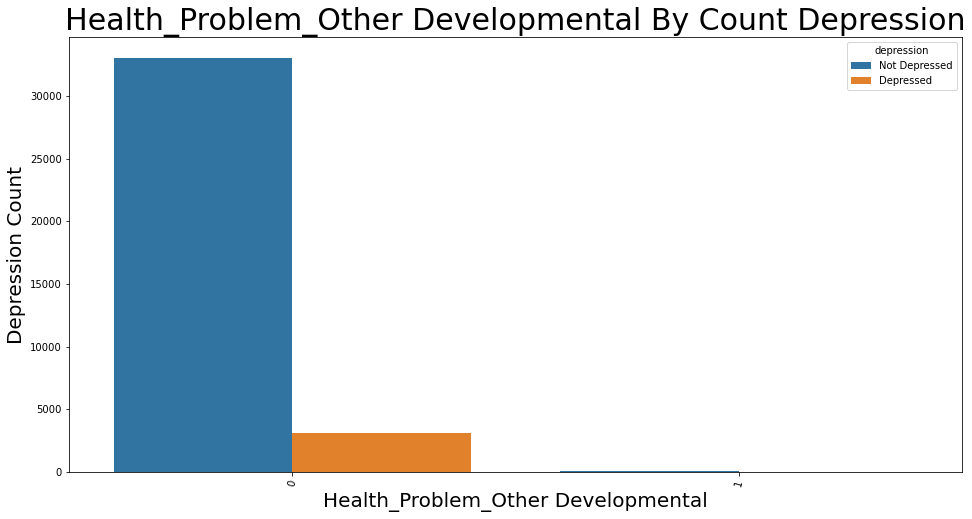

In [41]:
# Plotting the columns
for col in function_cat_cols:
    plotting_counts(df_data_1, col)

## Alcohol Consumption

In [42]:
# Listing the columns
alcohol_num_cols = ['drinks_per_occasion', 'drinks_past_year']

(<Figure size 1152x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Lifetime_Alcohol_Consumption By Count Depression'}, xlabel='Lifetime_Alcohol_Consumption', ylabel='Depression Count'>)

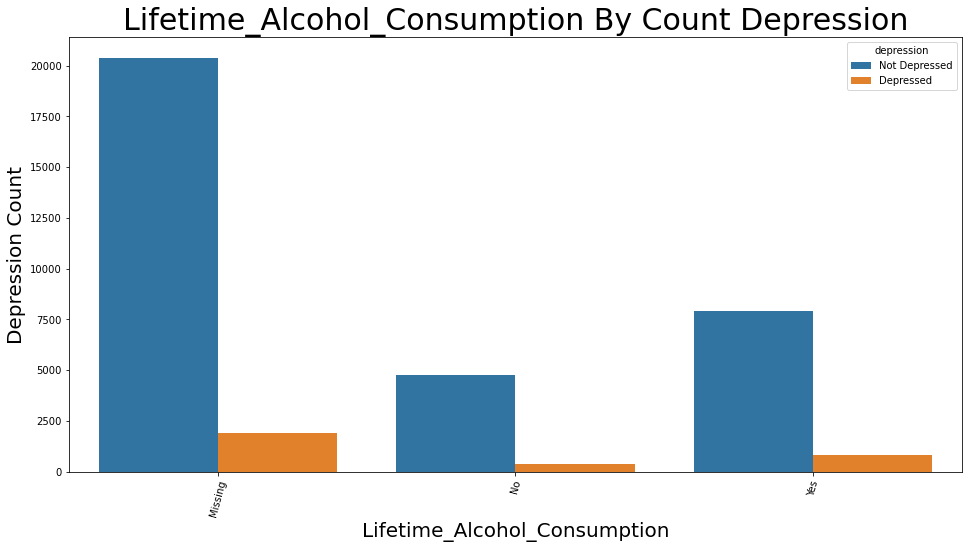

In [43]:
# Plotting the column
plotting_counts(df_data_1, 'lifetime_alcohol_consumption')

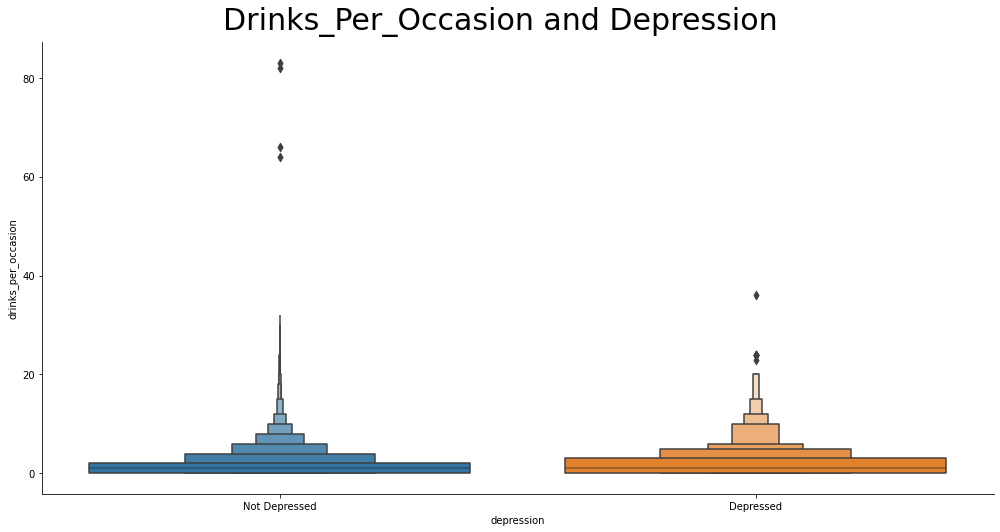

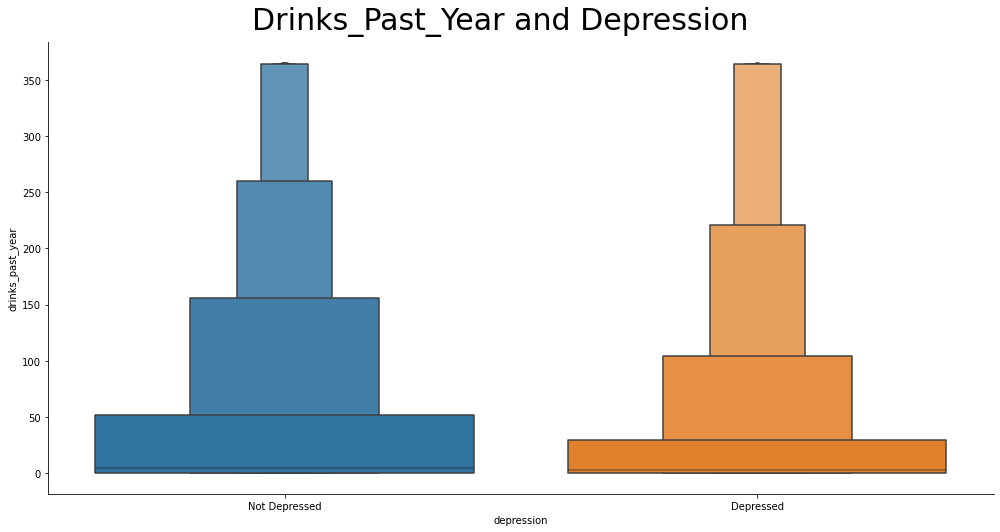

In [44]:
# Plotting the columns
for col in alcohol_num_cols:
    plot_num_cols(df_data_1, col)

## Smoking

In [45]:
# Creating separate lists for the category and number columns
smoking_cat_cols = ['current_smoker', 'household_smokers']

smoking_num_cols = ['start_smoking_age', 'previous_cigarettes_per_day',
                   'current_cigarettes_per_day', 'days_quit_smoking']


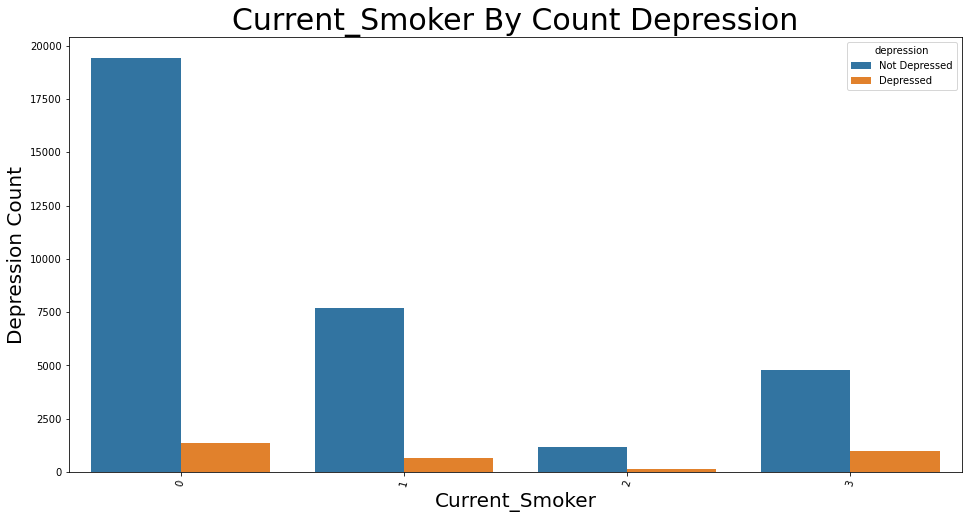

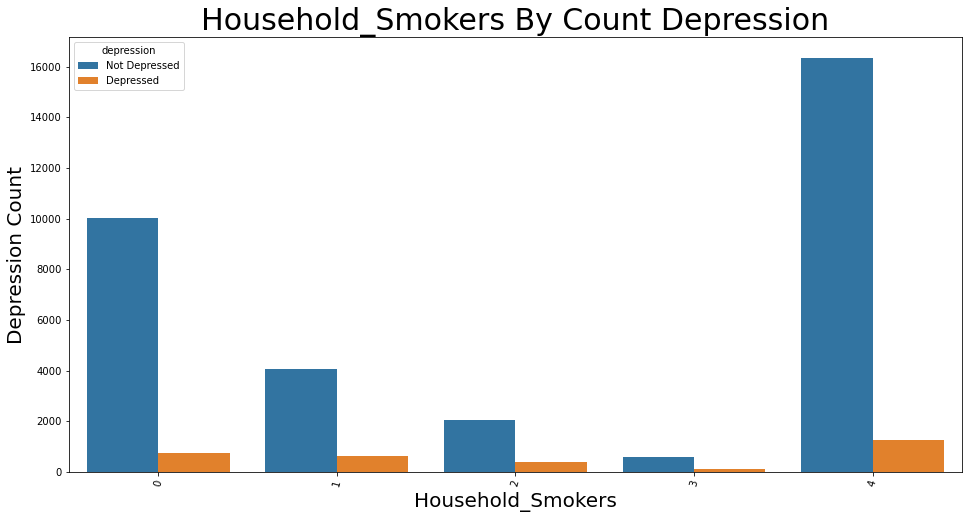

In [46]:
# Plotting the columns
for col in smoking_cat_cols:
    plotting_counts(df_data_1, col)

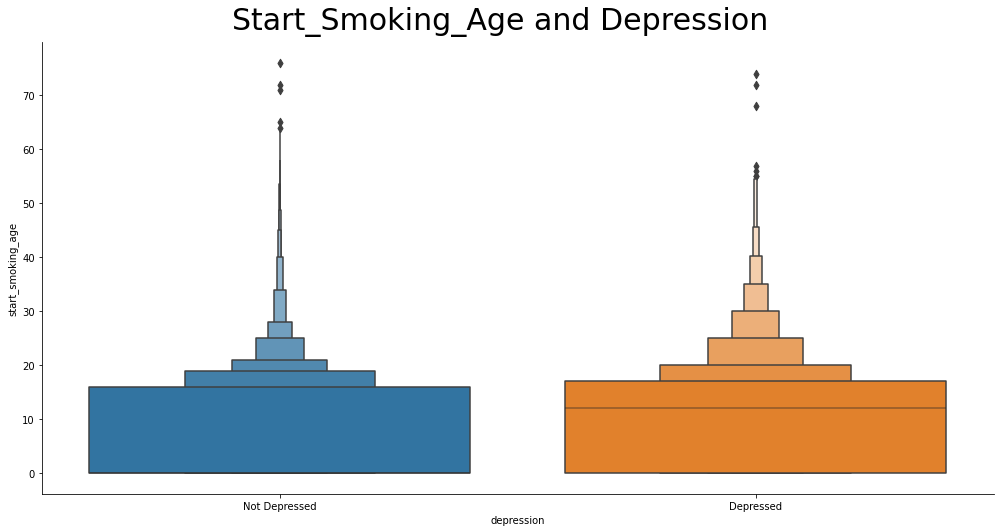

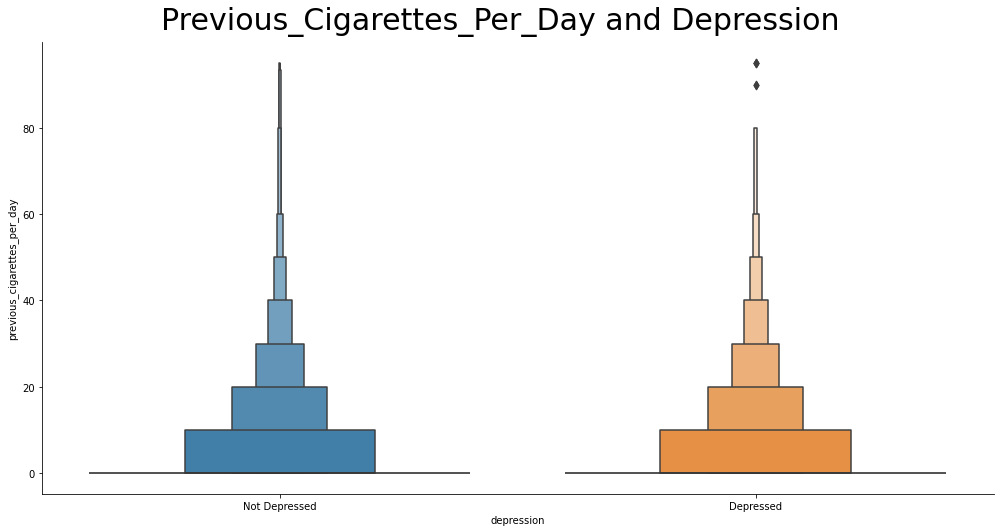

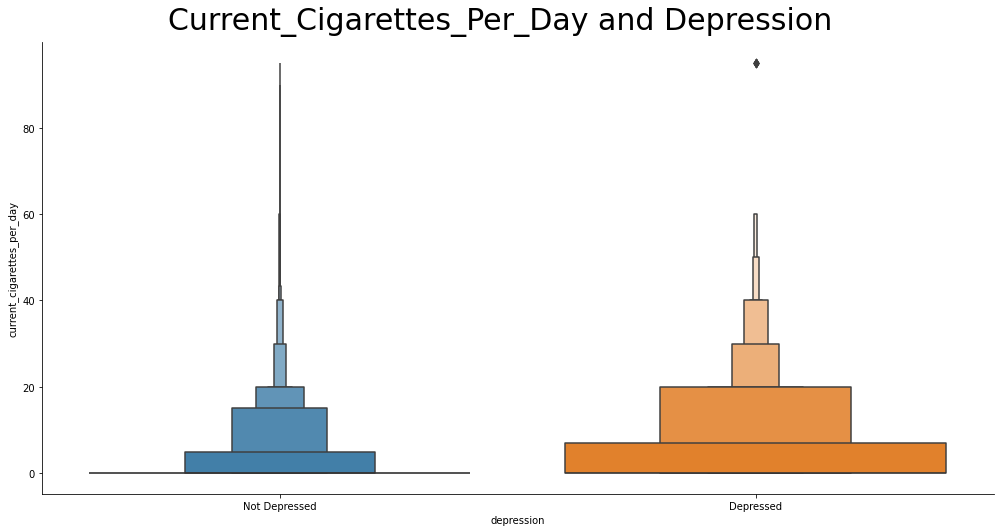

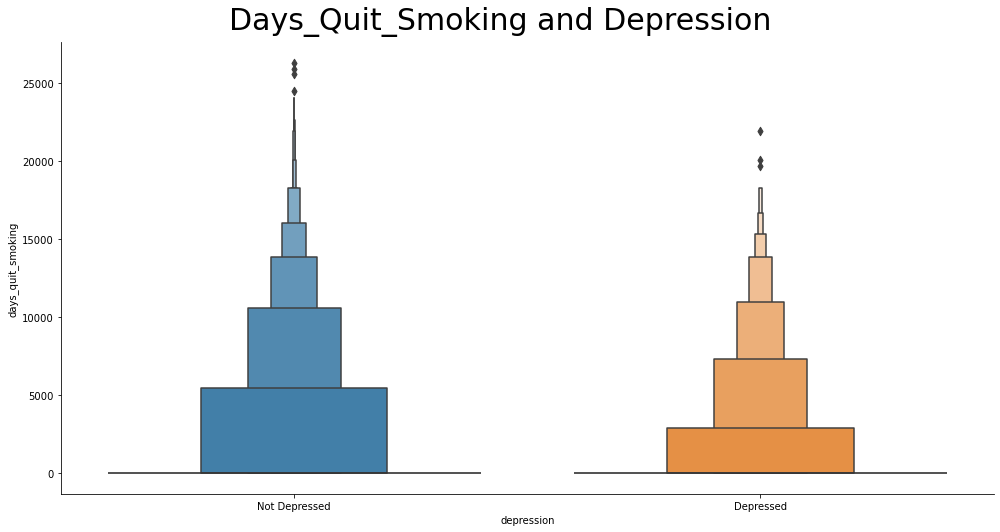

In [47]:
# Plotting the columns
for col in smoking_num_cols:
    plot_num_cols(df_data_1, col)

## Rectreational Drug Use

In [48]:
# Creating separate lists for the category and number columns
drug_cat_cols = ['marijuana_use', 'cocaine_use', 'heroine_use', 'meth_use', 
               'inject_drugs', 'rehab_program']

drug_num_cols = ['marijuana_per_month', 'cocaine_number_uses', 
                'cocaine_per_month', 'heronine_per_month', 'meth_number_uses', 
                'meth_per_month']

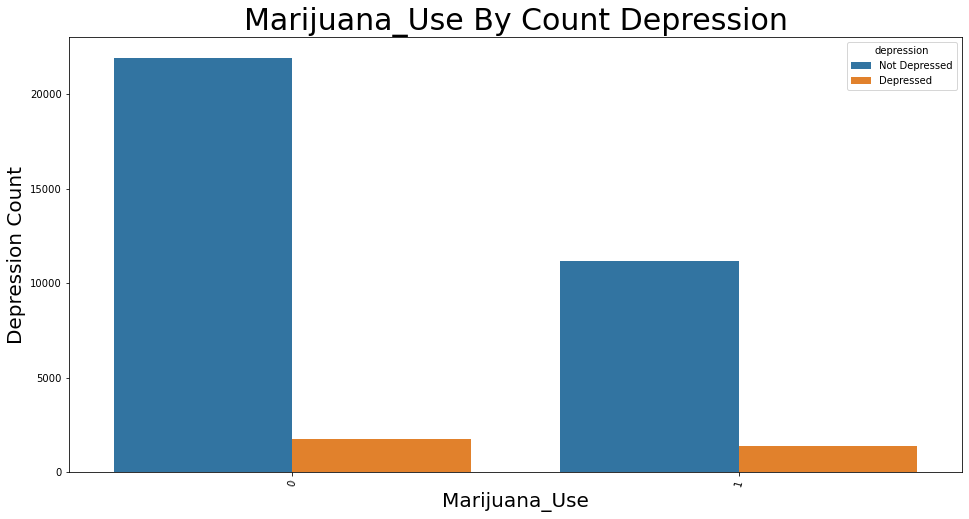

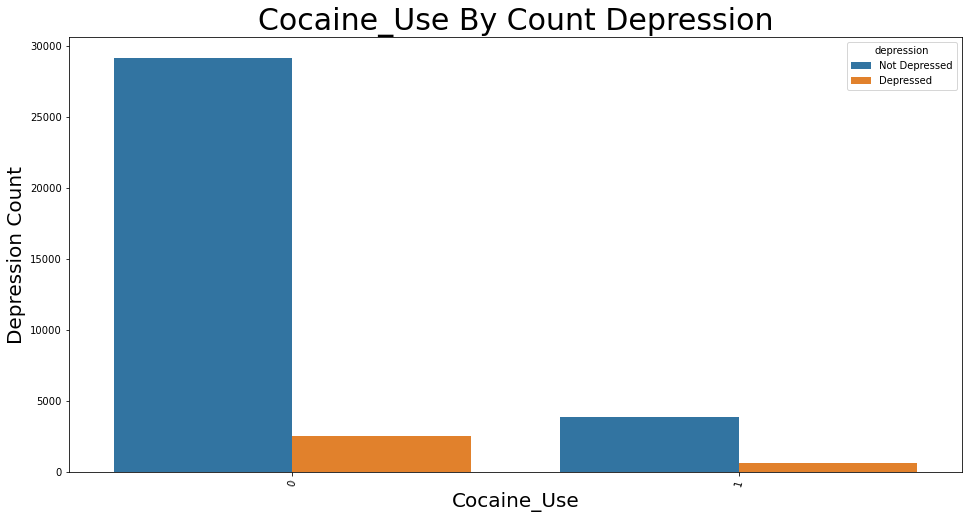

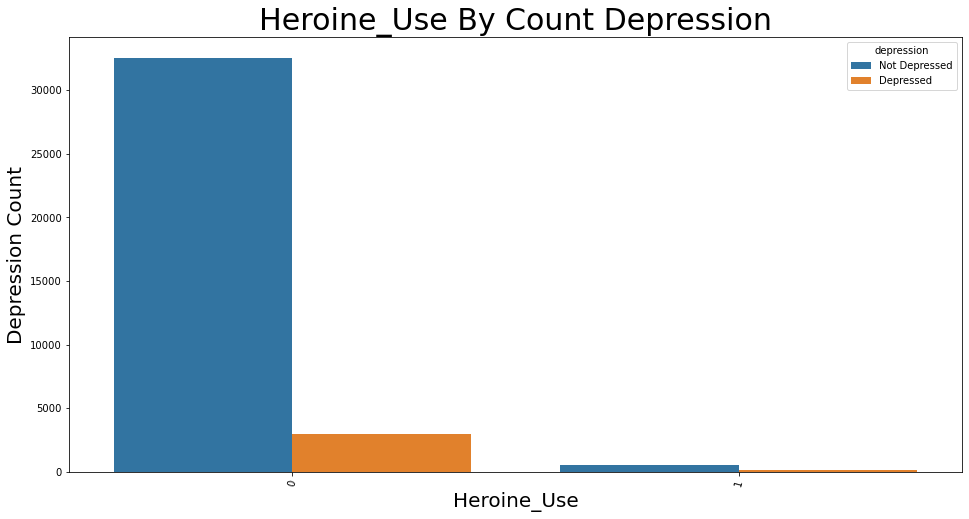

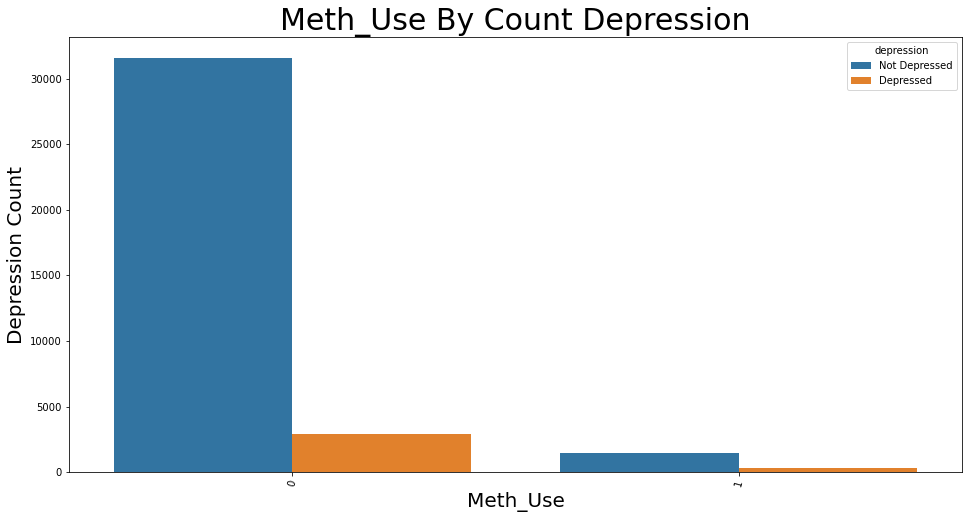

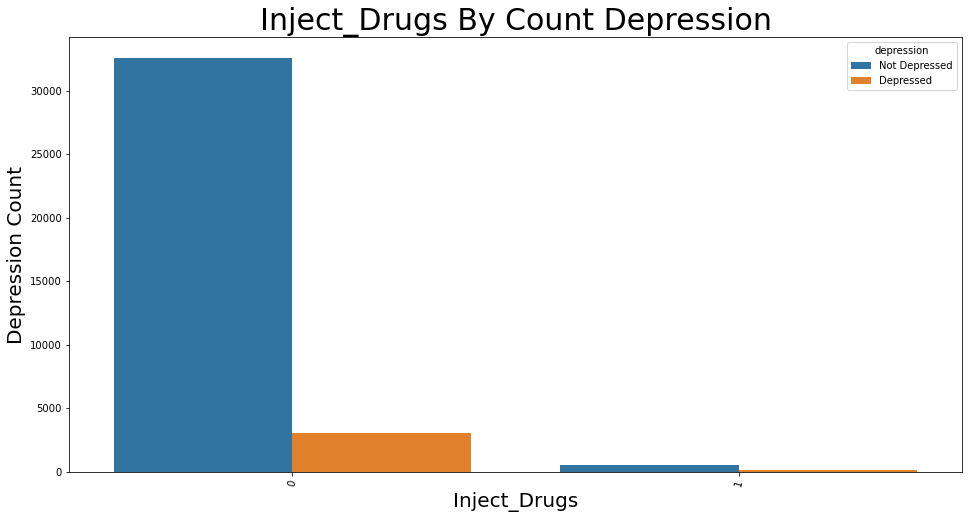

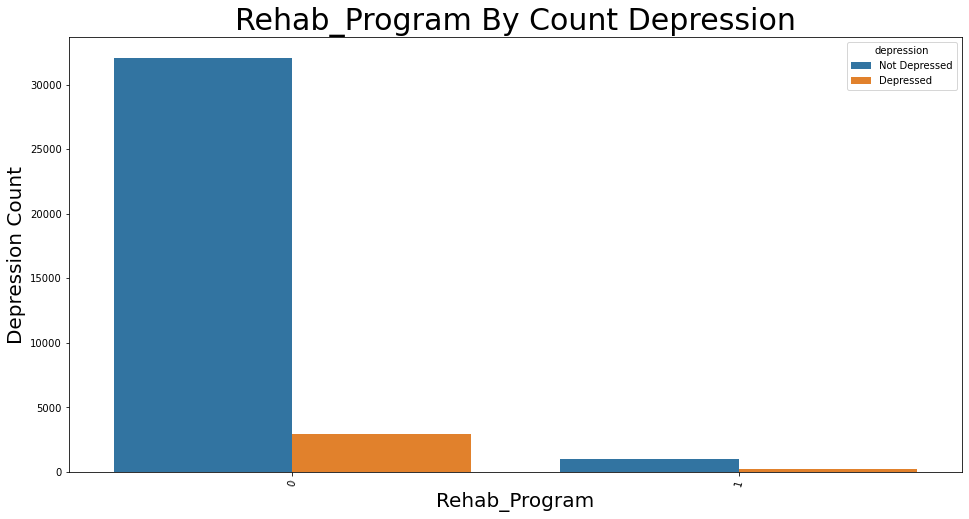

In [49]:
# Plotting the columns
for col in drug_cat_cols:
    plotting_counts(df_data_1, col)

## Prescribed Medication

In [50]:
# Listing the columns to use
scripts_cat_cols = ['prescriptions_count', 'Rx_LISINOPRIL', 'Rx_METFORMIN', 
                    'Rx_ALBUTEROL', 'Rx_LEVOTHYROXINE', 'Rx_SIMVASTATIN', 
                    'Rx_METOPROLOL', 'Rx_ATORVASTATIN', 'Rx_AMLODIPINE']
scripts_num_cols = ['Rx_days_LISINOPRIL', 'Rx_days_METFORMIN', 
                    'Rx_days_ALBUTEROL', 'Rx_days_LEVOTHYROXINE', 
                    'Rx_days_SIMVASTATIN', 'Rx_days_METOPROLOL', 
                    'Rx_days_ATORVASTATIN', 'Rx_days_AMLODIPINE']

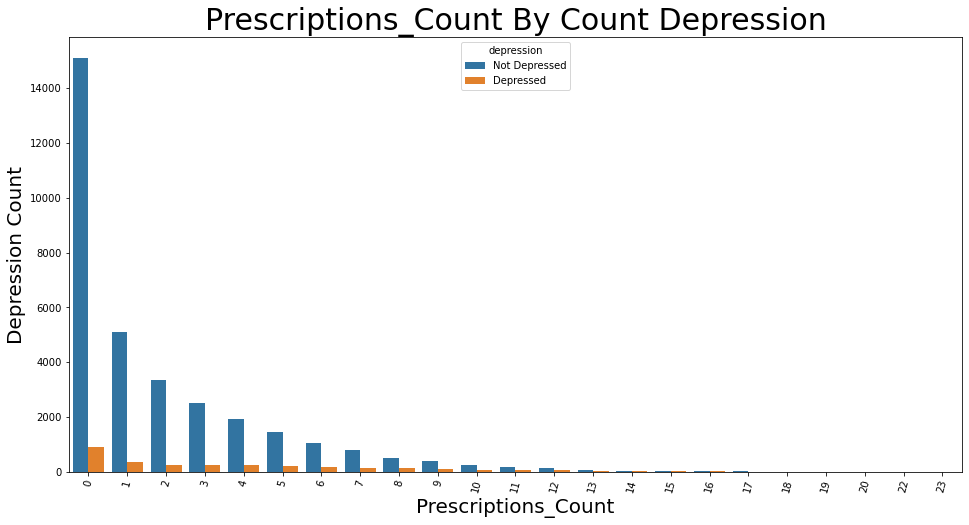

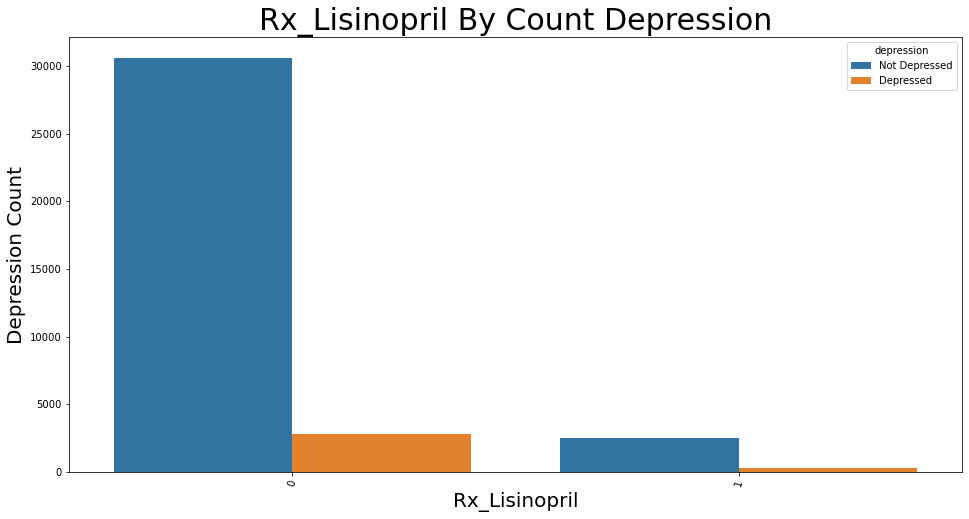

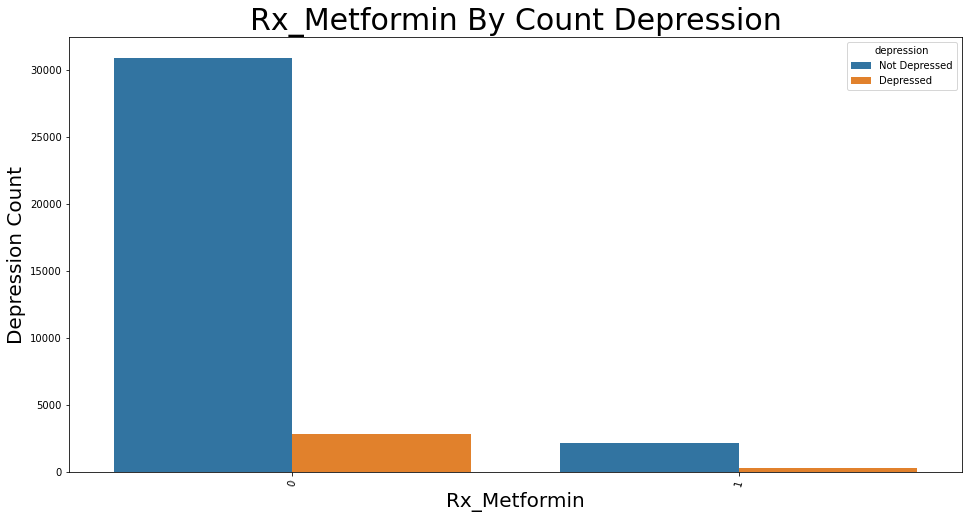

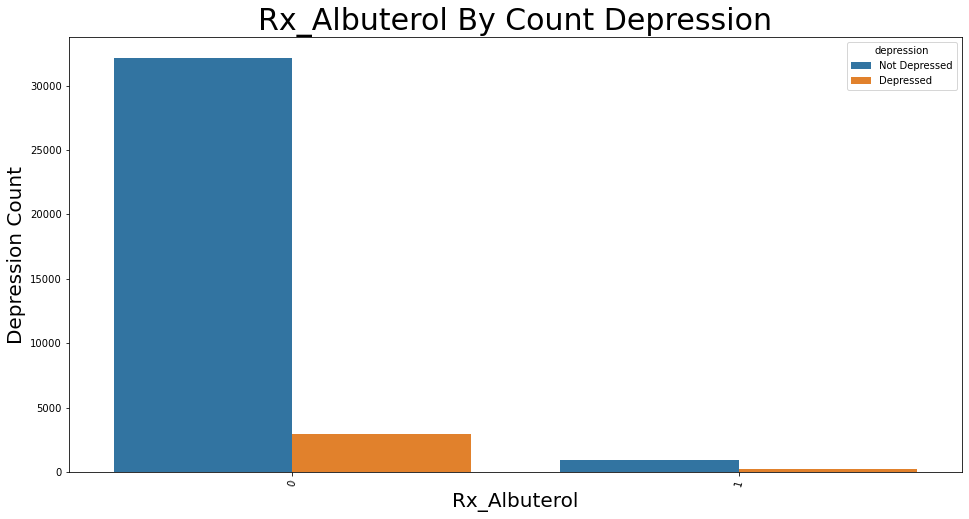

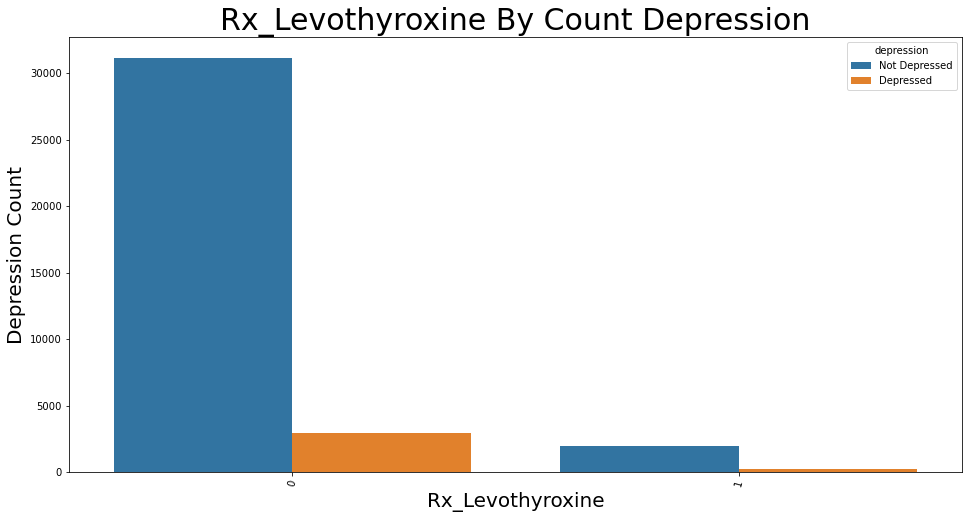

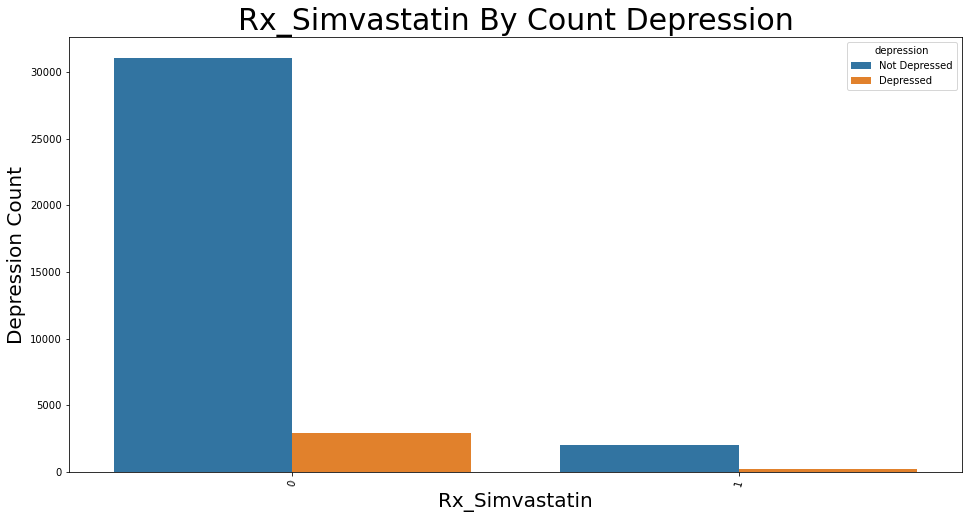

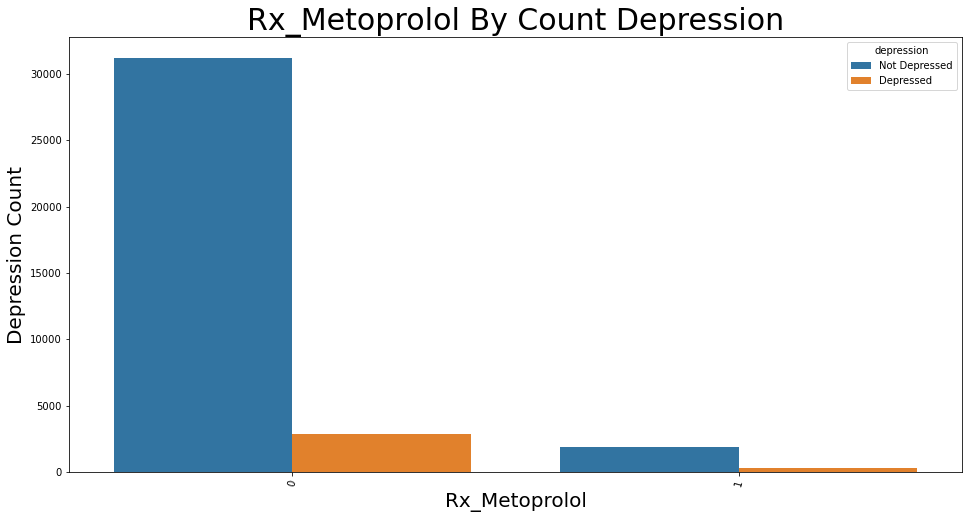

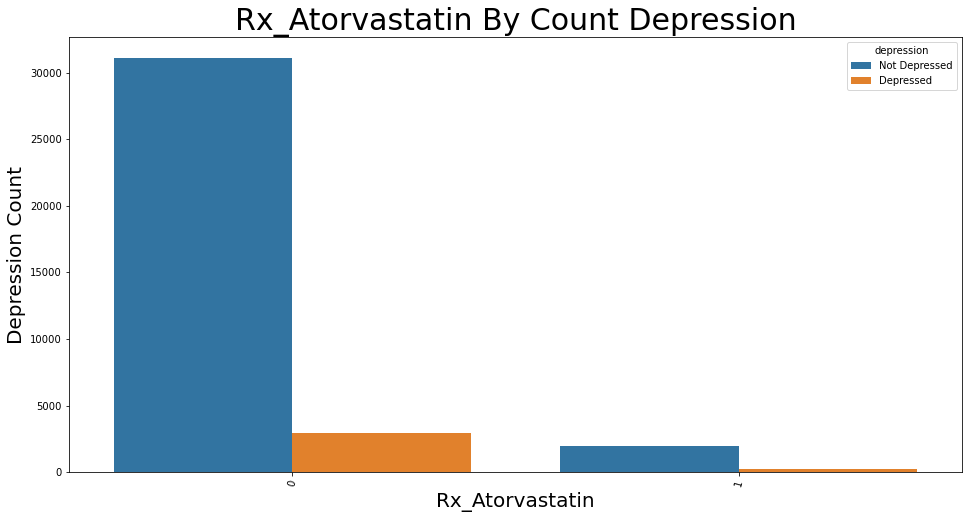

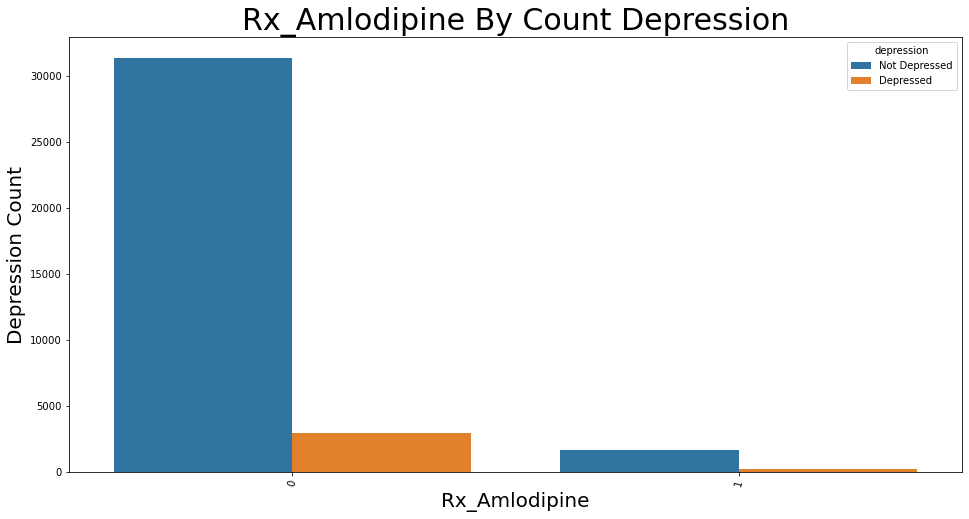

In [51]:
# Plotting the columns
for col in scripts_cat_cols:
    plotting_counts(df_data_1, col)

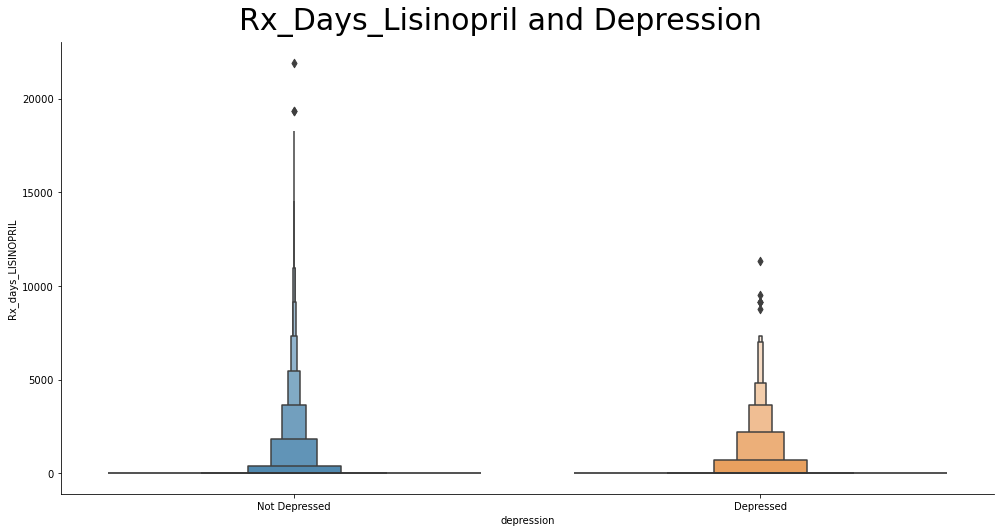

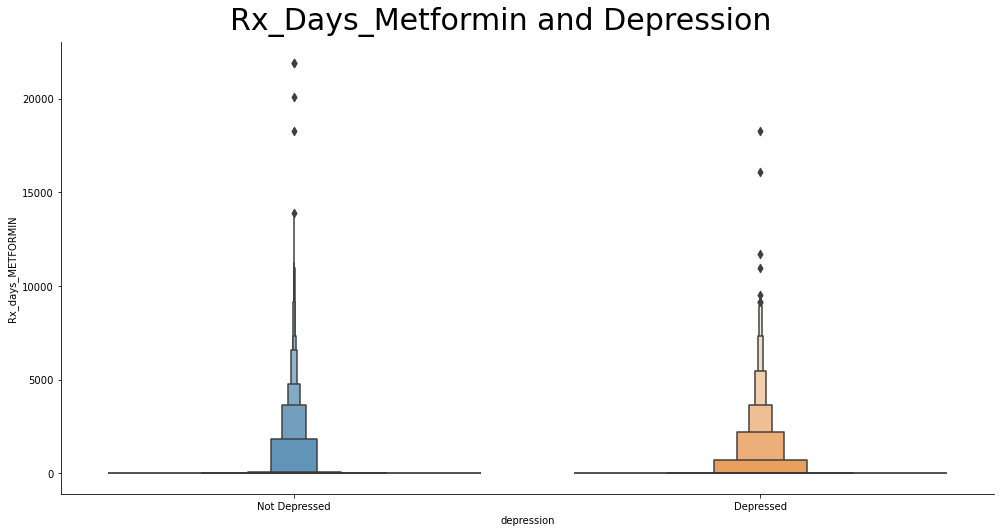

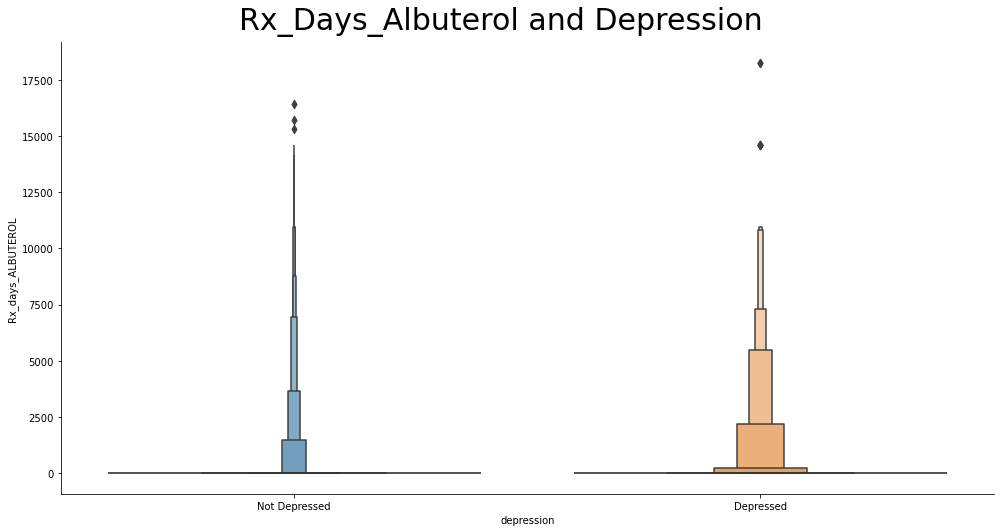

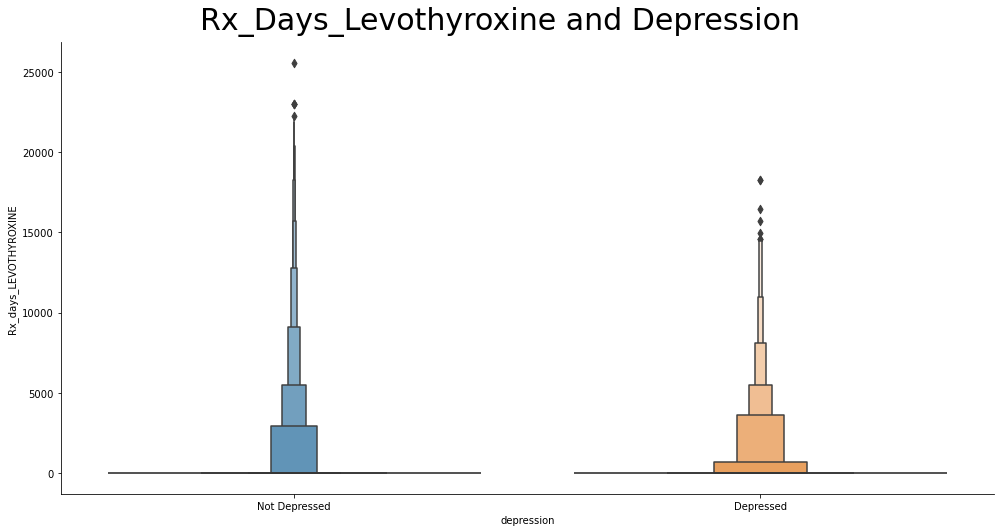

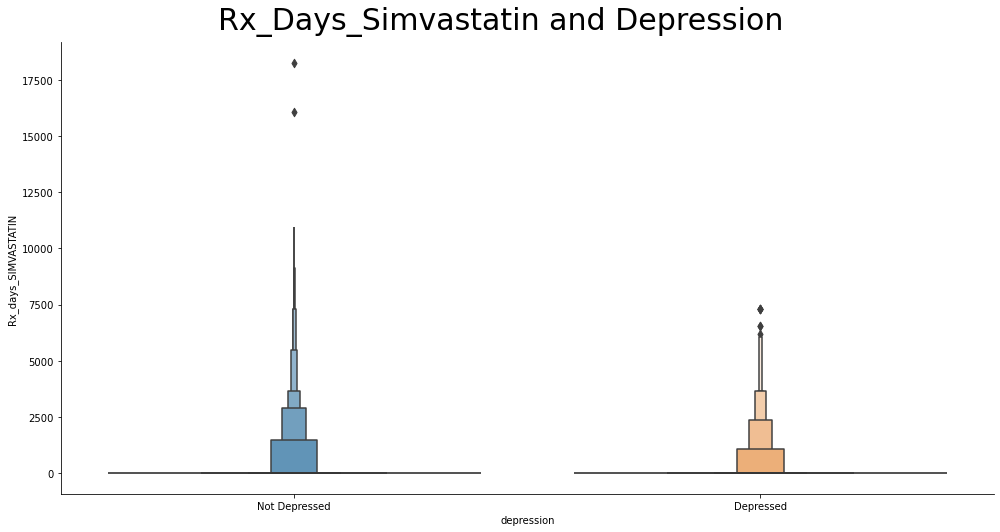

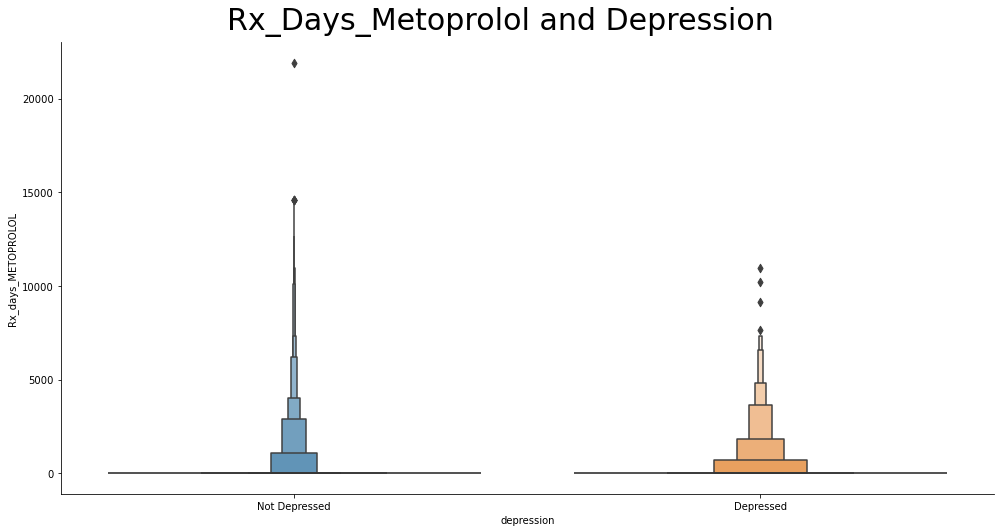

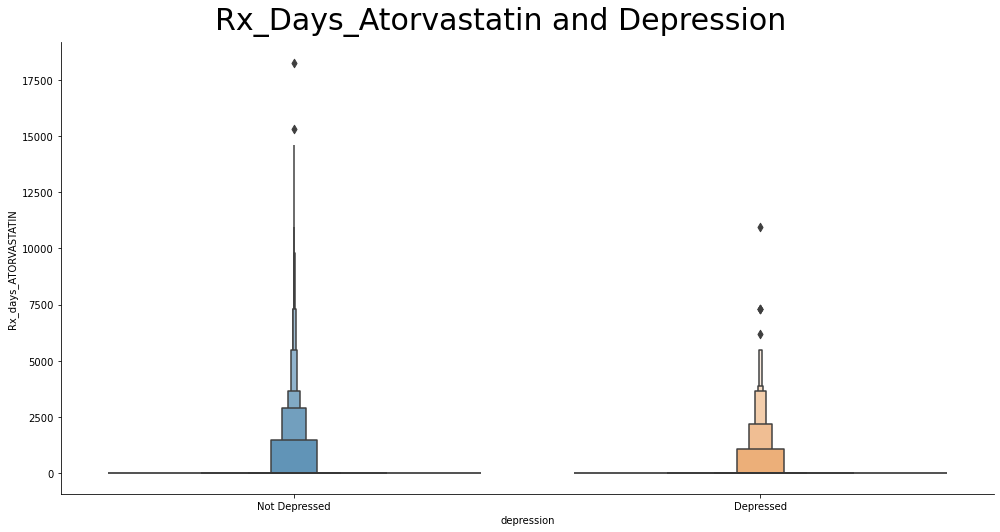

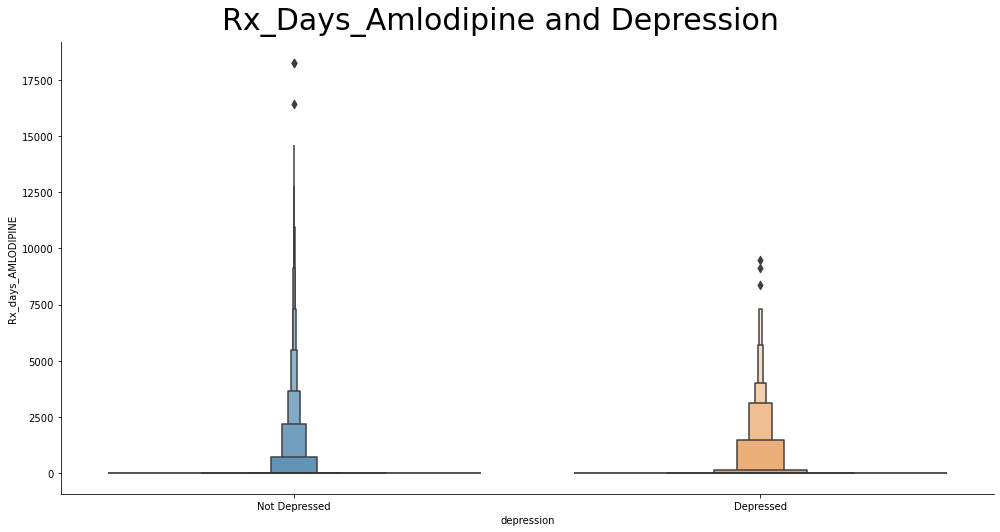

In [52]:
# Plotting the columns
for col in scripts_num_cols:
    plot_num_cols(df_data_1, col)

# Preprocessing

## converting "Missing" to mode/ median
##### checking unique, mode and median of columns with missing records and converting them

In [53]:
#checking the objective columns
{column: list(df_data_1[column].unique()) for column in df_data_1.select_dtypes('object').columns}

{'depression': ['Not Depressed', 'Depressed'],
 'race': ['Black',
  'White',
  'Other Hispanic',
  'Mexican',
  'Other and Multiracial'],
 'citizenship': ['Citizen', 'Not Citizen', 'Missing'],
 'marital_status': ['Married',
  'Never Married',
  'Widowed',
  'Divorced',
  'Separated',
  'Partner',
  'Missing'],
 'pregnant': ['No', 'Missing', 'Yes'],
 'birth_place': ['USA',
  'Mexico',
  'Elsewhere',
  'Other Spanish Country',
  'Other Non Spanish Country',
  'Missing'],
 'veteran': ['No', 'Yes', 'Missing'],
 'first_cancer_type': ['None',
  'Colon',
  'Other',
  'Breast',
  'Liver',
  'Bladder',
  'Lung',
  'Melanoma',
  'Skin Other',
  'Mouth',
  'Skin Non Melanoma',
  'Prostate',
  'Cervical',
  'Thyroid',
  'Lymphoma',
  'Uterine',
  'Brain',
  'Stomach',
  'Rectal',
  'Testicular',
  'Kidney',
  'Esophageal',
  'Larynx',
  'Ovarian',
  'Blood',
  'Bone',
  'Leukemia',
  'Gallbladder',
  'Pancreatic',
  'Soft Tissue',
  'Nervous System'],
 'second_cancer_type': ['None',
  'Bone',
  'O

In [54]:
#list of columns with "Missing" records
#citizenship,
#pregnant,
#birth_place,
#veteran,
#arthritis_type,
#full_time_work,
#work_type,
#out_of_work,
#vigorous_recreation
#moderate_recreation
#lifetime_alcohol_consumption

##### citizenship

In [55]:
df_data_1['citizenship'].unique()

array(['Citizen', 'Not Citizen', 'Missing'], dtype=object)

In [56]:
df_data_1['citizenship'].value_counts()

Citizen        31238
Not Citizen     4952
Missing           69
Name: citizenship, dtype: int64

In [57]:
#median()
df = [31238, 4952, 69]
median(df)

4952

In [58]:
#df['column name'] = df['column name'].replace(['old value'],'new value')
df_data_1['citizenship'] = df_data_1['citizenship'].replace(['Missing'], 'Not Citizen')

##### pregnant

In [59]:
df_data_1['pregnant'].unique()

array(['No', 'Missing', 'Yes'], dtype=object)

In [60]:
df_data_1['pregnant'].value_counts()

Missing    28366
No          7237
Yes          656
Name: pregnant, dtype: int64

In [61]:
#median()
df = [28366, 7237, 656]
median(df)

7237

In [62]:
df_data_1['pregnant'] = df_data_1['pregnant'].replace(['Missing'], 'No')

##### birth_place

In [63]:
df_data_1['birth_place'].unique()

array(['USA', 'Mexico', 'Elsewhere', 'Other Spanish Country',
       'Other Non Spanish Country', 'Missing'], dtype=object)

In [64]:
df_data_1['birth_place'].value_counts()

USA                          26624
Mexico                        7704
Other Spanish Country          865
Other Non Spanish Country      690
Elsewhere                      362
Missing                         14
Name: birth_place, dtype: int64

In [65]:
#median()
df = [26624, 7704, 865, 690, 362, 14]
median(df)

777.5

In [66]:
df_data_1['birth_place'] = df_data_1['birth_place'].replace(['Missing'], 'USA')

##### veteran

In [67]:
df_data_1['veteran'].unique()

array(['No', 'Yes', 'Missing'], dtype=object)

In [68]:
df_data_1['veteran'].value_counts()

No         32325
Yes         3929
Missing        5
Name: veteran, dtype: int64

In [69]:
#median()
df = [32325, 3929, 5]
median(df)

3929

In [70]:
df_data_1['veteran'] = df_data_1['veteran'].replace(['Missing'], 'No')

In [71]:
##### arthritis_type

In [72]:
df_data_1['arthritis_type'].unique()

array(['Missing', 'Osteoarthritis', 'Other', 'Rheumatoid', 'Psoriatic'],
      dtype=object)

In [73]:
df_data_1['arthritis_type'].value_counts()

Missing           29748
Osteoarthritis     3576
Rheumatoid         1797
Other              1057
Psoriatic            81
Name: arthritis_type, dtype: int64

In [74]:
#median()
df = [29748, 3576, 1797, 1057, 81]
median(df)

1797

In [75]:
df_data_1['arthritis_type'] = df_data_1['arthritis_type'].replace(['Missing'], 'None')

##### full_time_work

In [76]:
df_data_1['full_time_work'].unique()

array(['Missing', 'No', 'Yes'], dtype=object)

In [77]:
df_data_1['full_time_work'].value_counts()

Missing    30492
No          3722
Yes         2045
Name: full_time_work, dtype: int64

In [78]:
#median()
df = [30492, 3722, 2045]
median(df)

3722

##### work_type

In [79]:
df_data_1['work_type'].unique()

array(['Private Wage Worker', 'Missing', 'Government', 'Family Business',
       'Self Employed'], dtype=object)

In [80]:
df_data_1['work_type'].value_counts()

Missing                16284
Private Wage Worker    14961
Government              2948
Self Employed           1979
Family Business           87
Name: work_type, dtype: int64

In [81]:
#median()
df = [16284, 14961, 2948, 1979, 87]
median(df)

2948

In [82]:
df_data_1['work_type'] = df_data_1['work_type'].replace(['Missing'], 'None')

##### out_of_work

In [83]:
df_data_1['out_of_work'].unique()

array(['Missing', 'Retired', 'Disabled', 'Home Caretaker', 'School',
       'Health', 'Other', 'Layoff'], dtype=object)

In [84]:
df_data_1['out_of_work'].value_counts()

Missing           21461
Retired            6687
Home Caretaker     2366
Disabled           1954
Health             1195
School             1104
Other              1084
Layoff              408
Name: out_of_work, dtype: int64

In [85]:
#median()
df = [21461, 6687, 2366, 1954, 1195, 1104, 1084, 408]
median(df)

1574.5

In [86]:
#mode()
df_data_1['out_of_work'].mode()

0    Missing
dtype: object

In [87]:
df_data_1['out_of_work'] = df_data_1['out_of_work'].replace(['Missing'], 'None')

##### vigorous_recreation

In [88]:
df_data_1['vigorous_recreation'].unique()

array(['No', 'Yes', 'Missing'], dtype=object)

In [89]:
df_data_1['vigorous_recreation'].value_counts()

No         27318
Yes         8938
Missing        3
Name: vigorous_recreation, dtype: int64

In [90]:
#median()
df = [27318, 8938, 3]
median(df)

8938

In [91]:
df_data_1['vigorous_recreation'] = df_data_1['vigorous_recreation'].replace(['Missing'], 'No')

##### moderate_recreation

In [92]:
df_data_1['moderate_recreation'].unique()

array(['No', 'Yes', 'Missing'], dtype=object)

In [93]:
df_data_1['moderate_recreation'].value_counts()

No         20917
Yes        15336
Missing        6
Name: moderate_recreation, dtype: int64

In [94]:
#median()
df = [20917, 15336, 6]
median(df)

15336

In [95]:
df_data_1['moderate_recreation'] = df_data_1['moderate_recreation'].replace(['Missing'], 'No')

##### lifetime_alcohol_consumption

In [96]:
df_data_1['lifetime_alcohol_consumption'].unique()

array(['Yes', 'Missing', 'No'], dtype=object)

In [97]:
df_data_1['lifetime_alcohol_consumption'].value_counts()

Missing    22323
Yes         8748
No          5188
Name: lifetime_alcohol_consumption, dtype: int64

In [98]:
#median()
df = [22323, 8748, 5188]
median(df)

8748

In [99]:
df_data_1['lifetime_alcohol_consumption'] = df_data_1['lifetime_alcohol_consumption'].replace(['Missing'], 'Yes')

In [100]:
df_data_1['prescriptions_count'].unique()

array([ 2,  4,  5,  0,  1,  9,  7,  3,  6, 10,  8, 11, 14, 13, 12, 15, 17,
       16, 20, 18, 19, 23, 22], dtype=int64)

# Correlation 
#####  Removing one of the two highly correlated feature

In [101]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(corr_matrix.iloc[i,j])> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [102]:
x = df_data_1.drop(['depression'], axis=1)
y = pd.DataFrame(df_data_1,columns=['depression'])

In [103]:
corr_features = correlation(x, 0.8)
len(set(corr_features))

34

In [104]:
df_data_1=x.drop(corr_features, axis=1)

In [105]:
pd.set_option('display.max_columns', 0)
df_data_1

SEQN  gender  ...  Rx_METHOCARBAMOL Rx_days_METHOCARBAMOL
0       31131       1  ...                 0                     0
1       31132       0  ...                 0                     0
2       31134       0  ...                 0                     0
3       31139       1  ...                 0                     0
4       31143       0  ...                 0                     0
...       ...     ...  ...               ...                   ...
36254  102949       0  ...                 0                     0
36255  102952       1  ...                 0                     0
36256  102953       0  ...                 0                     0
36257  102954       1  ...                 0                     0
36258  102956       0  ...                 0                     0

[36259 rows x 457 columns]

## Columns to drop

In [106]:
# since there were huge no. of prescrpition coluns yet they were not impacting much.
df_data_1=df_data_1.drop(labels= ['SEQN', 'Rx_days_LANSOPRAZOLE','Rx_days_MELOXICAM','Rx_days_METHYLPHENIDATE','Rx_days_GLIMEPIRIDE','Rx_days_ENALAPRIL','Rx_days_PIOGLITAZONE','Rx_days_HYDROCHLOROTHIAZIDE','Rx_days_GLYBURIDE','Rx_days_FLUTICASONE','Rx_days_NIFEDIPINE','Rx_days_SPIRONOLACTONE','Rx_days_LORAZEPAM','Rx_days_FINASTERIDE','Rx_days_EZETIMIBE','Rx_days_INSULIN ASPART','Rx_days_AZITHROMYCIN','Rx_days_CELECOXIB','Rx_days_FAMOTIDINE','Rx_days_TERAZOSIN','Rx_days_BENAZEPRIL','Rx_days_HYDROXYZINE','Rx_days_SITAGLIPTIN','Rx_days_NITROGLYCERIN','Rx_days_DOXAZOSIN','Rx_days_TIOTROPIUM','Rx_days_ISOSORBIDE MONONITRATE','Rx_days_HYDROCHLOROTHIAZIDE','Rx_days_HYDRALAZINE','Rx_days_LATANOPROST OPHTHALMIC','Rx_days_DICLOFENAC','Rx_days_OLMESARTAN','Rx_days_SULFAMETHOXAZOLE; TRIMETHOPRIM','Rx_days_CEPHALEXIN','Rx_days_GEMFIBROZIL','Rx_days_INSULIN LISPRO','Rx_days_PREGABALIN','Rx_days_BECLOMETHASONE','Rx_days_BUDESONIDE','Rx_days_QUINAPRIL','Rx_days_INSULIN DETEMIR','Rx_days_MECLIZINE','Rx_days_LISDEXAMFETAMINE','Rx_days_POLYETHYLENE GLYCOL 3350','Rx_days_METOCLOPRAMIDE', 'Rx_days_LEVALBUTEROL', 'Rx_days_METHOTREXATE','Rx_days_LEVETIRACETAM','Rx_days_PROMETHAZINE','Rx_days_IRBESARTAN','Rx_days_ONDANSETRON','Rx_days_HYDROCHLOROTHIAZIDE','Rx_days_DOCUSATE','Rx_days_CIPROFLOXACIN','Rx_days_PHENYTOIN','Rx_days_HYDROXYCHLOROQUINE','Rx_days_RISEDRONATE','Rx_days_TIMOLOL OPHTHALMIC','Rx_days_BRIMONIDINE OPHTHALMIC','Rx_days_ROPINIROLE','Rx_days_CEFDINIR','Rx_days_COLCHICINE','Rx_days_TRIAMCINOLONE TOPICAL','Rx_days_GLYBURIDE','Rx_days_RALOXIFENE','Rx_days_RABEPRAZOLE','Rx_days_ACYCLOVIR','Rx_days_PREDNISOLONE','Rx_days_TOLTERODINE','Rx_days_ISOSORBIDE','Rx_days_PENICILLIN','Rx_days_INSULIN REGULAR','Rx_days_MEMANTINE','Rx_days_MINOCYCLINE','Rx_days_DIPHENHYDRAMINE', 'Rx_days_METHOCARBAMOL','Rx_days_NIACIN','heronine_per_month','meth_per_month','Rx_days_CLOPIDOGREL','Rx_days_ESOMEPRAZOLE','Rx_days_INSULIN GLARGINE','Rx_days_FLUTICASONE NASAL','Rx_days_TAMSULOSIN','Rx_days_CETIRIZINE','Rx_days_NAPROXEN','Rx_days_PREDNISONE','Rx_days_TRAMADOL','Rx_days_VALSARTAN','Rx_days_DILTIAZEM','Rx_days_ASPIRIN','Rx_days_CLONIDINE','Rx_DROSPIRENONE; ETHINYL ESTRADIOL','Rx_days_DROSPIRENONE; ETHINYL ESTRADIOL','Rx_ACETAMINOPHEN; PROPOXYPHENE','Rx_days_ACETAMINOPHEN; PROPOXYPHENE','Rx_PENICILLIN','Rx_INSULIN REGULAR','Rx_MEMANTINE','Rx_DIPHENHYDRAMINE','Rx_MINOCYCLINE','Rx_METHOCARBAMOL','Rx_RABEPRAZOLE','Rx_NITROFURANTOIN','Rx_days_NITROFURANTOIN','Rx_TRIAMTERENE','Rx_days_TRIAMTERENE','Rx_TOLTERODINE','Rx_SUMATRIPTAN','Rx_days_SUMATRIPTAN','Rx_PREDNISOLONE','Rx_ISOSORBIDE','Rx_ROPINIROLE','Rx_CEFDINIR','Rx_INSULIN ISOPHANE; INSULIN REGULAR','Rx_days_INSULIN ISOPHANE; INSULIN REGULAR','Rx_GLYBURIDE; METFORMIN','Rx_days_GLYBURIDE; METFORMIN','Rx_TRIAMCINOLONE TOPICAL','Rx_COLCHICINE','Rx_ACYCLOVIR','Rx_RALOXIFENE','Rx_DIAZEPAM','Rx_days_DIAZEPAM','Rx_ACETAMINOPHEN; CODEINE','Rx_days_ACETAMINOPHEN; CODEINE','Rx_ETHINYL ESTRADIOL; LEVONORGESTREL','Rx_days_ETHINYL ESTRADIOL; LEVONORGESTREL','Rx_QUINAPRIL','Rx_INSULIN DETEMIR','Rx_BUDESONIDE; FORMOTEROL','Rx_days_BUDESONIDE; FORMOTEROL','Rx_MECLIZINE','Rx_POLYETHYLENE GLYCOL 3350','Rx_BACLOFEN','Rx_days_BACLOFEN','Rx_LISDEXAMFETAMINE','Rx_METOCLOPRAMIDE','Rx_LEVALBUTEROL','Rx_METHOTREXATE','Rx_PROMETHAZINE','Rx_TEMAZEPAM','Rx_days_TEMAZEPAM','Rx_LEVETIRACETAM','Rx_IRBESARTAN','Rx_DOCUSATE','Rx_HYDROCHLOROTHIAZIDE; OLMESARTAN','Rx_days_HYDROCHLOROTHIAZIDE; OLMESARTAN','Rx_ONDANSETRON','Rx_CIPROFLOXACIN','Rx_PHENYTOIN','Rx_AMIODARONE','Rx_days_AMIODARONE','Rx_NIACIN','Rx_HYDROXYCHLOROQUINE','Rx_TIZANIDINE','Rx_days_TIZANIDINE','Rx_RISEDRONATE','Rx_BRIMONIDINE OPHTHALMIC','Rx_TIMOLOL OPHTHALMIC','Rx_IPRATROPIUM','Rx_ALBUTEROL; IPRATROPIUM','Rx_days_ALBUTEROL; IPRATROPIUM','Rx_CONJUGATED ESTROGENS','Rx_days_CONJUGATED ESTROGENS','Rx_DOXYCYCLINE','Rx_days_DOXYCYCLINE','Rx_BECLOMETHASONE','Rx_BUSPIRONE','Rx_days_BUSPIRONE','Rx_days_IPRATROPIUM','Rx_OXYBUTYNIN','Rx_DOXAZOSIN','Rx_days_DONEPEZIL','Rx_DONEPEZIL','Rx_ISOSORBIDE MONONITRATE','Rx_TIOTROPIUM','Rx_NITROGLYCERIN','Rx_days_PROPRANOLOL','Rx_PROPRANOLOL','Rx_days_VERAPAMIL','Rx_BUDESONIDE','Rx_HYDROXYZINE','Rx_SITAGLIPTIN','Rx_days_MOMETASONE NASAL','Rx_MOMETASONE NASAL','Rx_days_EZETIMIBE; SIMVASTATIN','Rx_EZETIMIBE; SIMVASTATIN','Rx_days_ACETAMINOPHEN; OXYCODONE','Rx_ACETAMINOPHEN; OXYCODONE','Rx_FAMOTIDINE','Rx_TERAZOSIN','Rx_days_OXYCODONE','Rx_OXYCODONE','Rx_LATANOPROST OPHTHALMIC','Rx_HYDRALAZINE','Rx_OLMESARTAN','Rx_SULFAMETHOXAZOLE; TRIMETHOPRIM','Rx_CEPHALEXIN','Rx_GEMFIBROZIL','Rx_INSULIN LISPRO','Rx_PREGABALIN','Rx_AMOXICILLIN; CLAVULANATE','Rx_days_AMOXICILLIN; CLAVULANATE','Rx_RAMIPRIL','Rx_days_RAMIPRIL','Rx_BENAZEPRIL','Rx_VERAPAMIL','Rx_days_OXYBUTYNIN','Rx_HYDROCHLOROTHIAZIDE; VALSARTAN','Rx_days_HYDROCHLOROTHIAZIDE; VALSARTAN','Rx_ESTRADIOL','Rx_days_ESTRADIOL','Rx_DICLOFENAC','Rx_days_ETHINYL ESTRADIOL; NORGESTIMATE','Rx_DIGOXIN','Rx_days_DIGOXIN','Rx_INSULIN ASPART','Rx_ETHINYL ESTRADIOL; NORETHINDRONE','Rx_days_ETHINYL ESTRADIOL; NORETHINDRONE','Rx_AMLODIPINE; BENAZEPRIL','Rx_days_AMLODIPINE; BENAZEPRIL','Rx_AZITHROMYCIN','Rx_CELECOXIB','Rx_NIFEDIPINE','Rx_AMPHETAMINE; DEXTROAMPHETAMINE','Rx_days_AMPHETAMINE; DEXTROAMPHETAMINE','Rx_HYDROCODONE','Rx_FINASTERIDE','Rx_FEXOFENADINE','Rx_days_FEXOFENADINE','Rx_EZETIMIBE','Rx_ETHINYL ESTRADIOL; NORGESTIMATE','Rx_CLONIDINE','Rx_LANSOPRAZOLE','Rx_MELOXICAM','Rx_METHYLPHENIDATE','Rx_HYDROCHLOROTHIAZIDE; TRIAMTERENE','Rx_days_HYDROCHLOROTHIAZIDE; TRIAMTERENE','Rx_GLIMEPIRIDE','Rx_CLONAZEPAM','Rx_days_CLONAZEPAM','Rx_PIOGLITAZONE','Rx_ENALAPRIL','Rx_FENOFIBRATE','Rx_days_FENOFIBRATE','Rx_FLUTICASONE','Rx_GLYBURIDE','Rx_HYDROCHLOROTHIAZIDE; LOSARTAN','Rx_days_HYDROCHLOROTHIAZIDE; LOSARTAN','Rx_LORAZEPAM','Rx_SPIRONOLACTONE','Rx_days_HYDROCODONE','Rx_NAPROXEN','Rx_VALSARTAN','Rx_ASPIRIN','Rx_ZOLPIDEM','Rx_days_ZOLPIDEM','Rx_CYCLOBENZAPRINE','Rx_days_CYCLOBENZAPRINE','Rx_DILTIAZEM','Rx_ALENDRONATE','Rx_days_ALENDRONATE','Rx_TRAMADOL','Rx_ALPRAZOLAM','Rx_days_ALPRAZOLAM','Rx_HYDROCHLOROTHIAZIDE; LISINOPRIL','Rx_days_HYDROCHLOROTHIAZIDE; LISINOPRIL','Rx_LOVASTATIN','Rx_days_LOVASTATIN','Rx_PREDNISONE','Rx_days_ALLOPURINOL','Rx_ALLOPURINOL','Rx_days_CARVEDILOL','Rx_ROSUVASTATIN','Rx_days_ROSUVASTATIN','Rx_INSULIN GLARGINE','Rx_CETIRIZINE','Rx_FLUTICASONE; SALMETEROL','Rx_days_FLUTICASONE; SALMETEROL','Rx_TAMSULOSIN','Rx_PANTOPRAZOLE','Rx_days_PANTOPRAZOLE','Rx_RANITIDINE','Rx_days_RANITIDINE','Rx_CLOPIDOGREL','Rx_PRAVASTATIN','Rx_days_PRAVASTATIN','Rx_WARFARIN','Rx_days_WARFARIN','Rx_ESOMEPRAZOLE','Rx_ESOMEPRAZOLE','Rx_CARVEDILOL','Rx_days_ACETAMINOPHEN; HYDROCODONE','Rx_GABAPENTIN','Rx_days_GABAPENTIN','Rx_POTASSIUM CHLORIDE','Rx_days_POTASSIUM CHLORIDE','Rx_GLIPIZIDE','Rx_IBUPROFEN','Rx_days_IBUPROFEN','Rx_FLUTICASONE NASAL','Rx_ATENOLOL','Rx_days_ATENOLOL','Rx_LOSARTAN','Rx_days_LOSARTAN','Rx_MONTELUKAST','Rx_days_MONTELUKAST','Rx_AMOXICILLIN','Rx_days_AMOXICILLIN','Rx_days_AMOXICILLIN','Rx_days_GLIPIZIDE','Rx_OMEPRAZOLE','Rx_days_OMEPRAZOLE','Rx_HYDROCHLOROTHIAZIDE','Rx_FUROSEMIDE','Rx_ACETAMINOPHEN; HYDROCODONE','Rx_days_FUROSEMIDE','Rx_days_LEVOTHYROXINE','Rx_SIMVASTATIN','Rx_days_SIMVASTATIN','Rx_ATORVASTATIN','Rx_days_ATORVASTATIN','Rx_METOPROLOL','Rx_days_METOPROLOL','Rx_AMLODIPINE', 'Rx_days_AMLODIPINE','Rx_LISINOPRIL','Rx_days_LISINOPRIL','Rx_METFORMIN','Rx_days_METFORMIN','Rx_ALBUTEROL','Rx_days_ALBUTEROL'], axis=1)


In [107]:
df_data_1

gender  age  ... household_smokers prescriptions_count
0           1   44  ...                 4                   2
1           0   70  ...                 4                   4
2           0   73  ...                 4                   5
3           1   18  ...                 1                   0
4           0   19  ...                 4                   1
...       ...  ...  ...               ...                 ...
36254       0   33  ...                 2                   0
36255       1   70  ...                 0                   1
36256       0   42  ...                 0                   2
36257       1   41  ...                 0                   0
36258       0   38  ...                 1                   5

[36259 rows x 129 columns]

# OneHot encoding

In [108]:
{column: list(df_data_1[column].unique()) for column in df_data_1.select_dtypes('object').columns}

{'race': ['Black',
  'White',
  'Other Hispanic',
  'Mexican',
  'Other and Multiracial'],
 'citizenship': ['Citizen', 'Not Citizen'],
 'marital_status': ['Married',
  'Never Married',
  'Widowed',
  'Divorced',
  'Separated',
  'Partner',
  'Missing'],
 'pregnant': ['No', 'Yes'],
 'birth_place': ['USA',
  'Mexico',
  'Elsewhere',
  'Other Spanish Country',
  'Other Non Spanish Country'],
 'veteran': ['No', 'Yes'],
 'first_cancer_type': ['None',
  'Colon',
  'Other',
  'Breast',
  'Liver',
  'Bladder',
  'Lung',
  'Melanoma',
  'Skin Other',
  'Mouth',
  'Skin Non Melanoma',
  'Prostate',
  'Cervical',
  'Thyroid',
  'Lymphoma',
  'Uterine',
  'Brain',
  'Stomach',
  'Rectal',
  'Testicular',
  'Kidney',
  'Esophageal',
  'Larynx',
  'Ovarian',
  'Blood',
  'Bone',
  'Leukemia',
  'Gallbladder',
  'Pancreatic',
  'Soft Tissue',
  'Nervous System'],
 'second_cancer_type': ['None',
  'Bone',
  'Ovarian',
  'Kidney',
  'Melanoma',
  'Prostate',
  'Liver',
  'Uterine',
  'Other',
  'Bladde

In [109]:
target = 'depression'

features =['race','citizenship','marital_status','pregnant','birth_place','veteran','first_cancer_type','second_cancer_type','third_cancer_type','arthritis_type','full_time_work','work_type','out_of_work','vigorous_recreation','moderate_recreation','lifetime_alcohol_consumption']

In [110]:
def binary_encode(df_data_1, columns, positive_values):
    df_data_1 = df_data_1.copy()
    for column, positive_value in zip(columns, positive_values):
        df_data_1[column] = df_data_1[column].apply(lambda x: 1 if x == positive_value else 0)
    return df_data_1    
        
def onehot_encode(df_data_1, columns, prefixes):
    df_data_1 = df_data_1.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df_data_1[column], prefix)
        df_data_1 = pd.concat([df_data_1, dummies], axis=1)
        df_data_1 = df_data_1.drop(column, axis =1)
    return df_data_1 

In [111]:
nominal_prefixes = [
    'race',
    'citizenship',
    'marital_status',
    'pregnant',
    'birth_place',
    'veteran',
    'first_cancer_type',
    'second_cancer_type',
    'third_cancer_type',
    'arthritis_type',
    'full_time_work',
    'work_type',
    'out_of_work',
    'vigorous_recreation',
    'moderate_recreation',
    'lifetime_alcohol_consumption'
]

In [112]:
data_1 = onehot_encode( df_data_1, 
                     columns=features, prefixes=nominal_prefixes)

In [113]:
data_1

gender  ...  lifetime_alcohol_consumption_Yes
0           1  ...                                 1
1           0  ...                                 1
2           0  ...                                 1
3           1  ...                                 1
4           0  ...                                 1
...       ...  ...                               ...
36254       0  ...                                 0
36255       1  ...                                 1
36256       0  ...                                 1
36257       1  ...                                 0
36258       0  ...                                 1

[36259 rows x 239 columns]

In [114]:
#to check how many object type data colunms still there
data_1.select_dtypes('object')

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[36259 rows x 0 columns]

In [115]:
data_2 = y

In [116]:
data_2 = binary_encode(y, columns=['depression'], positive_values=['Depressed'])

In [117]:
data_2

depression
0               0
1               0
2               0
3               0
4               0
...           ...
36254           0
36255           0
36256           0
36257           0
36258           0

[36259 rows x 1 columns]

In [118]:
data = pd.concat((data_2, data_1), axis =1)

In [119]:
data

depression  ...  lifetime_alcohol_consumption_Yes
0               0  ...                                 1
1               0  ...                                 1
2               0  ...                                 1
3               0  ...                                 1
4               0  ...                                 1
...           ...  ...                               ...
36254           0  ...                                 0
36255           0  ...                                 1
36256           0  ...                                 1
36257           0  ...                                 0
36258           0  ...                                 1

[36259 rows x 240 columns]

# Feature Selection by Feature Importance

In [120]:
##### Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [121]:
model = ExtraTreesClassifier()

In [122]:
# define x and y
x = data.drop(['depression'], axis=1)
y = pd.DataFrame(data,columns=['depression'])

In [123]:
model.fit(x, y)

C:\Users\princ\AppData\Local\Temp/ipykernel_17232/617838415.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x, y)


ExtraTreesClassifier()

In [124]:
print(model.feature_importances_)

[7.74037713e-03 1.29662099e-02 1.05123088e-02 1.01407556e-02
 1.18872368e-02 4.92527488e-03 5.56274690e-03 4.46091280e-03
 1.84115426e-03 4.28908652e-03 7.98426799e-03 5.37533199e-03
 5.47551390e-03 2.36063408e-03 2.76865601e-03 2.50906823e-03
 2.70056213e-03 3.03222055e-03 2.17313541e-03 5.32472586e-03
 3.83742925e-03 5.32472767e-03 2.92055120e-03 2.27557970e-03
 3.05663832e-03 7.34907694e-05 6.39722595e-03 7.22538759e-03
 7.44973971e-03 1.99327190e-03 9.75223096e-04 7.09146371e-04
 1.02004476e-04 1.07580076e-02 1.07438793e-02 1.07613655e-02
 1.89100598e-03 1.05788166e-02 1.00451424e-02 9.86859057e-03
 9.03017259e-03 8.88112898e-03 9.65332542e-03 1.01368249e-02
 9.48117873e-03 9.57260400e-03 9.90011595e-03 9.90892660e-03
 9.99264709e-03 1.03447403e-02 1.01660902e-02 9.88770285e-03
 9.98285420e-03 1.01828672e-02 1.02130596e-02 9.83385028e-03
 1.00878607e-02 9.93041118e-03 1.02639197e-02 1.00638436e-02
 1.02411946e-02 9.50198966e-03 1.04957892e-02 7.90131854e-03
 9.83472540e-03 1.035648

In [125]:
pd.Series(model.feature_importances_, index = x.columns)

gender                              0.007740
age                                 0.012966
education_level                     0.010512
household_size                      0.010141
household_income                    0.011887
                                      ...   
vigorous_recreation_Yes             0.003670
moderate_recreation_No              0.005163
moderate_recreation_Yes             0.005580
lifetime_alcohol_consumption_No     0.003984
lifetime_alcohol_consumption_Yes    0.004054
Length: 239, dtype: float64

In [126]:
ranked_features = pd.Series(model.feature_importances_, index = x.columns)

In [127]:
ranked_features

gender                              0.007740
age                                 0.012966
education_level                     0.010512
household_size                      0.010141
household_income                    0.011887
                                      ...   
vigorous_recreation_Yes             0.003670
moderate_recreation_No              0.005163
moderate_recreation_Yes             0.005580
lifetime_alcohol_consumption_No     0.003984
lifetime_alcohol_consumption_Yes    0.004054
Length: 239, dtype: float64

<AxesSubplot:>

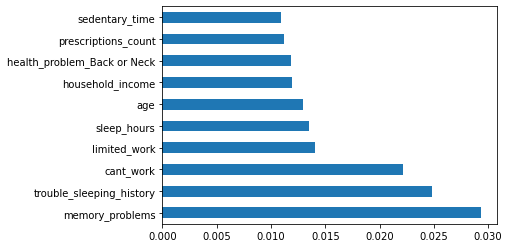

In [128]:
ranked_features.nlargest(10).plot(kind = 'barh')

In [129]:
df_dataset = data.drop(labels= ['household_size', 'asthma', 'asthma_onset', 'asthma_currently', 'asthma_emergency', 'anemia', 'ever_overweight', 'blood_transfusion', 'arthritis', 'heart_failure', 'heart_disease', 'angina', 'heart_attack', 'stroke', 'emphysema', 'bronchitis', 'liver_condition', 'thyroid_problem', 'bronchitis_currently', 'liver_condition_currently', 'cancer', 'fourth_cancer_count', 'heart_attack_relative', 'asthma_relative', 'diabetes_relative', 'hay_fever', 'cancer_onset', 'second_cancer_count', 'third_cancer_count', 'weight', 'height', 'pulse', 'irregular_pulse', 'systolic', 'total_cholesterol', 'HDL', 'triglyceride', 'LDL', 'albumin', 'ALT', 'AST', 'ALP', 'BUN', 'creatinine', 'GGT', 'glucose', 'iron', 'LHD', 'bilirubin', 'uric_acid', 'white_BCC', 'lymphocyte_percent', 'monocyte_percent', 'neutrophils_percent', 'eosinophils_percent', 'basophils_percent', 'lymphocyte_count', 'monocyte_count', 'neutrophils_count', 'basophils_count', 'RBC_count', 'platelet_count', 'time_in_current_job', 'vigorous_work', 'moderate_work', 'drinks_per_occasion', 'drinks_past_year', 'walking_equipment', 'limitations', 'healthcare_equipment', 'health_problem_Other Impairment', 'health_problem_Bone or Joint', 'health_problem_Weight', 'health_problem_Arthritis', 'health_problem_Cancer', 'health_problem_Other Injury', 'health_problem_Breathing', 'health_problem_Stroke', 'health_problem_Blood Pressure', 'health_problem_Mental Retardation', 'health_problem_Hearing', 'health_problem_Heart', 'health_problem_Vision', 'health_problem_Diabetes', 'health_problem_Birth Defect', 'health_problem_Senility', 'health_problem_Other Developmental', 'marijuana_use', 'marijuana_per_month', 'cocaine_use', 'cocaine_per_month', 'heroine_use', 'meth_use', 'inject_drugs', 'rehab_program', 'start_smoking_age', 'current_smoker', 'previous_cigarettes_per_day', 'current_cigarettes_per_day', 'days_quit_smoking', 'household_smokers', 'race_Black', 'race_Mexican', 'race_Other Hispanic', 'race_Other and Multiracial', 'race_White', 'citizenship_Citizen', 'citizenship_Not Citizen', 'birth_place_Elsewhere', 'birth_place_Mexico', 'birth_place_Other Non Spanish Country', 'birth_place_Other Spanish Country', 'birth_place_USA', 'veteran_No', 'veteran_Yes', 'first_cancer_type_Bladder', 'first_cancer_type_Blood', 'first_cancer_type_Bone', 'first_cancer_type_Brain', 'first_cancer_type_Breast', 'first_cancer_type_Cervical', 'first_cancer_type_Colon', 'first_cancer_type_Esophageal', 'first_cancer_type_Gallbladder', 'first_cancer_type_Kidney', 'first_cancer_type_Larynx', 'first_cancer_type_Leukemia', 'first_cancer_type_Liver', 'first_cancer_type_Lung', 'first_cancer_type_Lymphoma', 'first_cancer_type_Melanoma', 'first_cancer_type_Mouth', 'first_cancer_type_Nervous System', 'first_cancer_type_None', 'first_cancer_type_Other', 'first_cancer_type_Ovarian', 'first_cancer_type_Pancreatic', 'first_cancer_type_Prostate', 'first_cancer_type_Rectal', 'first_cancer_type_Skin Non Melanoma', 'first_cancer_type_Skin Other', 'first_cancer_type_Soft Tissue', 'first_cancer_type_Stomach', 'first_cancer_type_Testicular', 'first_cancer_type_Thyroid', 'first_cancer_type_Uterine', 'second_cancer_type_Bladder', 'second_cancer_type_Blood', 'second_cancer_type_Bone', 'second_cancer_type_Brain', 'second_cancer_type_Breast', 'second_cancer_type_Cervical', 'second_cancer_type_Colon', 'second_cancer_type_Esophageal', 'second_cancer_type_Kidney', 'second_cancer_type_Larynx', 'second_cancer_type_Leukemia', 'second_cancer_type_Liver', 'second_cancer_type_Lung', 'second_cancer_type_Lymphoma', 'second_cancer_type_Melanoma', 'second_cancer_type_Mouth', 'second_cancer_type_None', 'second_cancer_type_Other', 'second_cancer_type_Ovarian', 'second_cancer_type_Pancreatic', 'second_cancer_type_Prostate', 'second_cancer_type_Rectal', 'second_cancer_type_Skin Non Melanoma', 'second_cancer_type_Skin Other', 'second_cancer_type_Stomach', 'second_cancer_type_Thyroid', 'second_cancer_type_Uterine', 'third_cancer_type_Blood', 'third_cancer_type_Bone', 'third_cancer_type_Brain', 'third_cancer_type_Breast', 'third_cancer_type_Cervical', 'third_cancer_type_Colon', 'third_cancer_type_Leukemia', 'third_cancer_type_Liver', 'third_cancer_type_Lung', 'third_cancer_type_Melanoma', 'third_cancer_type_None', 'third_cancer_type_Other', 'third_cancer_type_Ovarian', 'third_cancer_type_Prostate', 'third_cancer_type_Skin Non Melanoma', 'third_cancer_type_Skin Other', 'third_cancer_type_Thyroid', 'third_cancer_type_Uterine', 'arthritis_type_None', 'arthritis_type_Osteoarthritis', 'arthritis_type_Other', 'arthritis_type_Psoriatic', 'arthritis_type_Rheumatoid', 'full_time_work_Missing', 'full_time_work_No', 'full_time_work_Yes', 'work_type_Family Business', 'work_type_Government', 'work_type_None', 'work_type_Private Wage Worker', 'work_type_Self Employed', 'out_of_work_Disabled', 'out_of_work_Health', 'out_of_work_Home Caretaker', 'out_of_work_Layoff', 'out_of_work_None', 'out_of_work_Other', 'out_of_work_Retired', 'out_of_work_School', 'vigorous_recreation_No', 'vigorous_recreation_Yes', 'moderate_recreation_No', 'moderate_recreation_Yes', 'lifetime_alcohol_consumption_No', 'lifetime_alcohol_consumption_Yes', 'health_problem_Back or Neck', 'marital_status_Never Married','pregnant_Yes','marital_status_Divorced','marital_status_Married','marital_status_Missing','marital_status_Partner','marital_status_Separated','marital_status_Widowed','pregnant_No'], axis=1)

In [130]:
data

depression  ...  lifetime_alcohol_consumption_Yes
0               0  ...                                 1
1               0  ...                                 1
2               0  ...                                 1
3               0  ...                                 1
4               0  ...                                 1
...           ...  ...                               ...
36254           0  ...                                 0
36255           0  ...                                 1
36256           0  ...                                 1
36257           0  ...                                 0
36258           0  ...                                 1

[36259 rows x 240 columns]

In [131]:
df_dataset

depression  gender  ...  memory_problems  prescriptions_count
0               0       1  ...                0                    2
1               0       0  ...                0                    4
2               0       0  ...                0                    5
3               0       1  ...                0                    0
4               0       0  ...                0                    1
...           ...     ...  ...              ...                  ...
36254           0       0  ...                0                    0
36255           0       1  ...                0                    1
36256           0       0  ...                0                    2
36257           0       1  ...                0                    0
36258           0       0  ...                0                    5

[36259 rows x 12 columns]

# Train Test Split

In [132]:
# define x and y
x = df_dataset.drop(['depression'], axis=1)
y = pd.DataFrame(df_dataset, columns=['depression'])

# spliting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=1, stratify=y)

# output train_test shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25381, 11)
(10878, 11)
(25381, 1)
(10878, 1)


In [133]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Set up the model
LogisticRegression = LogisticRegression(max_iter = 4000)

# Use fit
LogisticRegression.fit(x_train, y_train.values.ravel())

# Predicting the test set result
y_pred = LogisticRegression.predict(x_test)

# Use score method to get accuracy of model
score = LogisticRegression.score(x_test, y_test)

# confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

# score
print('\nScore:', score)

# classification Report
print ('\nClassification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix: 
 [[9831   97]
 [ 793  157]]

Score: 0.9181834896120611

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      9928
           1       0.62      0.17      0.26       950

    accuracy                           0.92     10878
   macro avg       0.77      0.58      0.61     10878
weighted avg       0.90      0.92      0.90     10878



## Making Predictive System

In [134]:
# columns, data of any row

In [135]:
print(df_dataset.columns.values.tolist())

['depression', 'gender', 'age', 'education_level', 'household_income', 'trouble_sleeping_history', 'sleep_hours', 'sedentary_time', 'cant_work', 'limited_work', 'memory_problems', 'prescriptions_count']


In [136]:
df_dataset

depression  gender  ...  memory_problems  prescriptions_count
0               0       1  ...                0                    2
1               0       0  ...                0                    4
2               0       0  ...                0                    5
3               0       1  ...                0                    0
4               0       0  ...                0                    1
...           ...     ...  ...              ...                  ...
36254           0       0  ...                0                    0
36255           0       1  ...                0                    1
36256           0       0  ...                0                    2
36257           0       1  ...                0                    0
36258           0       0  ...                0                    5

[36259 rows x 12 columns]

In [137]:
input_data = (1,44,4,11,0,9.0,150,0,0,0,2)

In [138]:
# Changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = LogisticRegression.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('Not Deprresed')
    
else:
    print('Depressed')

[0]
Not Deprresed


# Application Deployment

Saving the trained model

In [139]:
import pickle

In [140]:
filename = 'lr_trained_model.sav'
pickle.dump(LogisticRegression, open(filename, 'wb'))

In [141]:
# loading the saved model
loaded_model = pickle.load(open('lr_trained_model.sav', 'rb'))

In [1]:
input_data = (1,44,4,11,0,9.0,150,0,0,0,2)

# Changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('Not Deprresed')
    
else:
    print('Depressed')

NameError: name 'np' is not defined